# Business Case:
"The Skin Disorder Prediction Project uses machine learning to diagnose skin conditions based on patient health indicators, enabling early detection, improved treatment, and efficient healthcare delivery."

## Domain Analysis
Skin disorders are common medical conditions that affect the skin's structure, appearance, and function. These conditions can range from mild issues, like eczema and acne, to severe chronic conditions, such as psoriasis and dermatitis. Early detection and accurate diagnosis are crucial for effective treatment and better patient outcomes.

Key Aspects of the Domain:

Medical Context:
This project focuses on predicting skin disorder types based on patient health indicators. Common disorders include psoriasis, seborrheic dermatitis, lichen planus, and chronic dermatitis.

Features & Risk Factors:
Important features include age, family history, inflammation levels, itching, scaling, redness, lesion size, and disease duration.

Age and family history often correlate with genetic susceptibility.

Symptom severity (scaling, redness, and inflammation) reflects the condition's progression.

Clinical Importance:

Early diagnosis improves treatment outcomes and reduces healthcare costs.

Accurate predictions assist dermatologists in personalizing treatment plans.

Data Insights:

Univariate analysis reveals right-skewed distributions for symptoms and outliers in chronic cases.

Encoding and scaling ensure the data is ready for predictive modeling.

Business Impact:

Patient Benefit: Faster diagnosis enables early intervention, improving recovery rates.

Clinical Efficiency: Reduces diagnostic workload for dermatologists. Research Support: Helps identify patterns for future medical studies.

In [3]:
# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset_35_dermatology.csv')

In [5]:
df.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [7]:
df.tail()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
361                              0                     0   
362                              0                     0   
363                              3                     0   
364                              1                     0   
365                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
361                             0                                    2   
362                             0                                    2   
363                             0                                    2   
364                             0                                    2   
365                             0                                    3   

     band-like_infiltrate  Age  class  
361                     0   25      4  
362                     0   36      4  
363                     3   28      3  
364                     3   50      3  
365                     0   35      1  

[5 rows x 35 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [11]:
df.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  focal_hypergranulosis  \
count         366.000000  ...             366.000000   
mean            0.519126  ...               0.393443   
std             0.905639  ...               0.849406   
min             0.000000  ...               0.000000   
25%             0.000000  ...               0.000000   
50%             0.000000  ...               0.000000   
75%             1.000000  ...               0.000000   
max             3.000000  ...               3.000000   

       disappearance_of_the_granular_layer  \
count                           366.000000   
mean                              0.464481   
std                               0.864899   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.8661

## EDA

### - Univariate Analysis

In [15]:
#The Sweetviz library is used for automated EDA (Exploratory Data Analysis) in Python.It generates detailed visual reports to help you quickly
# understand dataset distributions.It is used for univariate analysis.

In [17]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
# Convert Age column to numeric (handling errors)
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')


Univariate Analysis



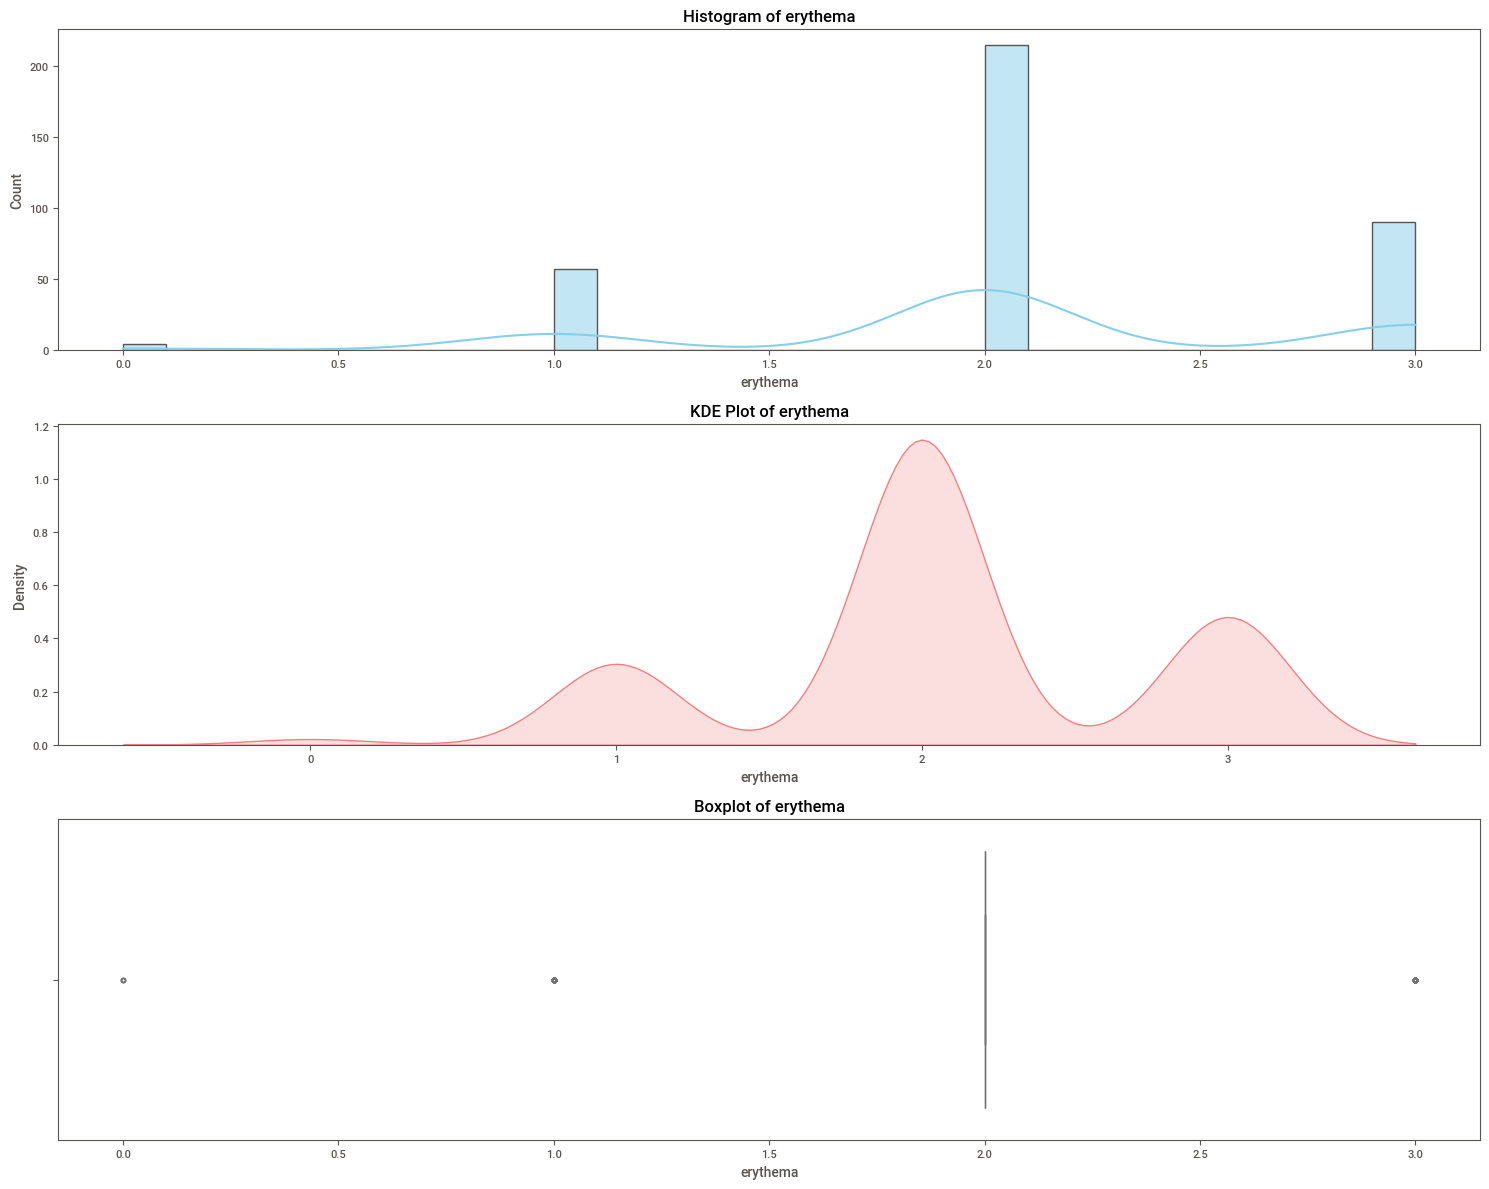

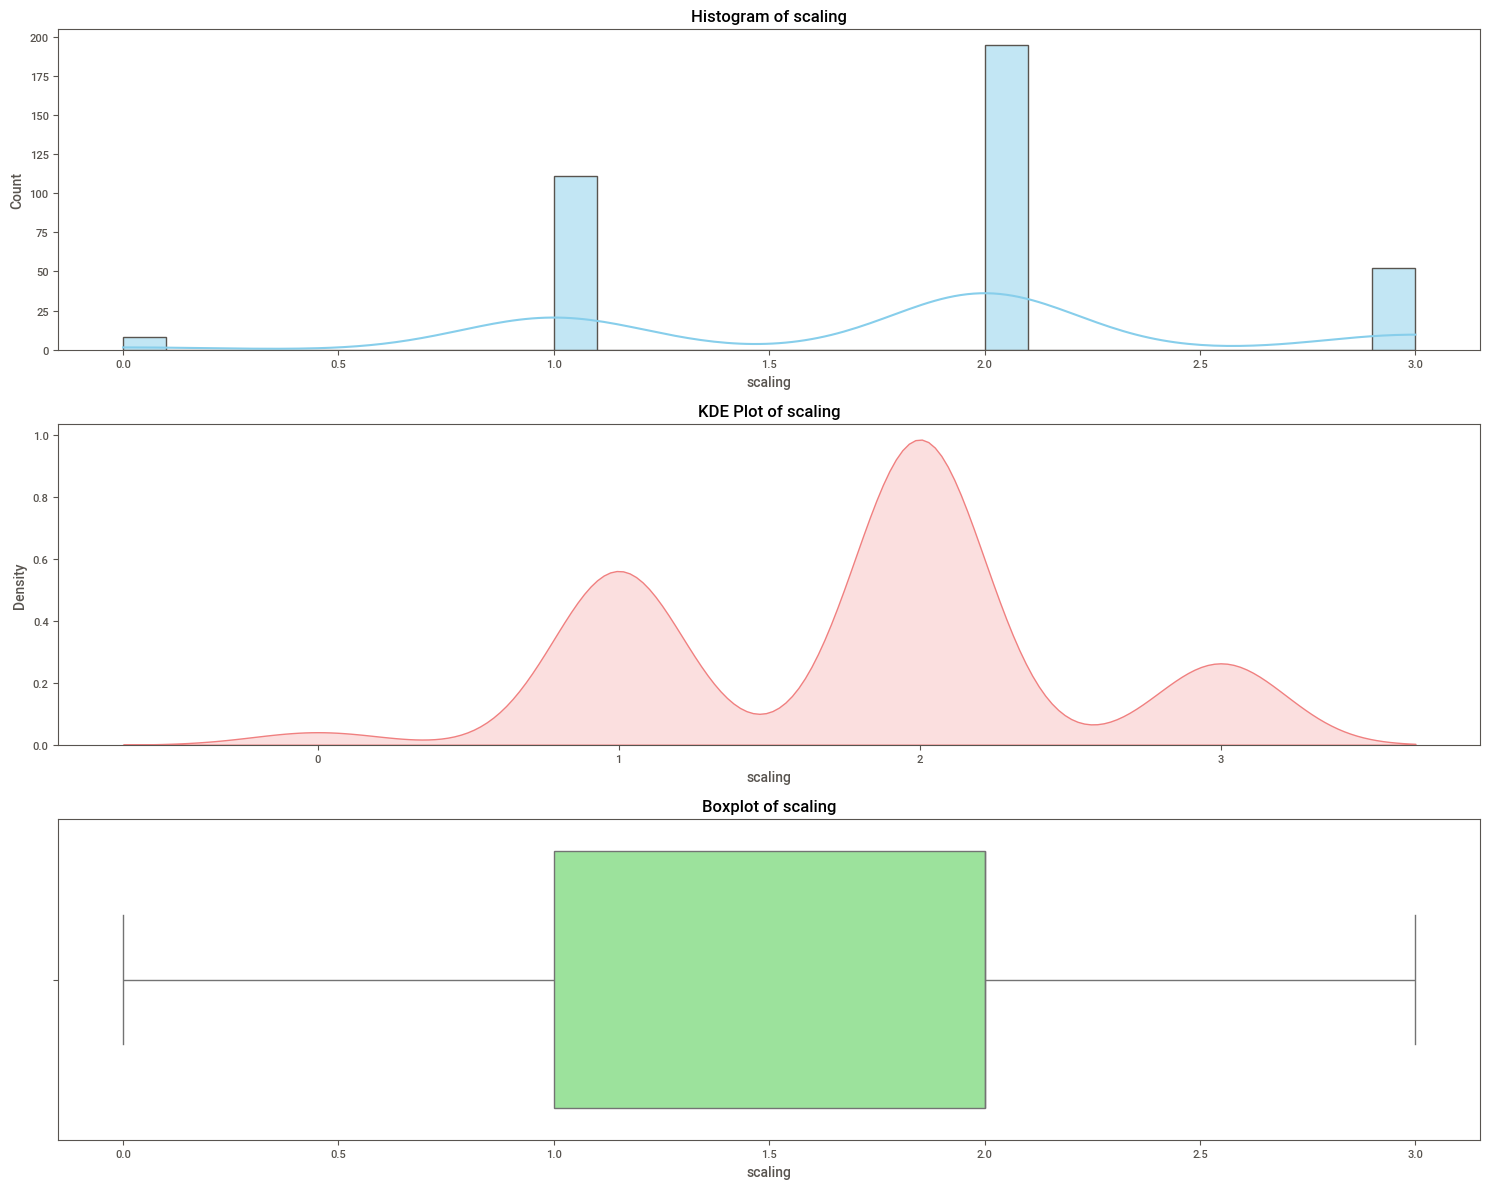

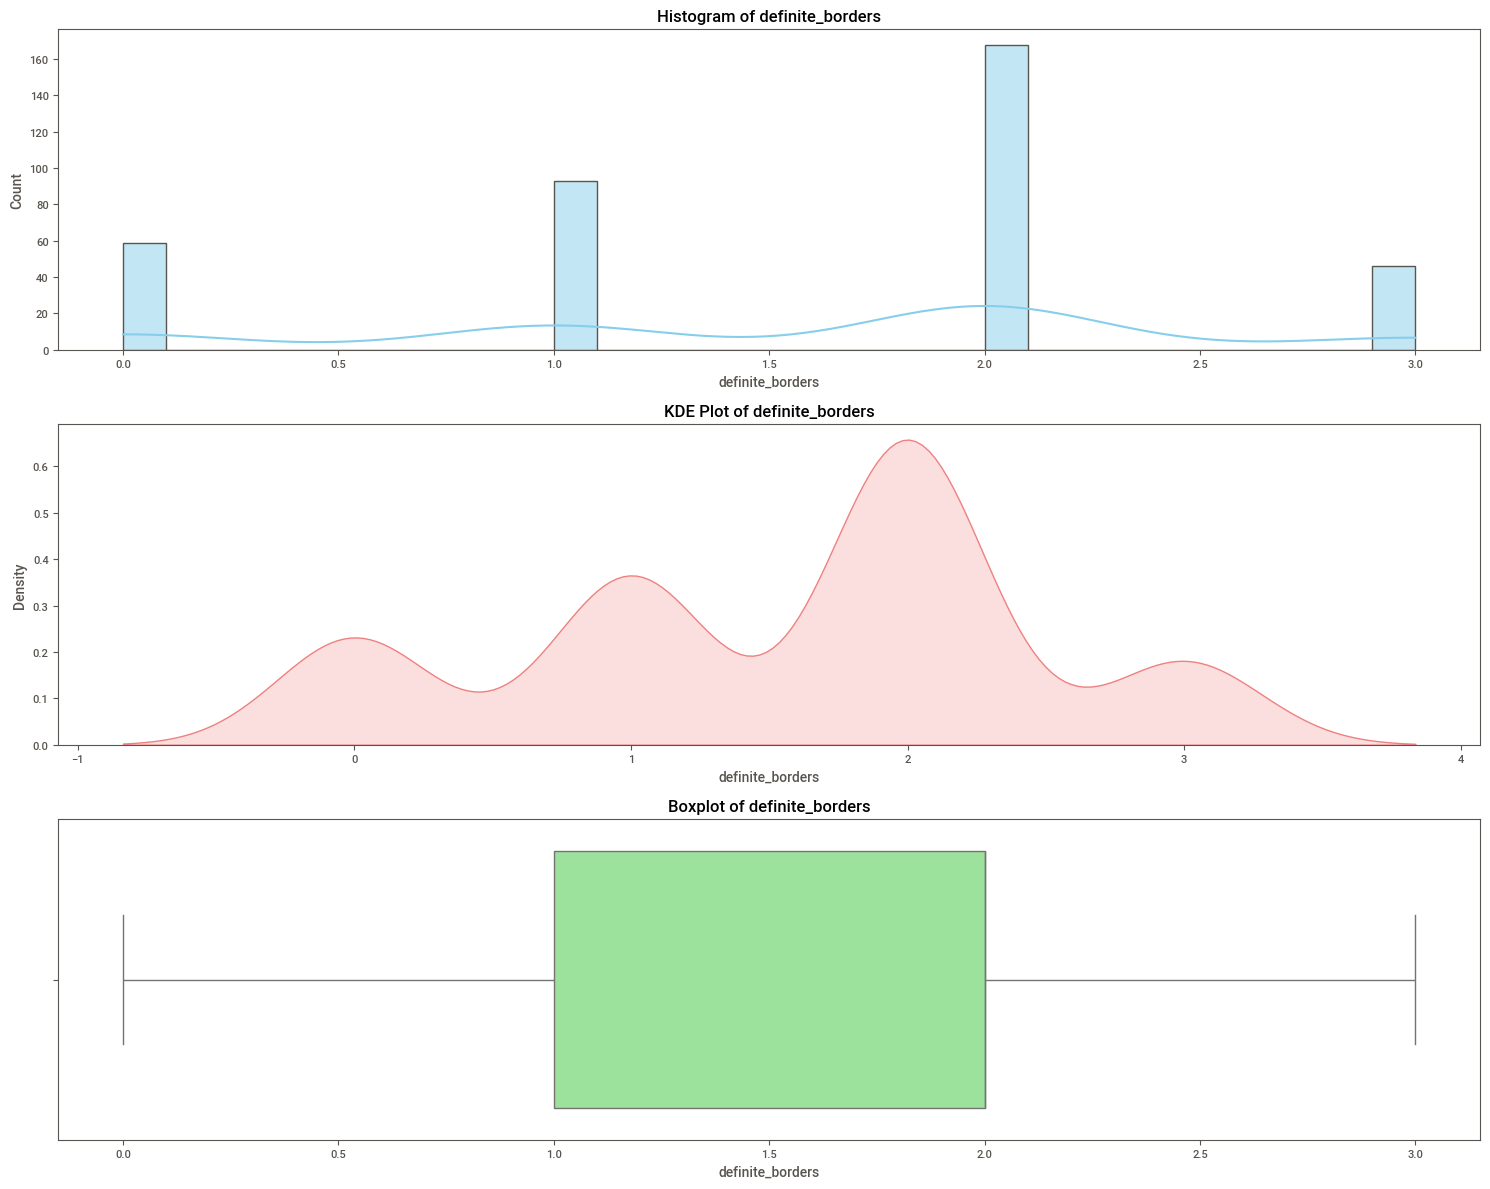

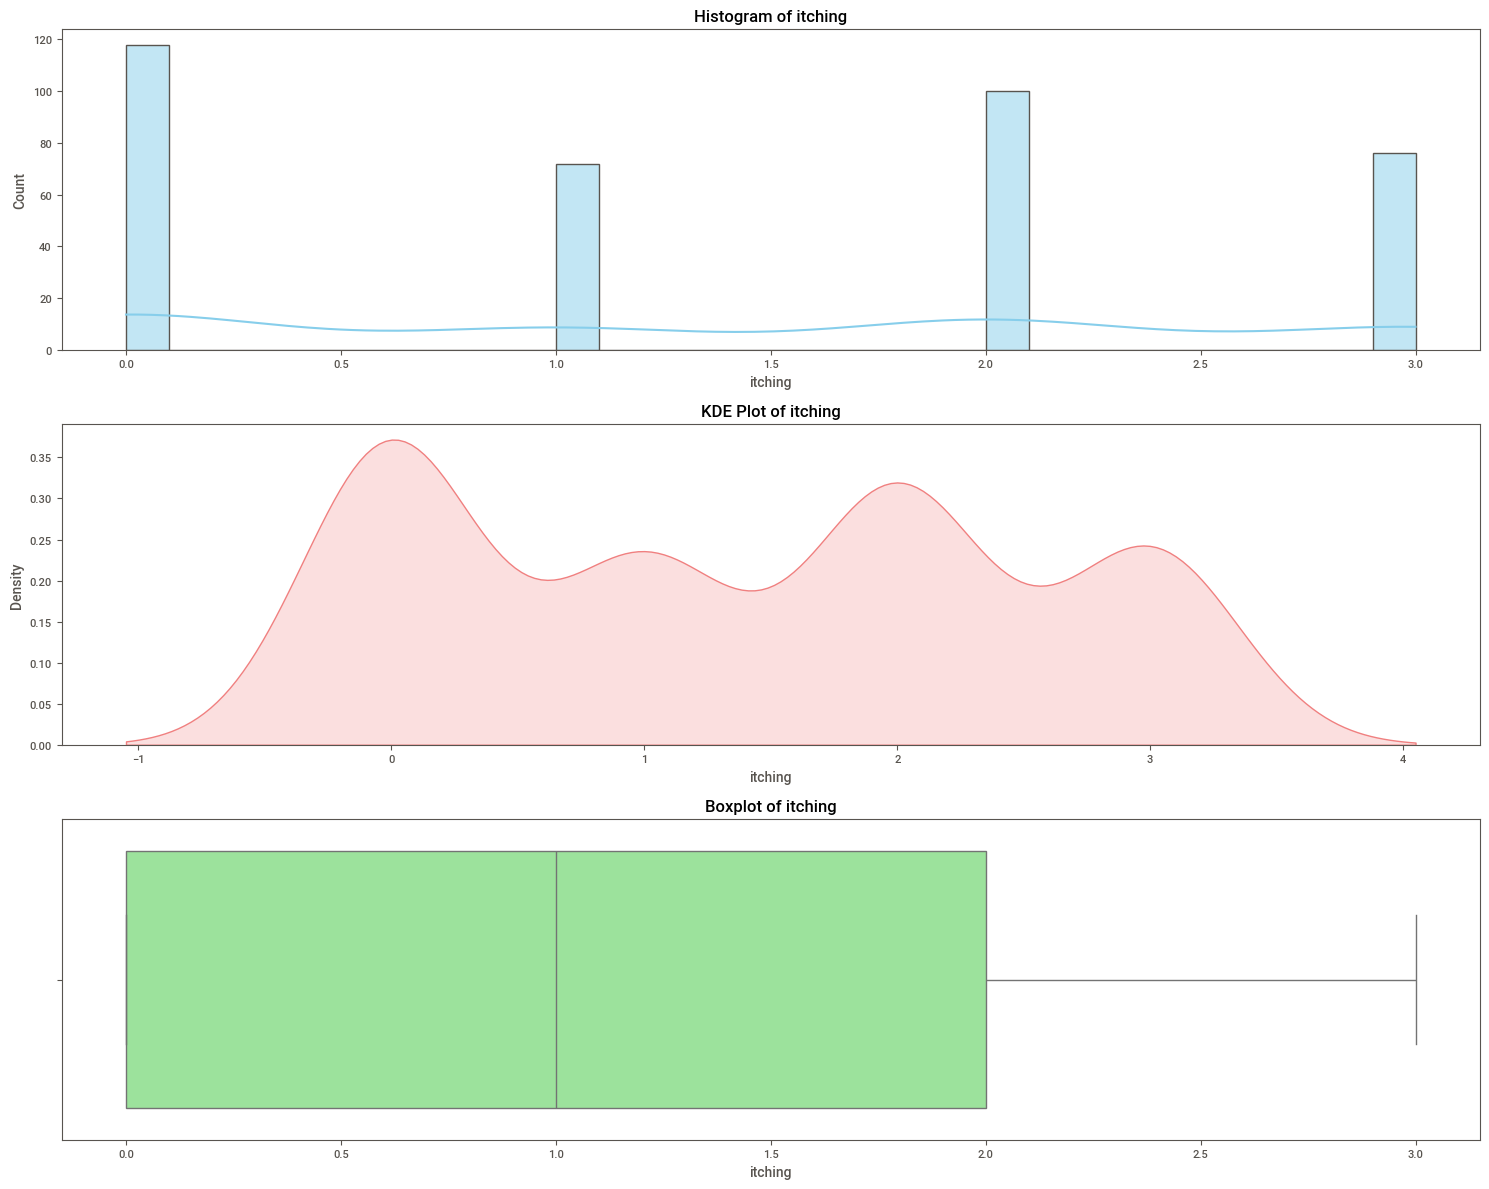

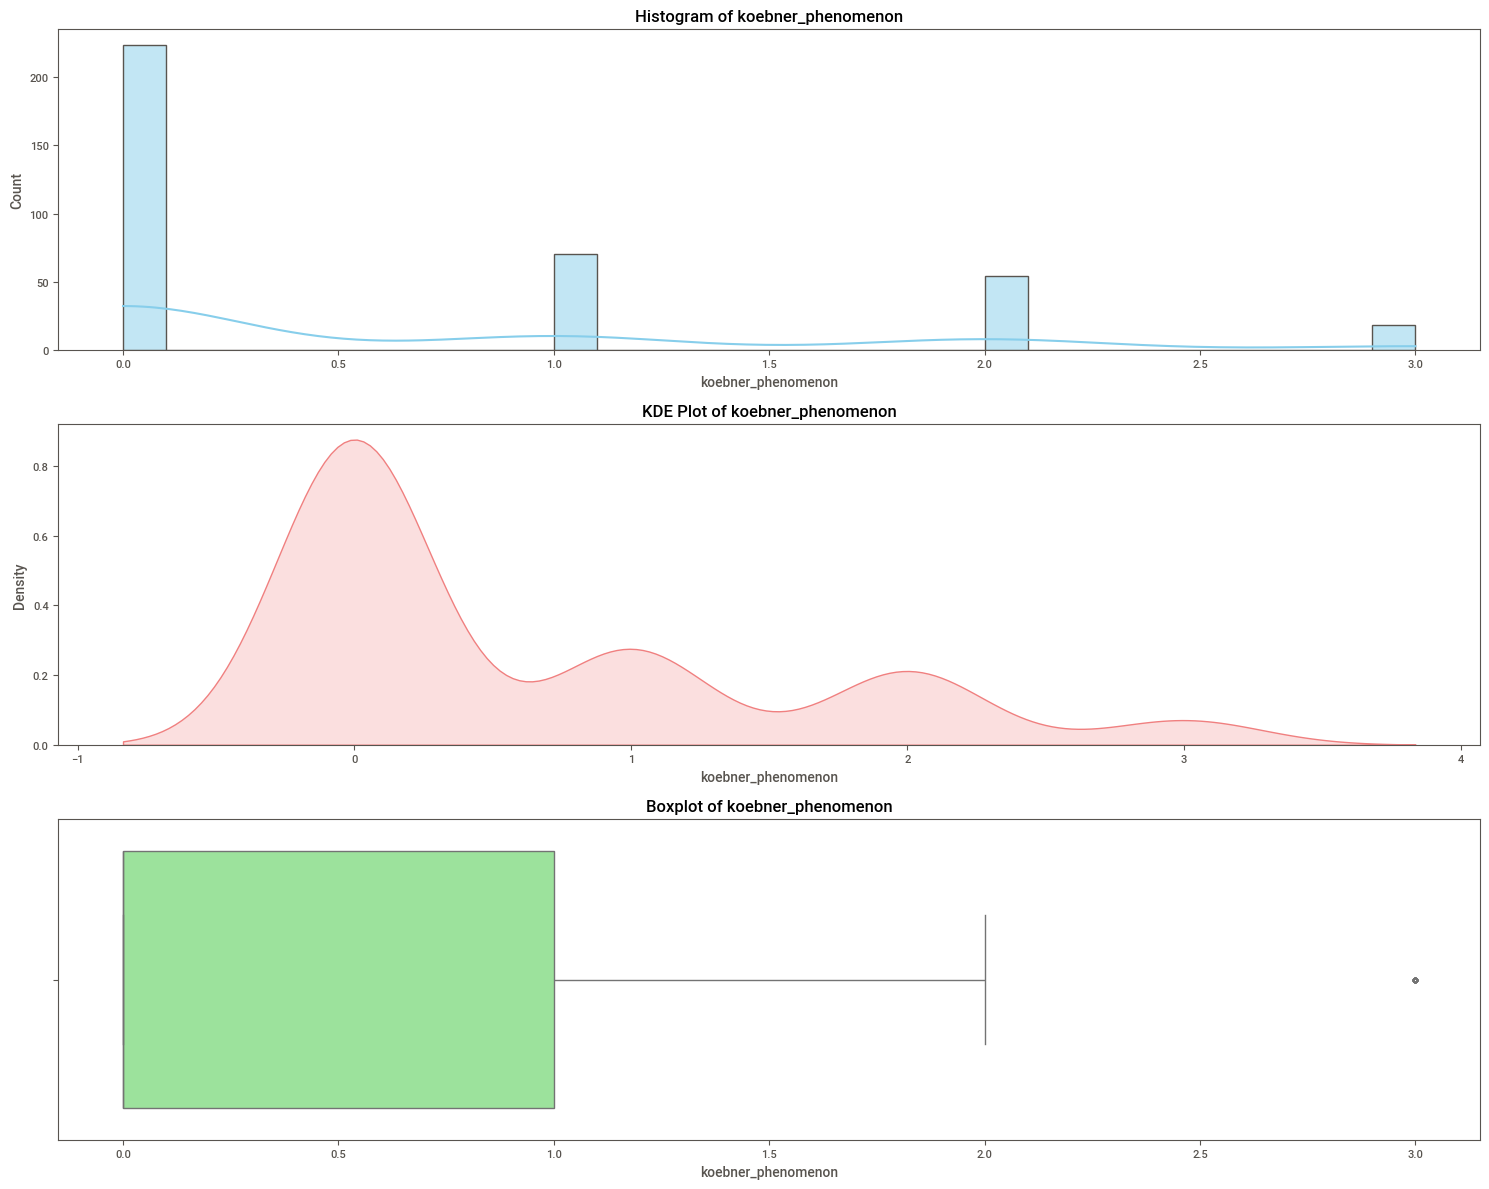

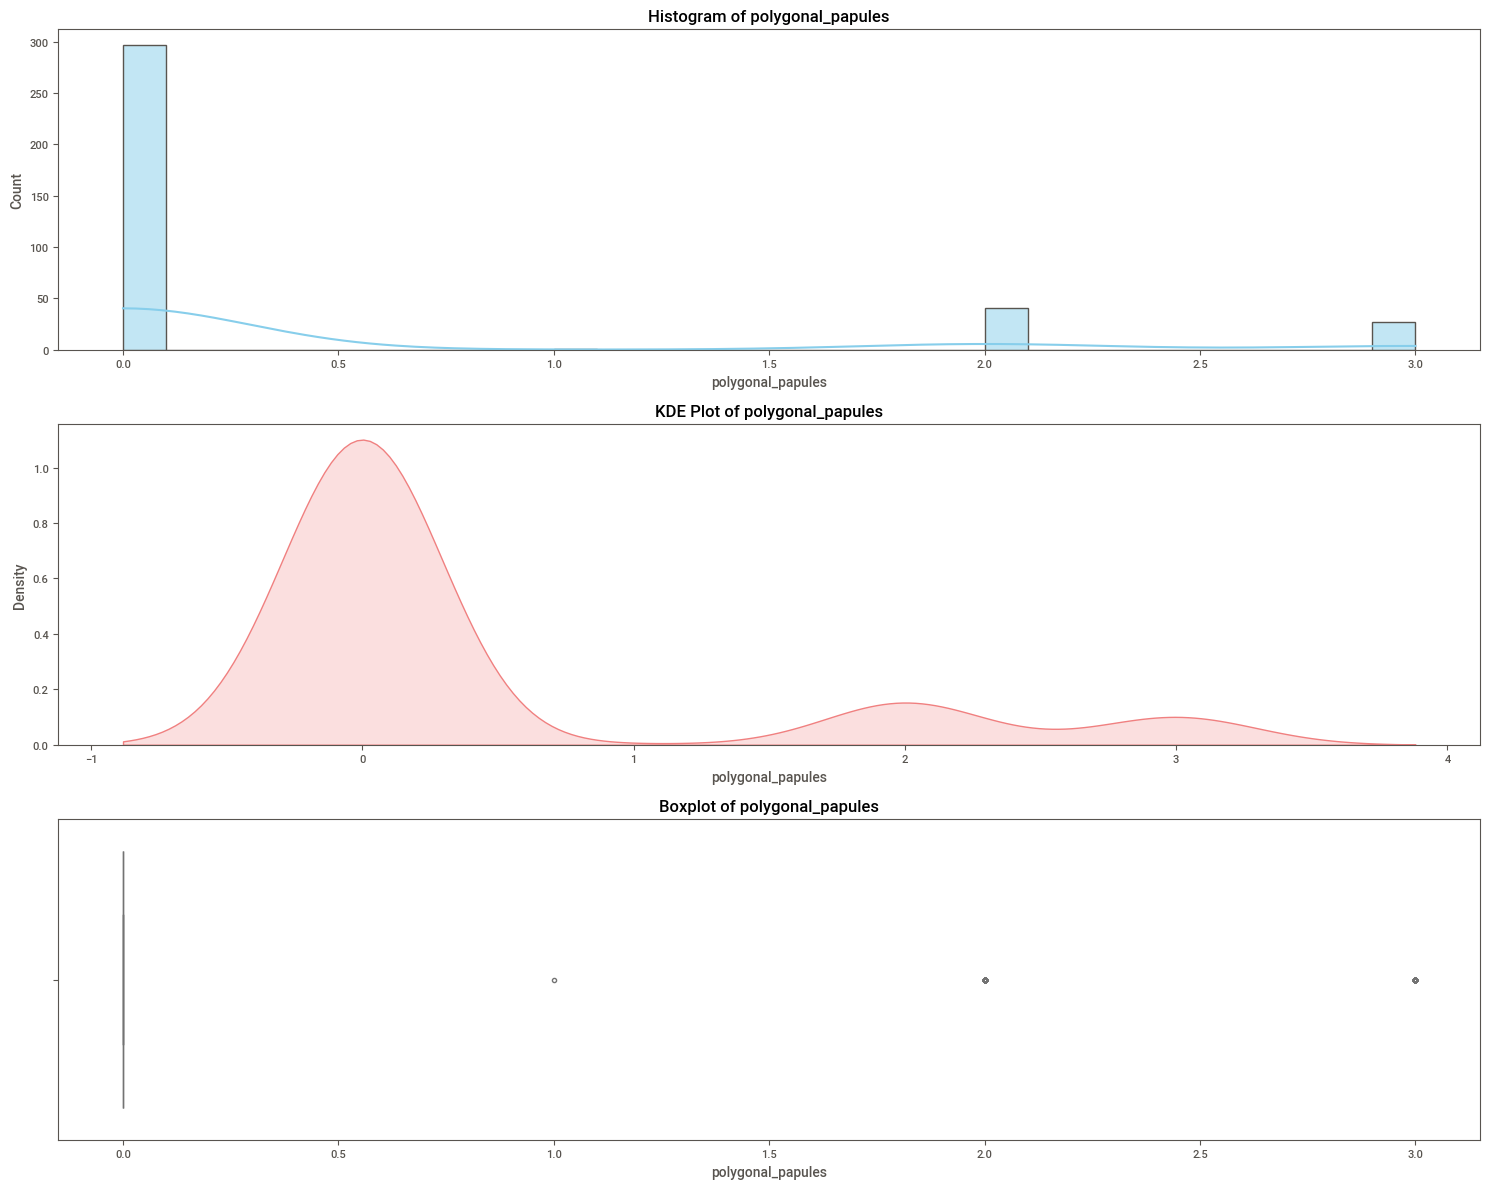

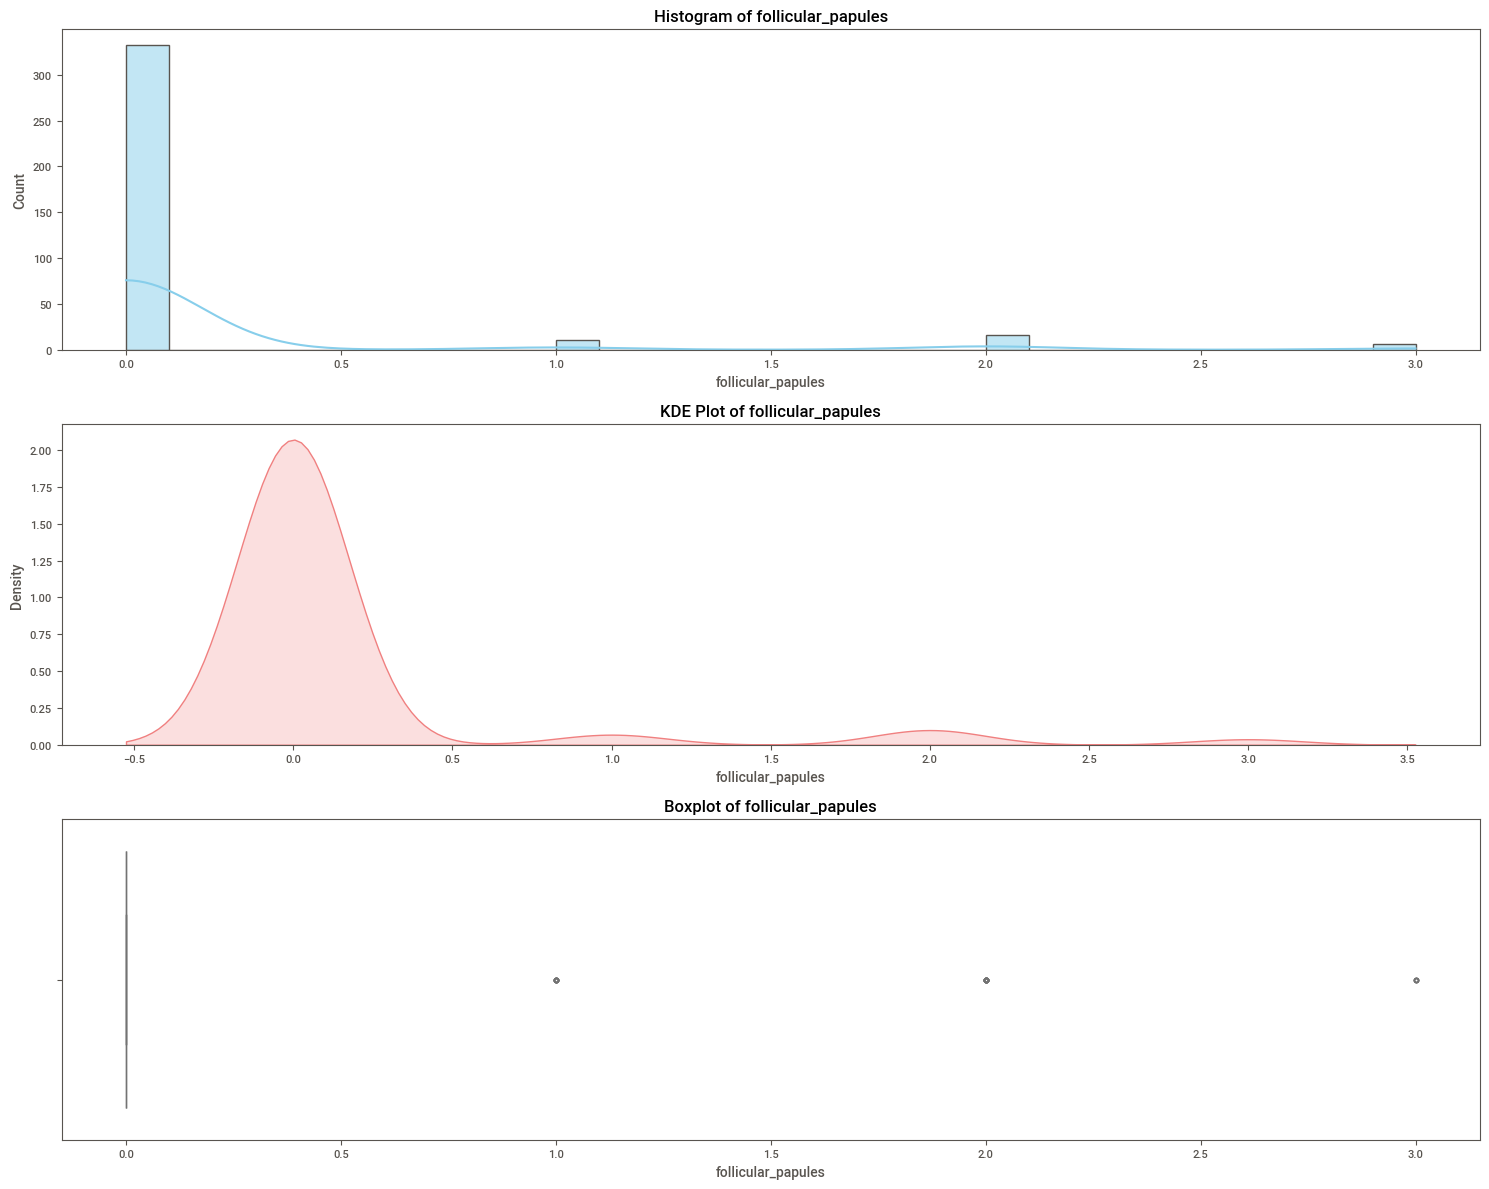

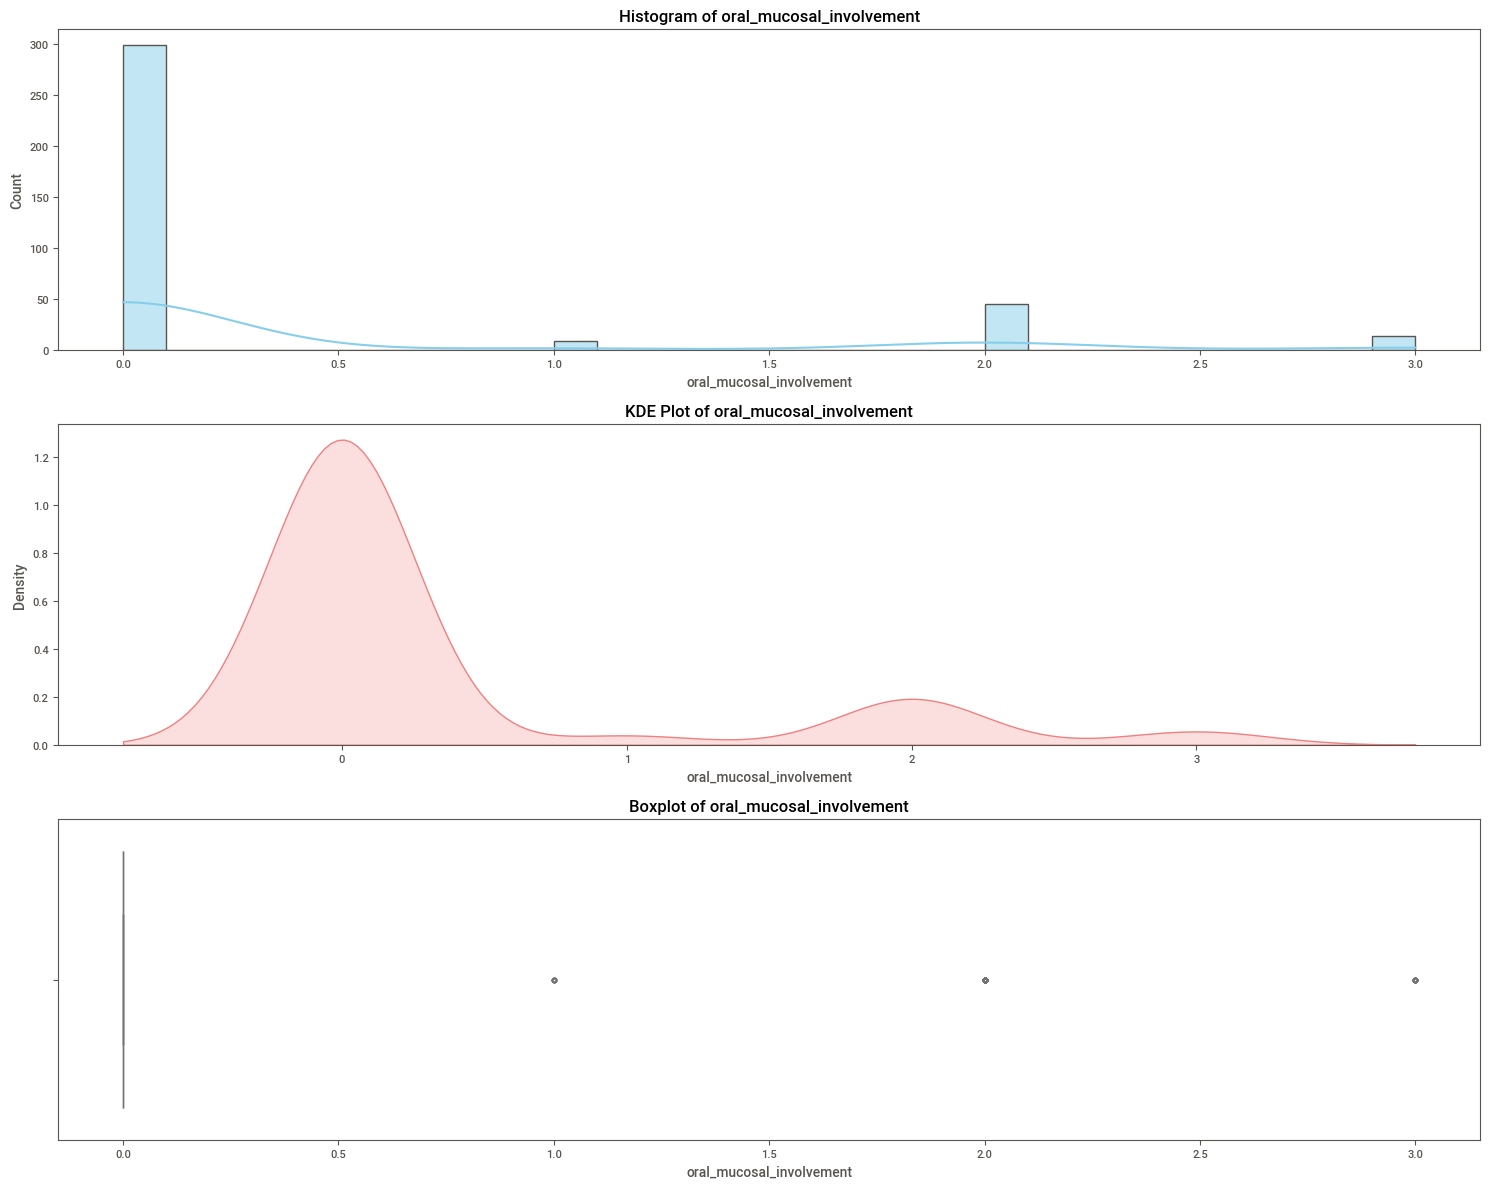

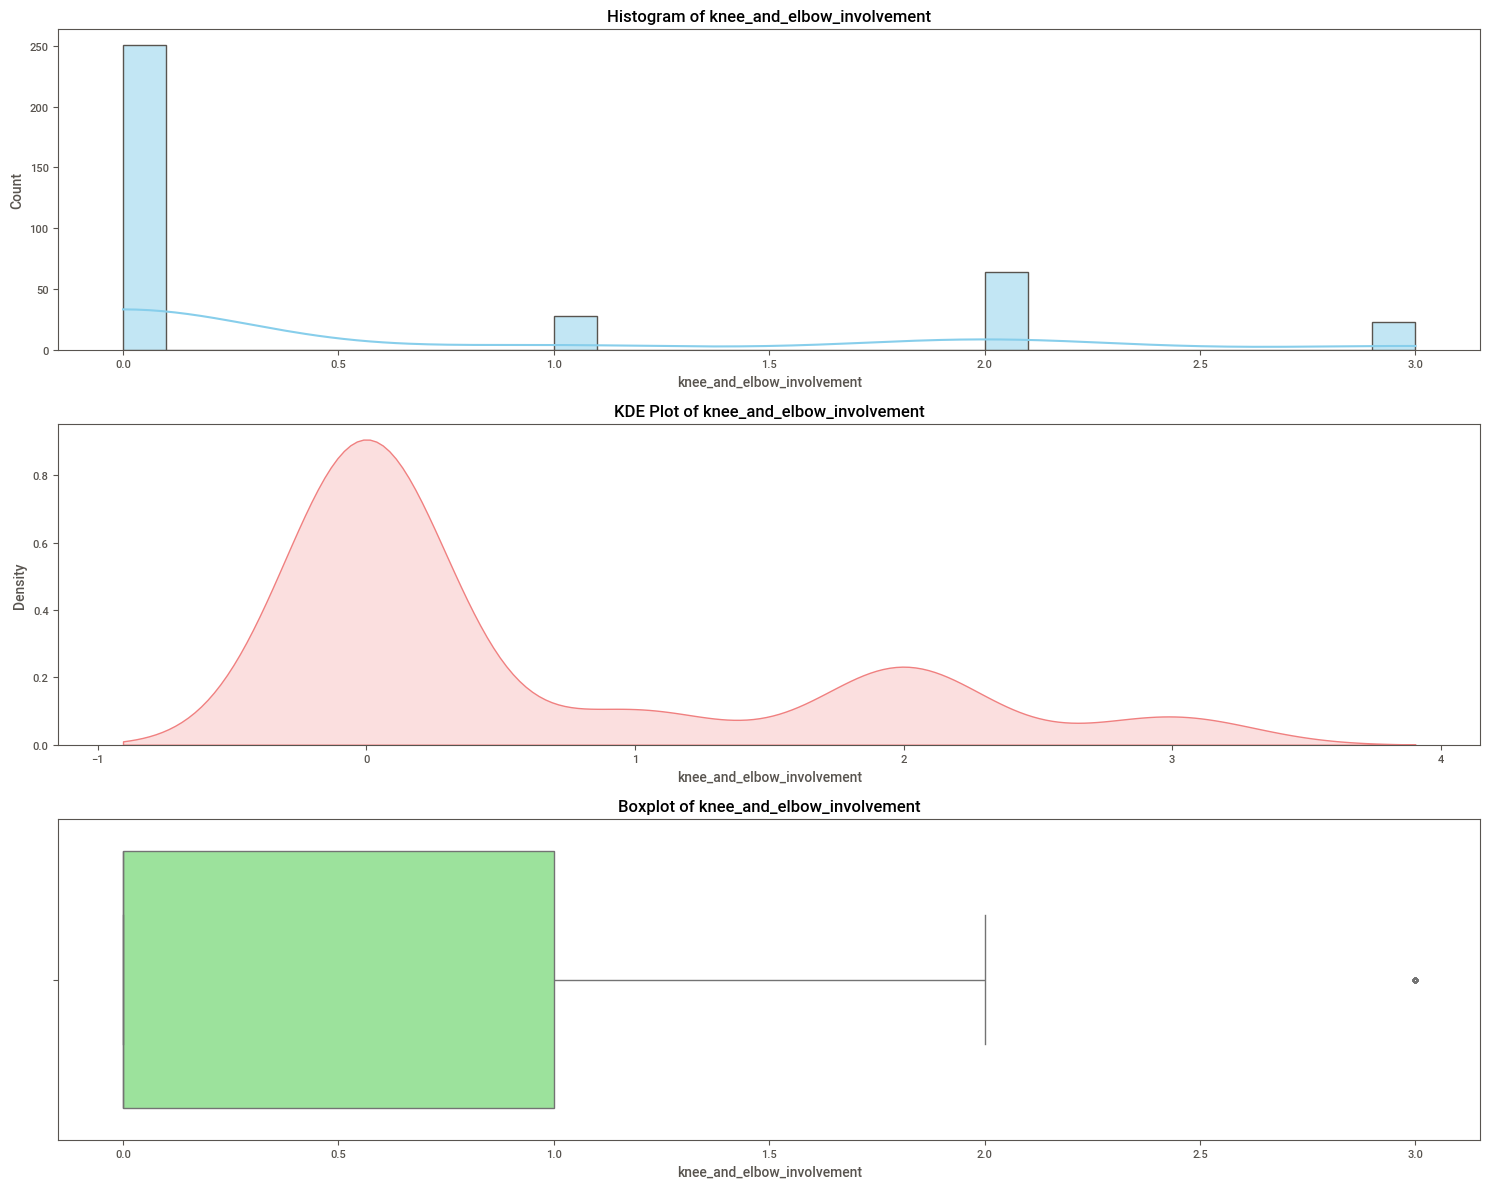

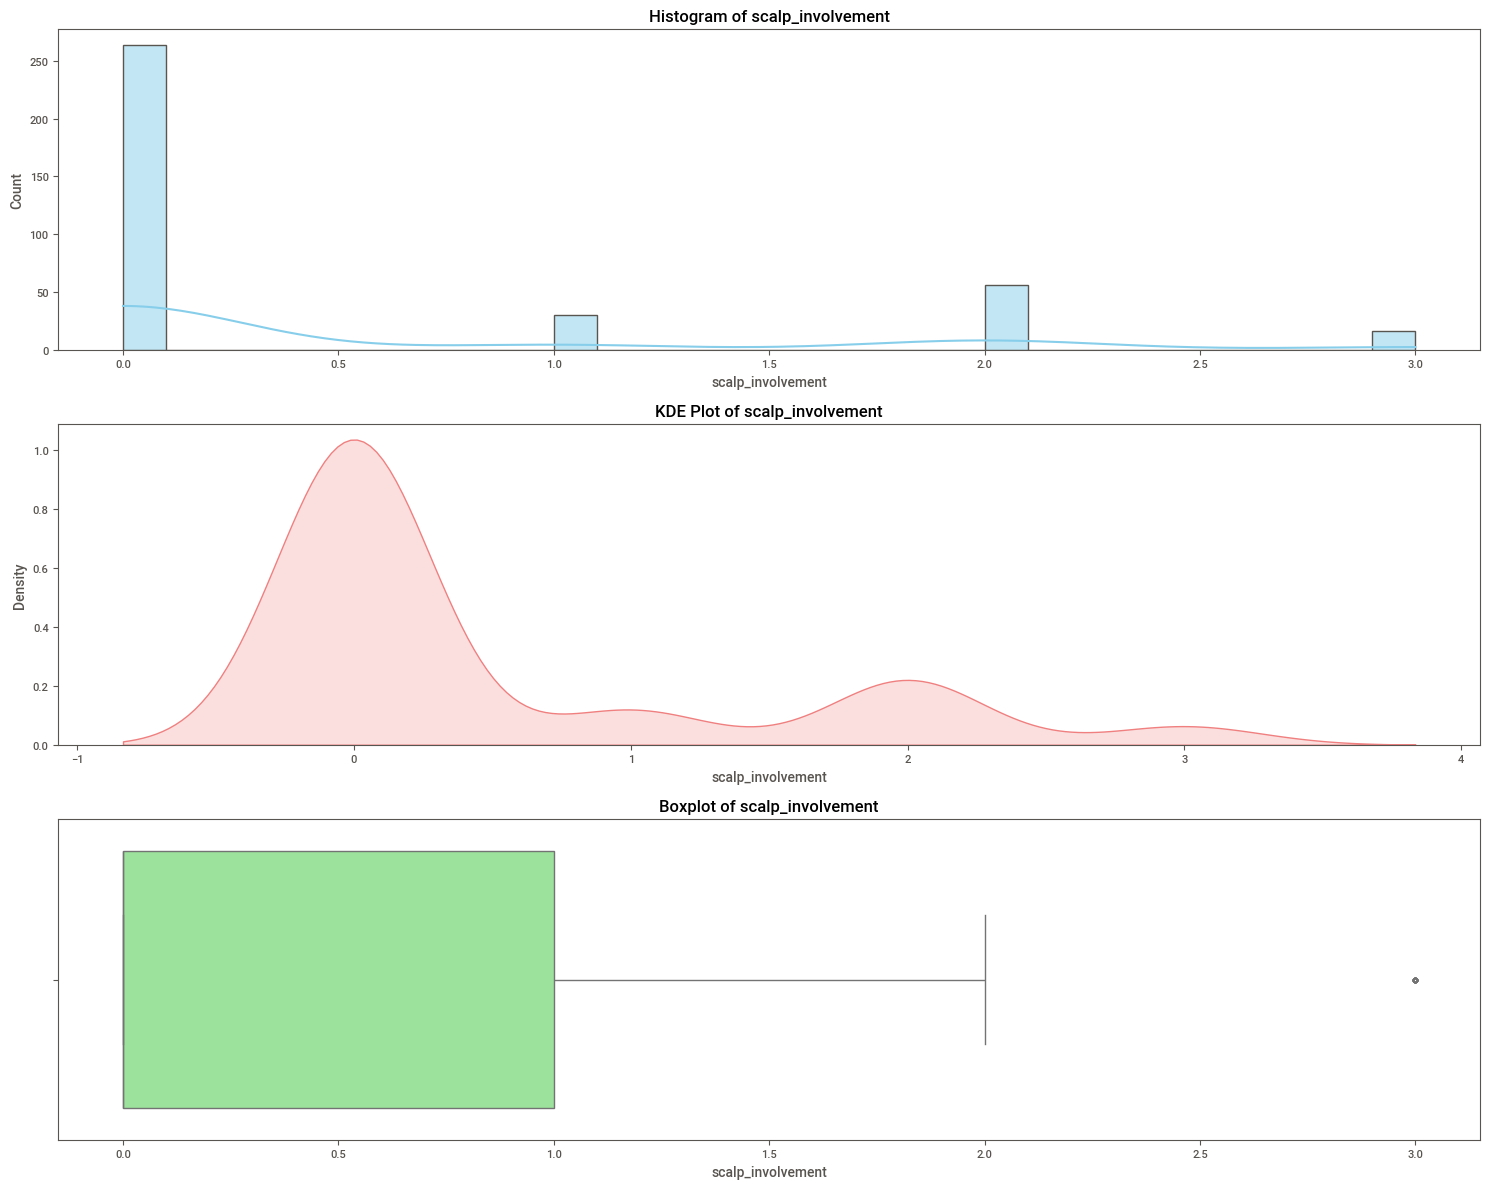

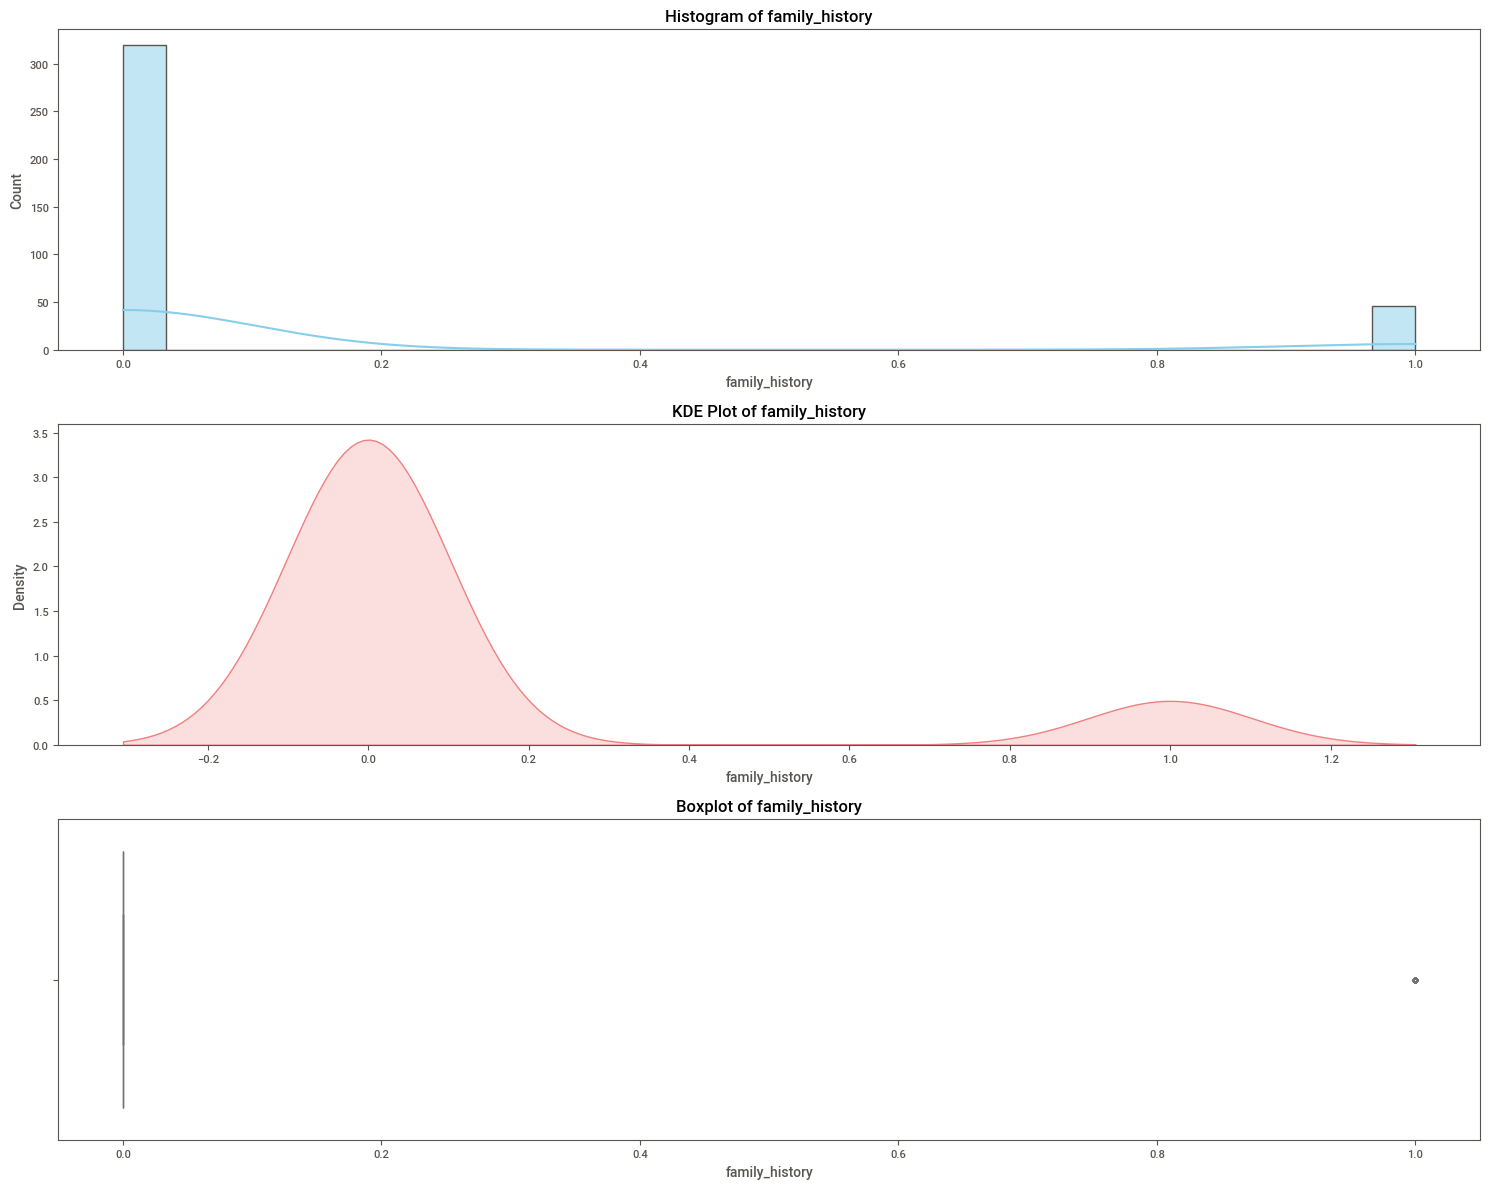

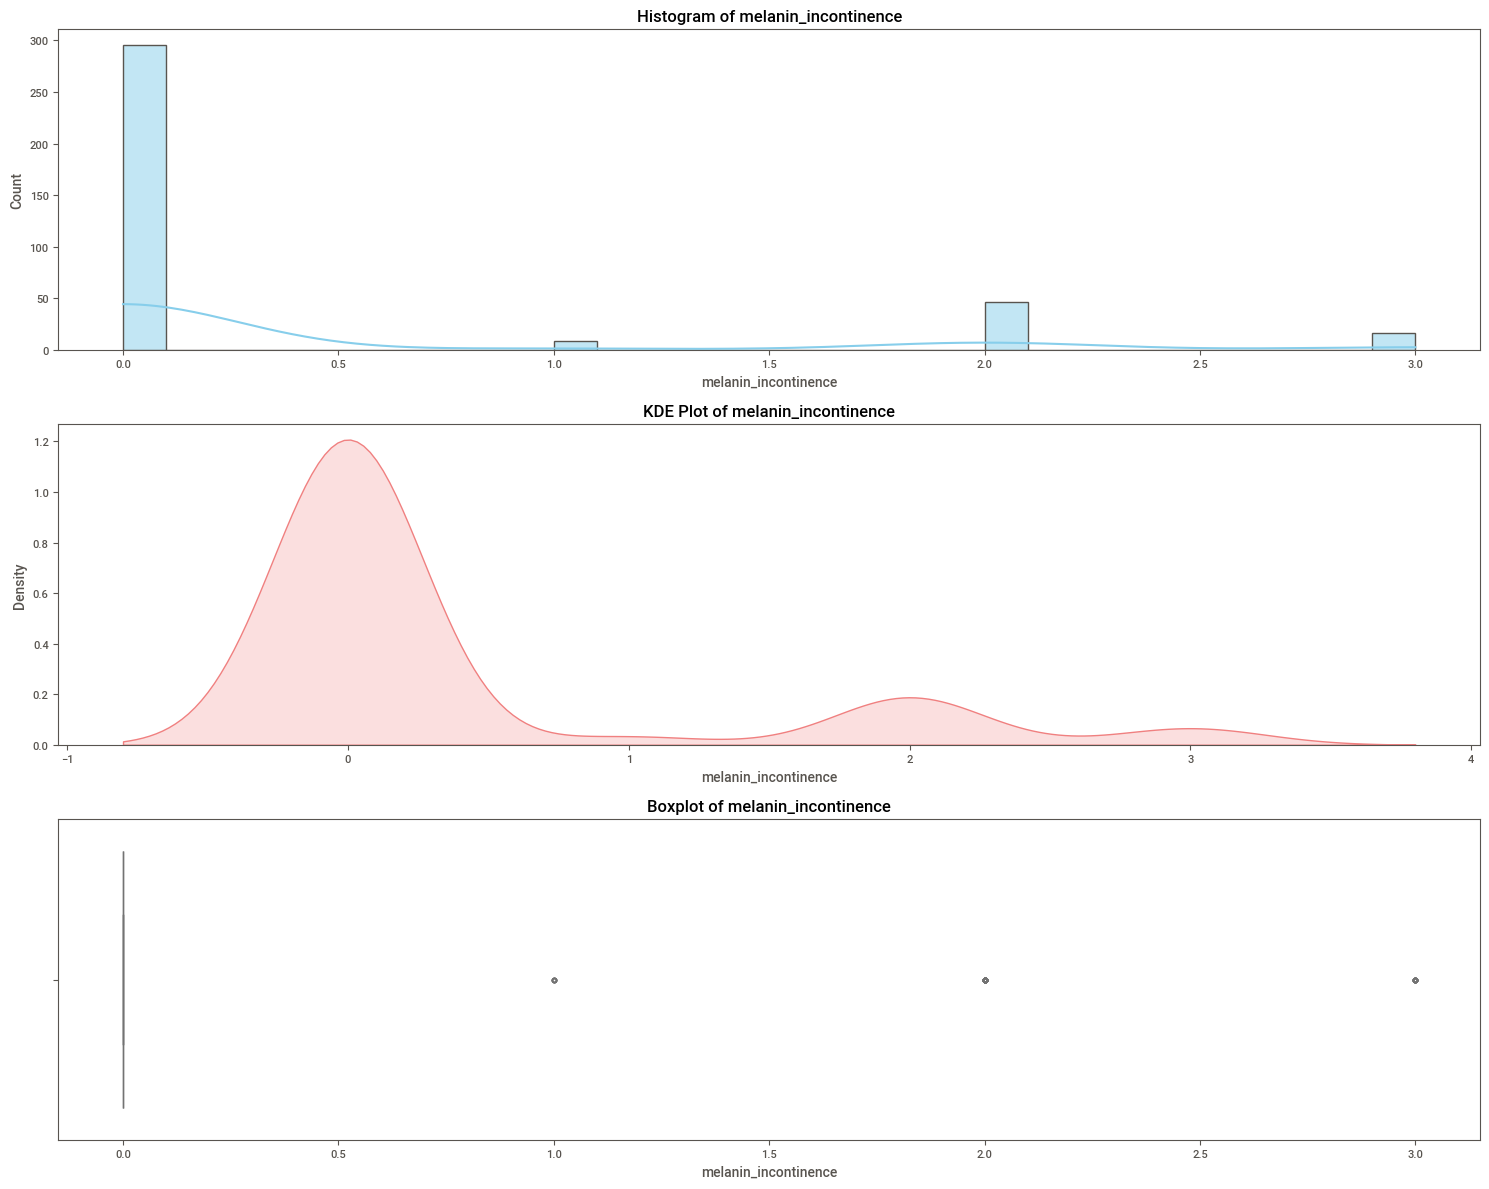

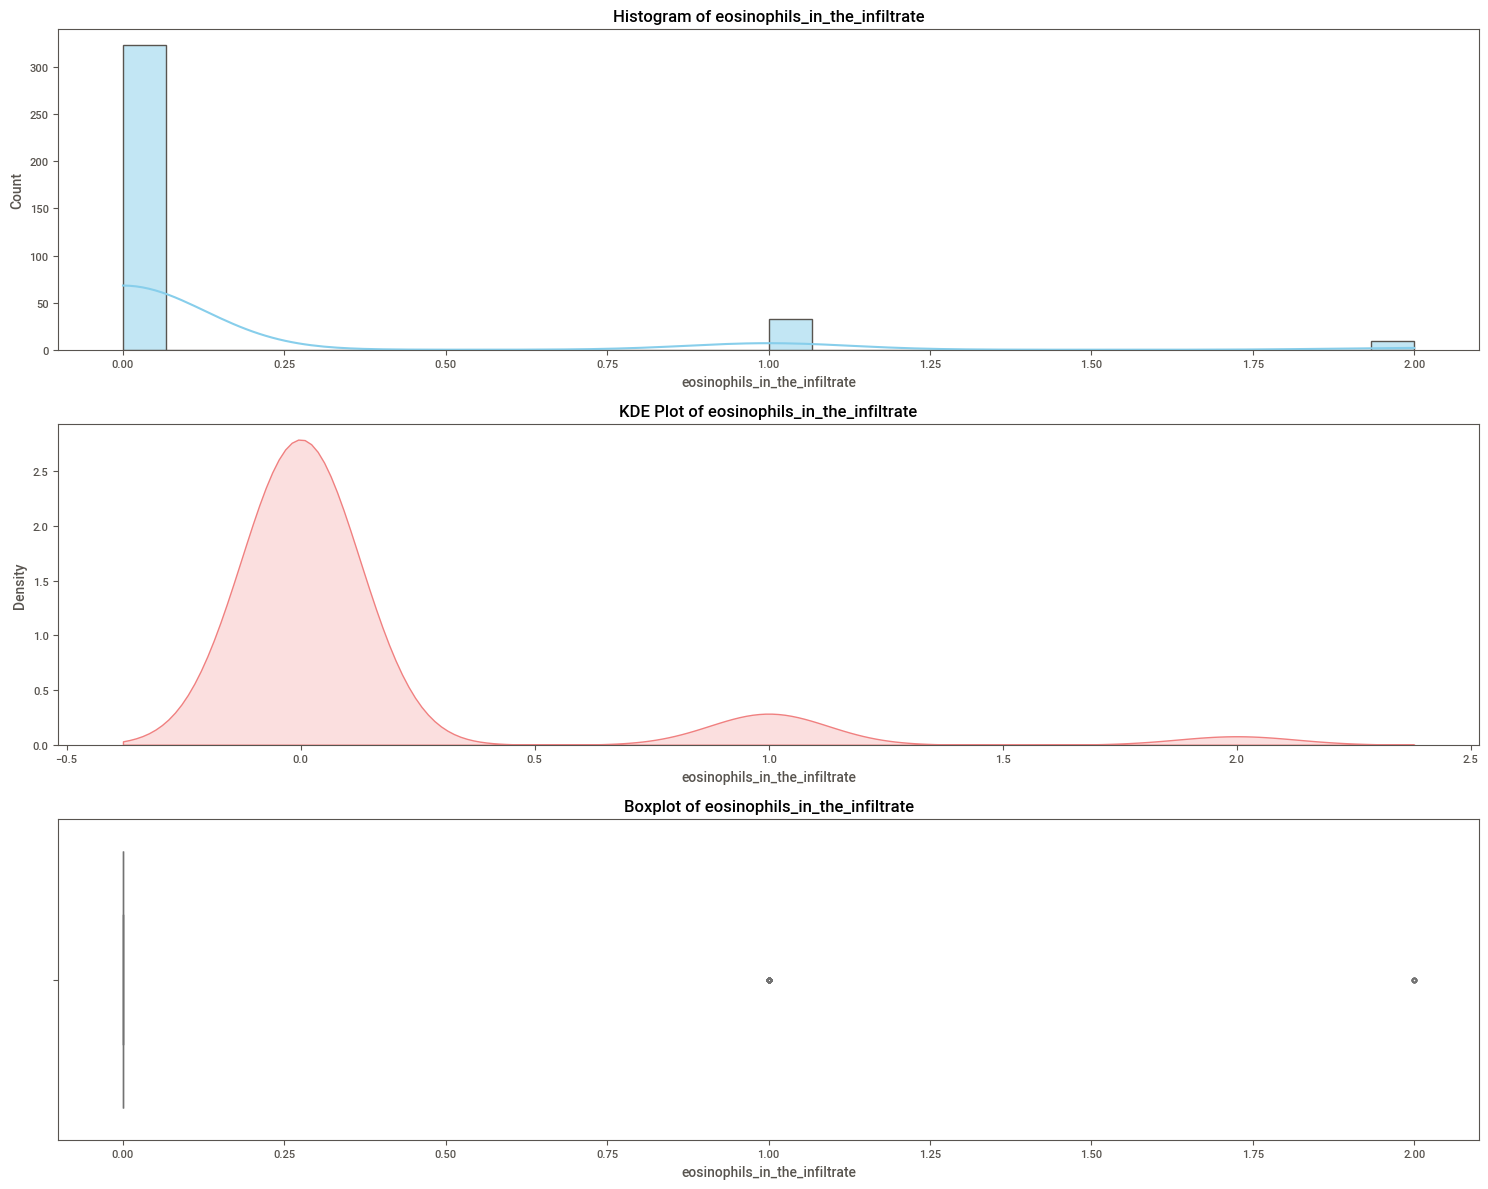

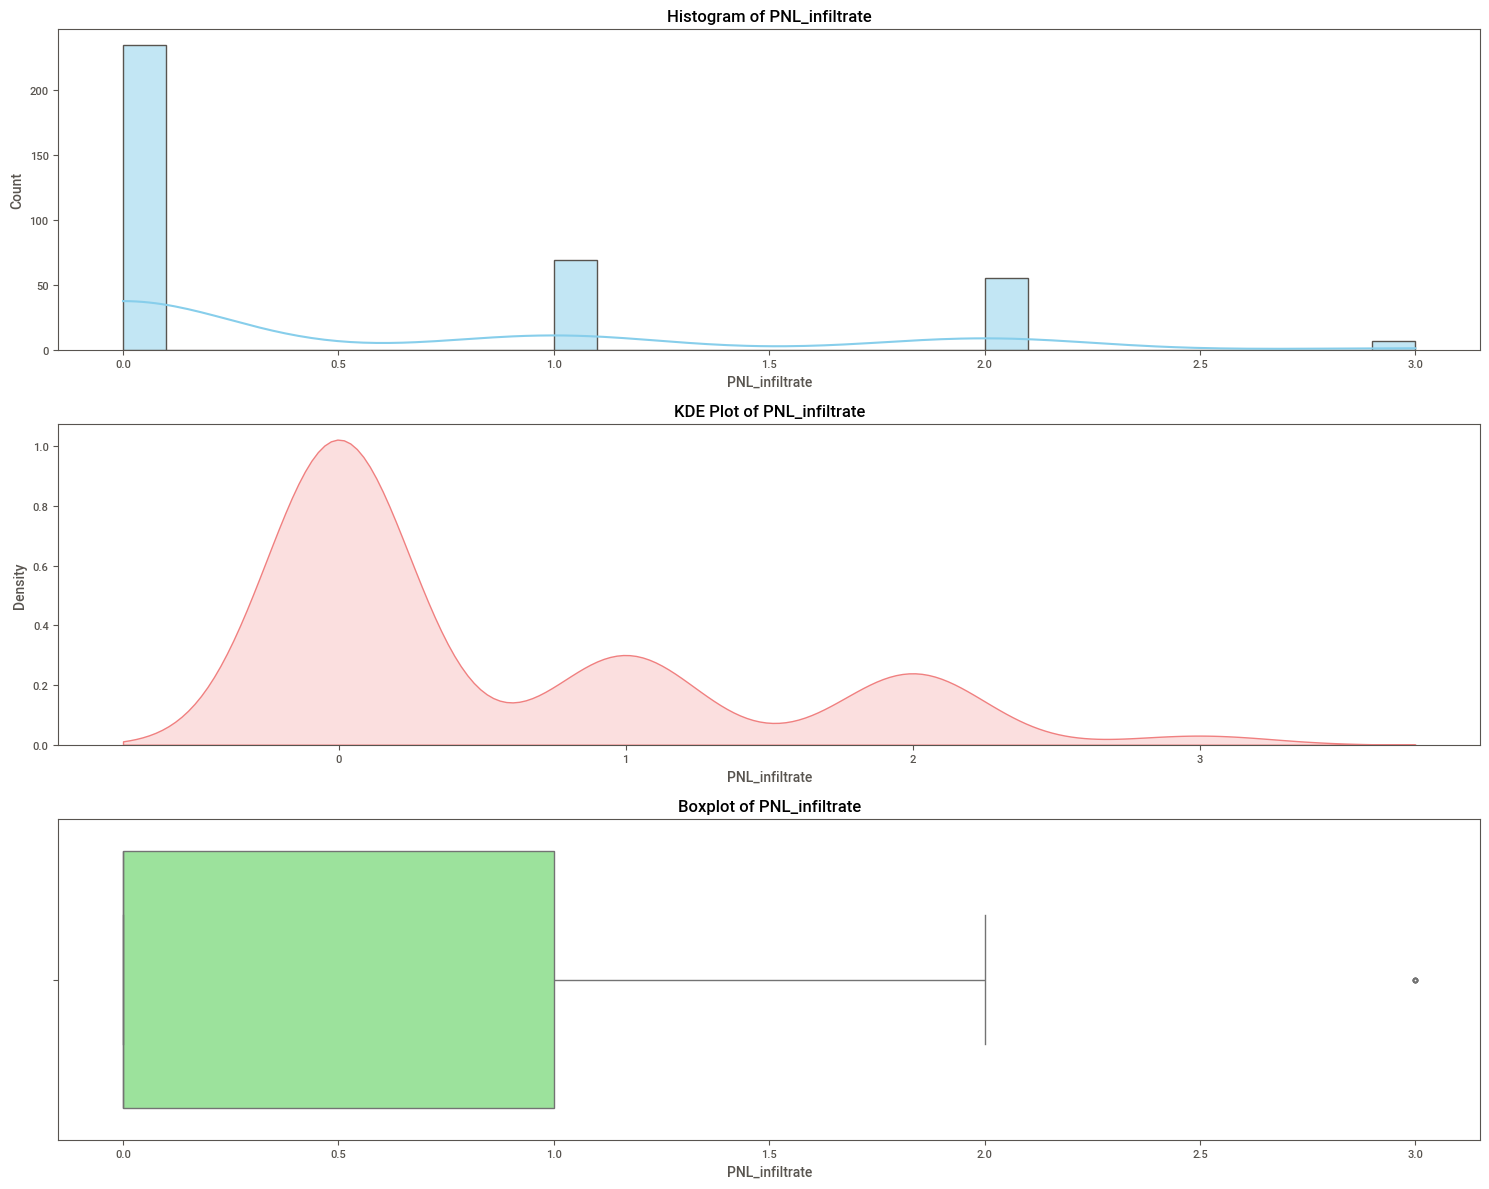

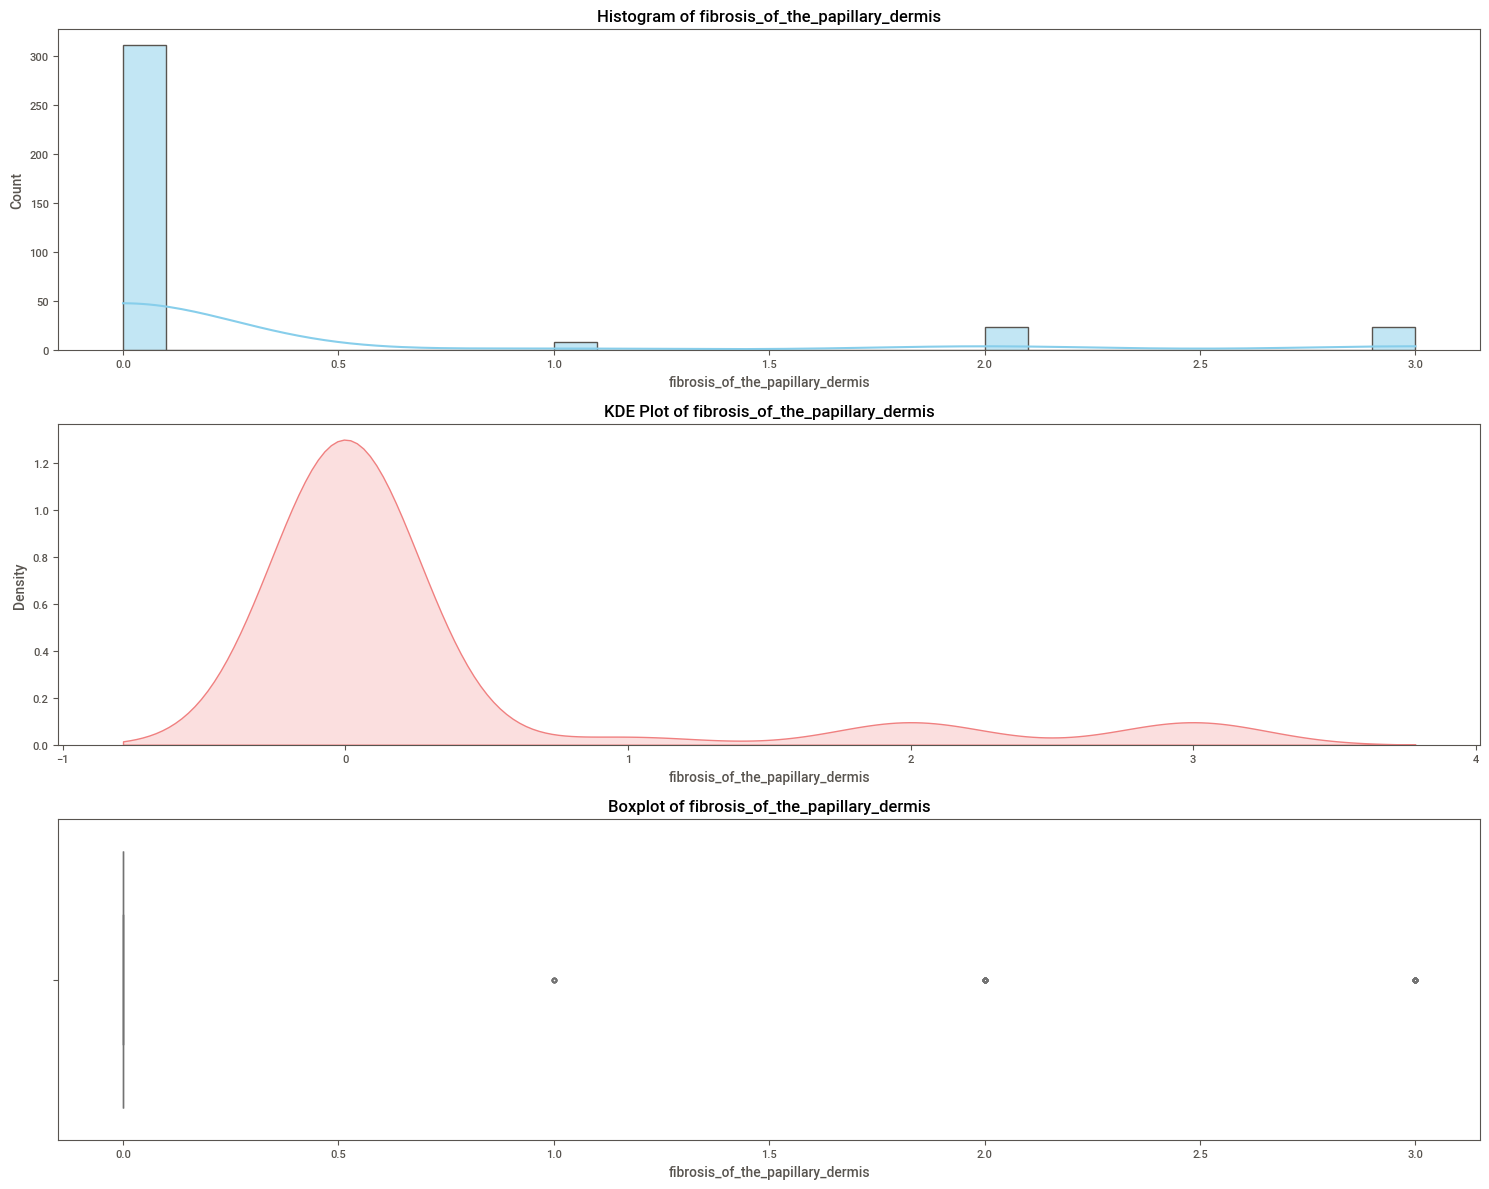

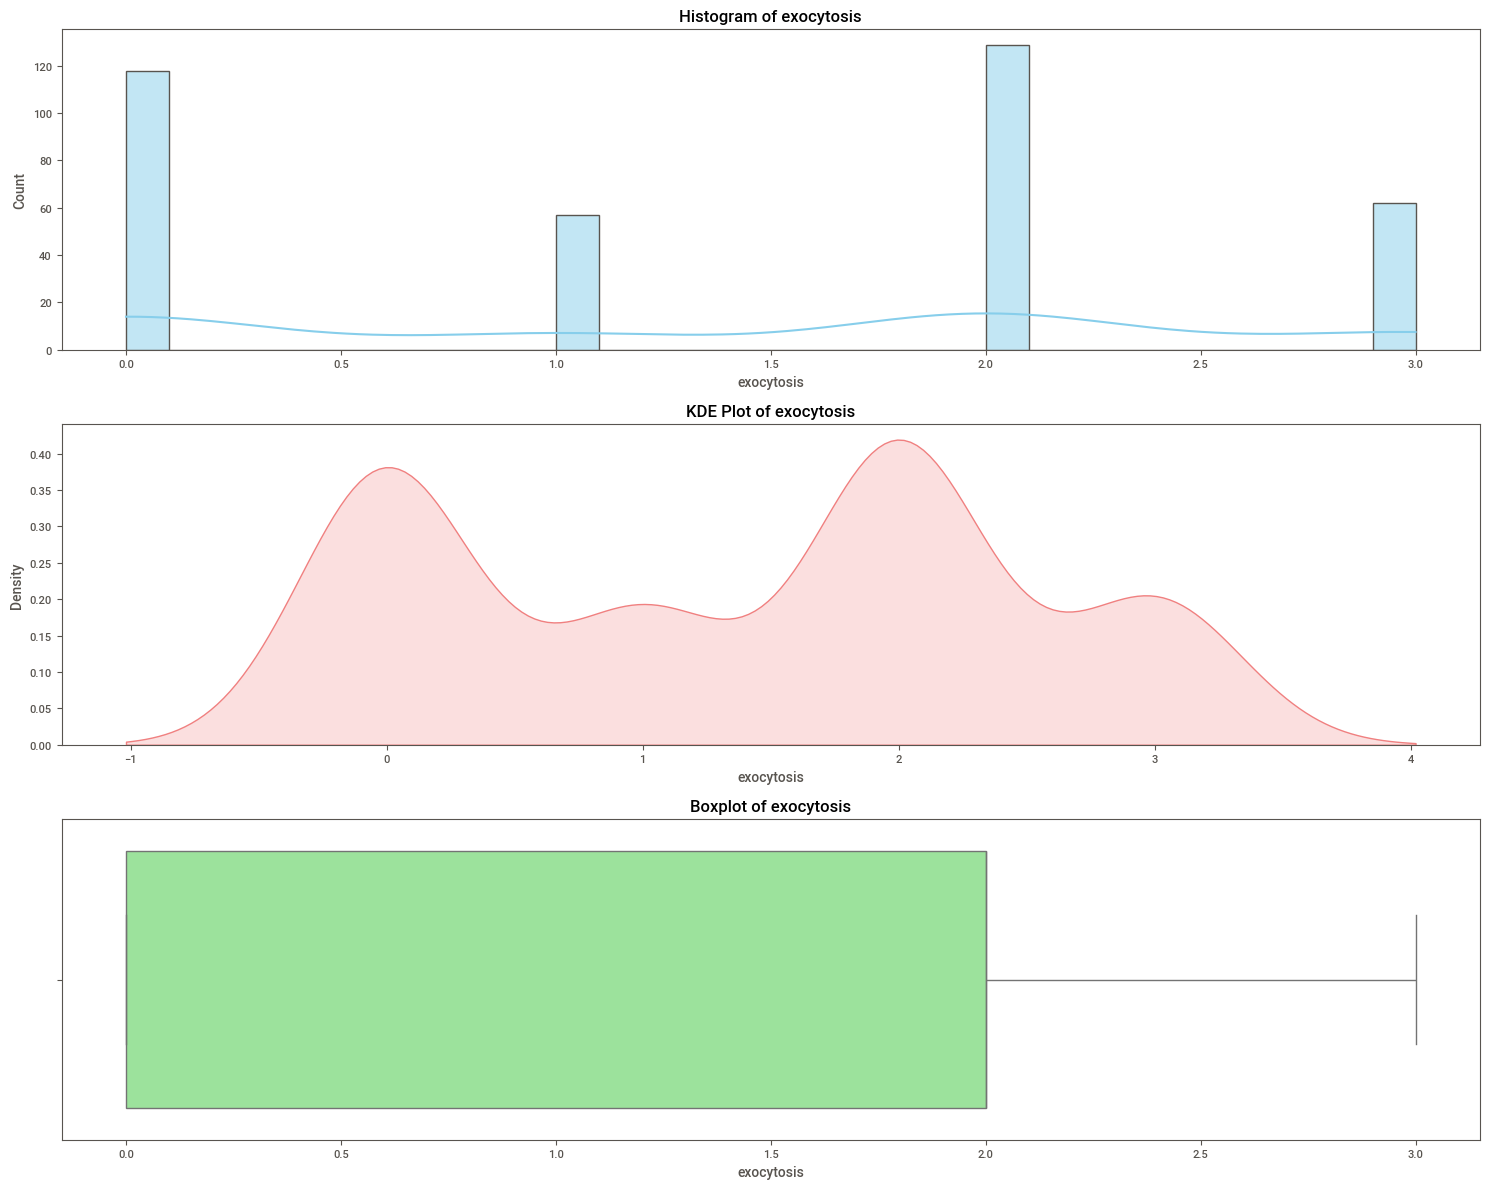

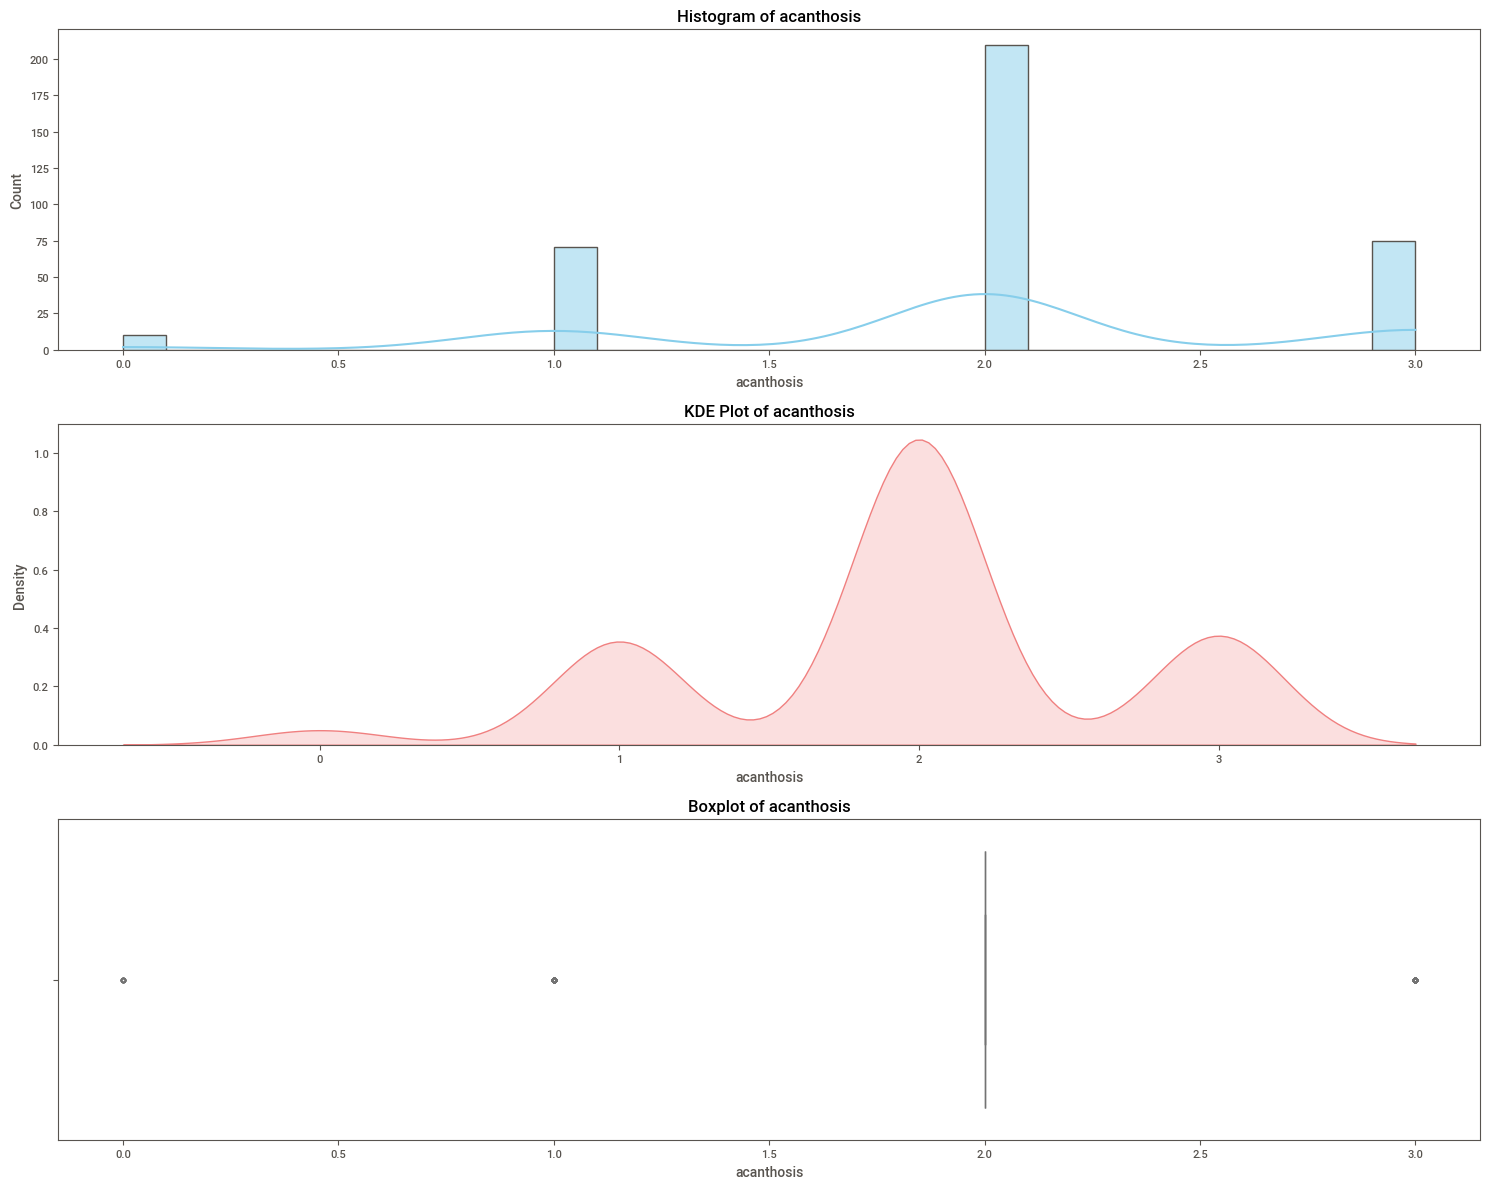

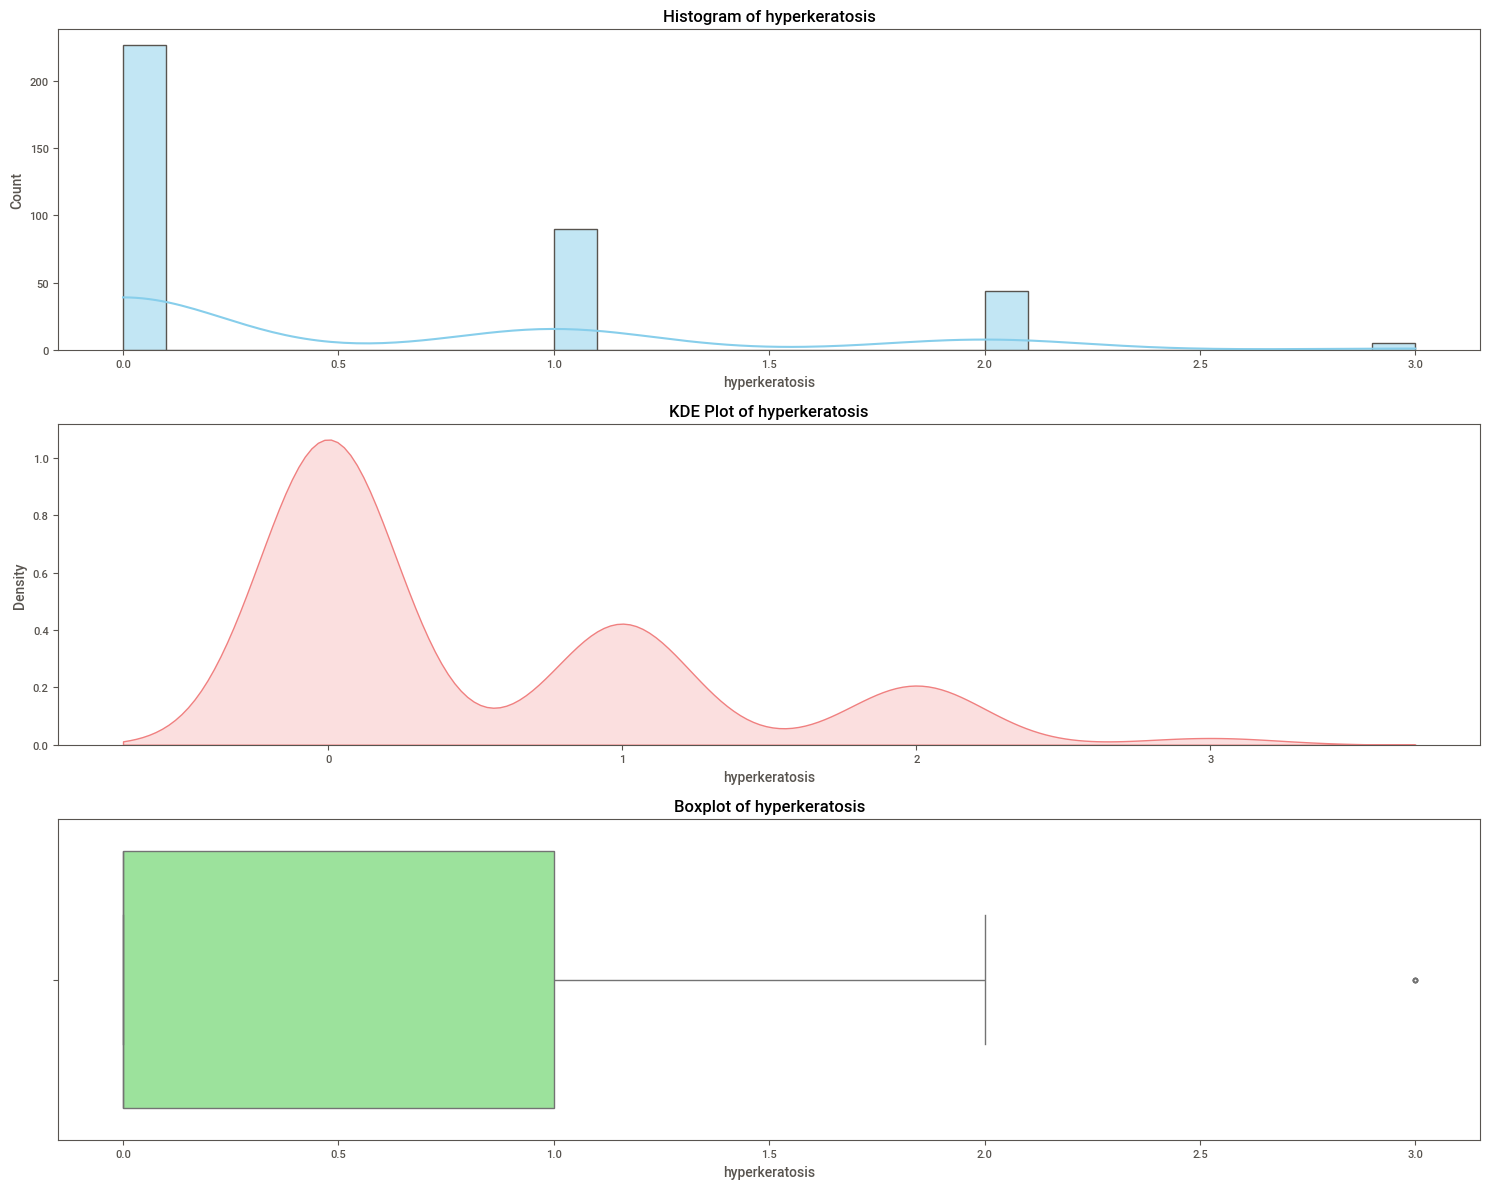

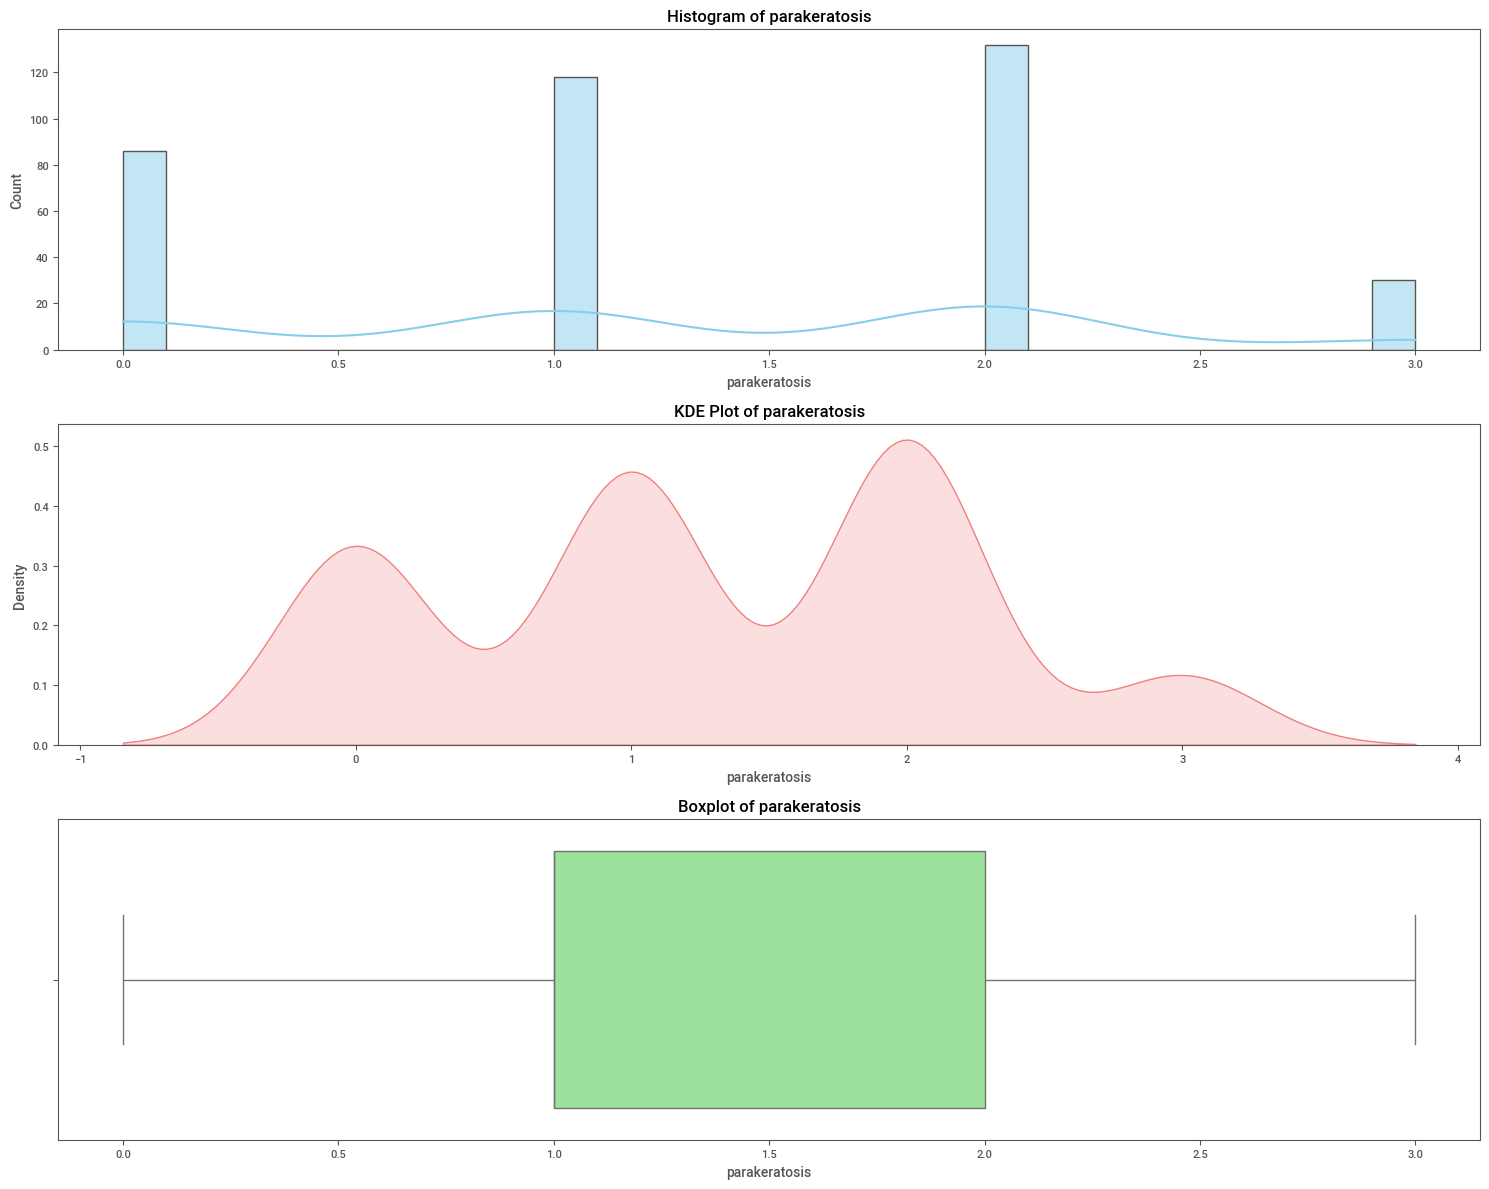

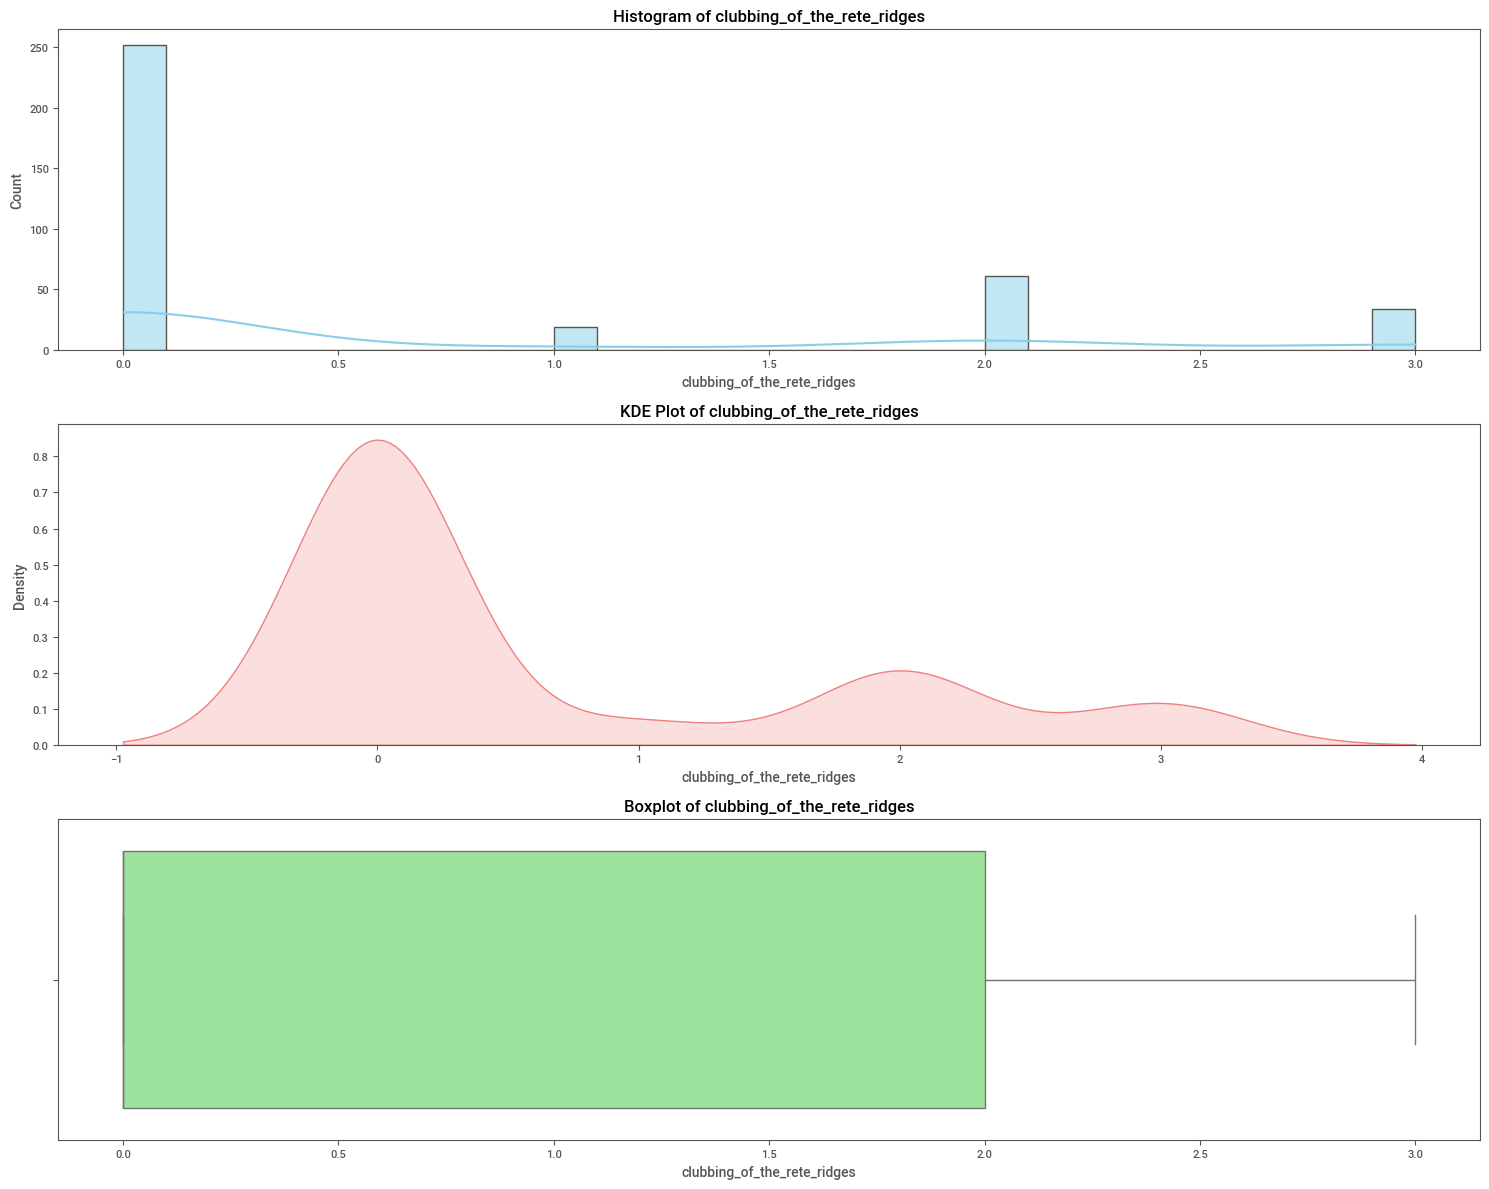

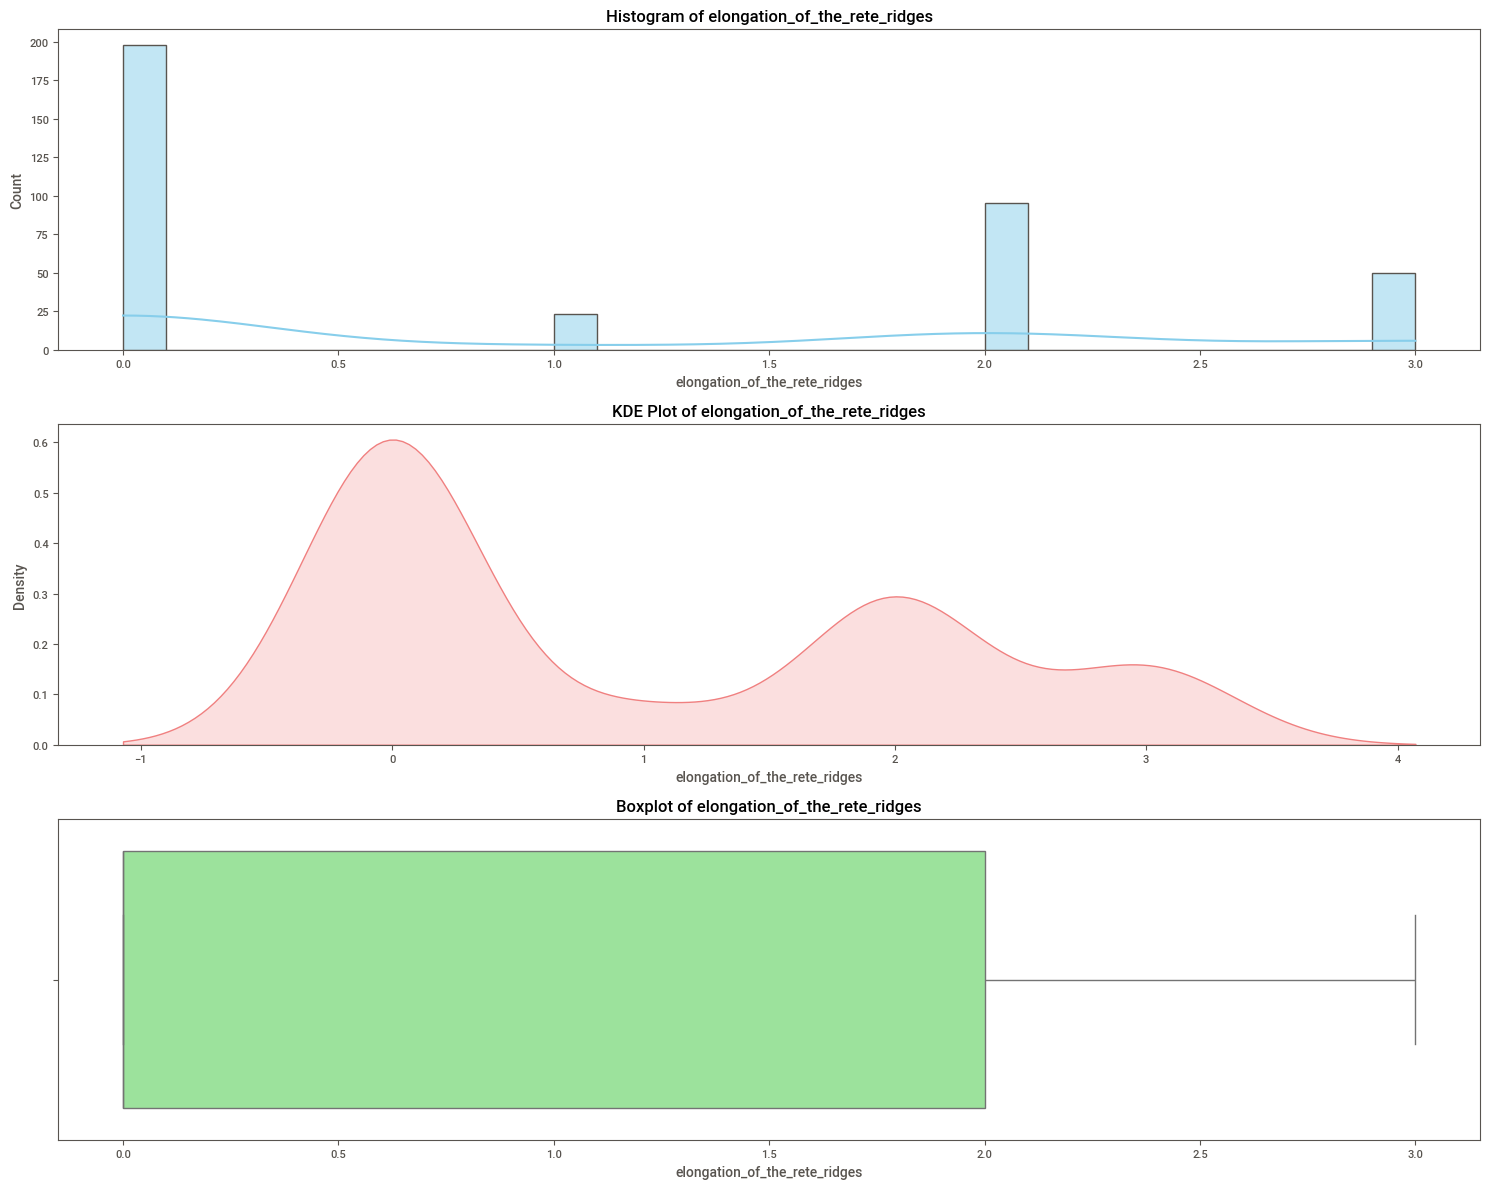

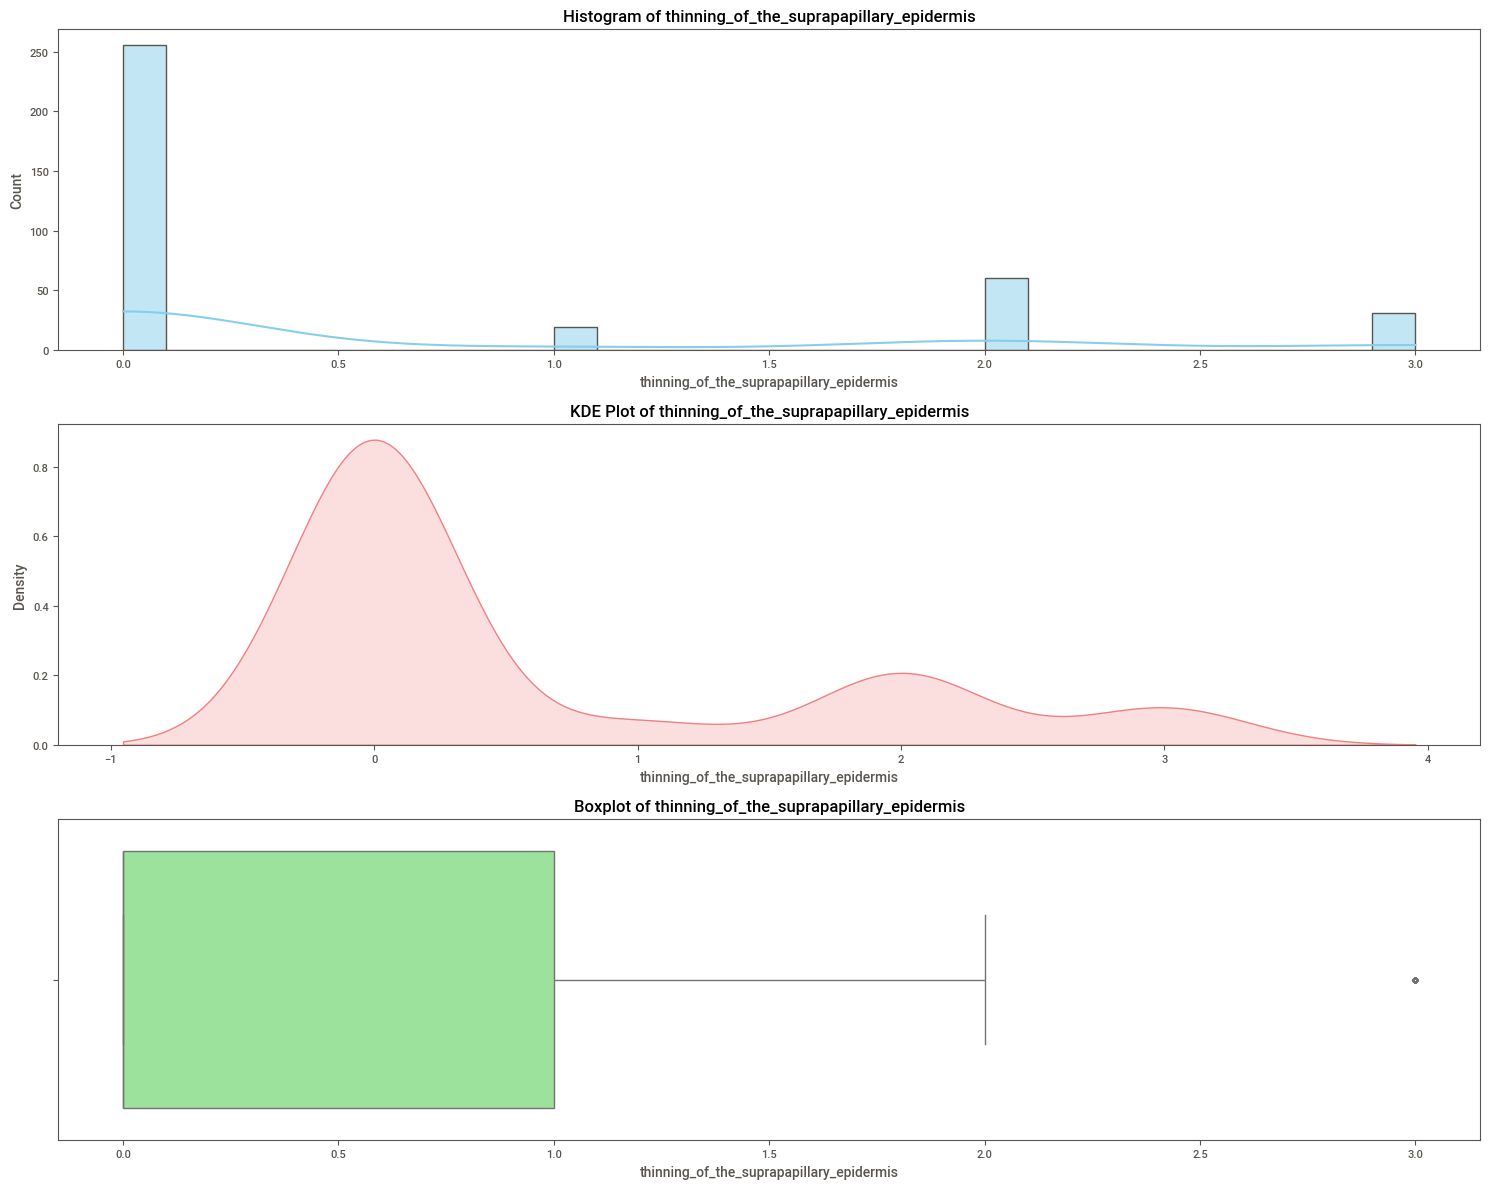

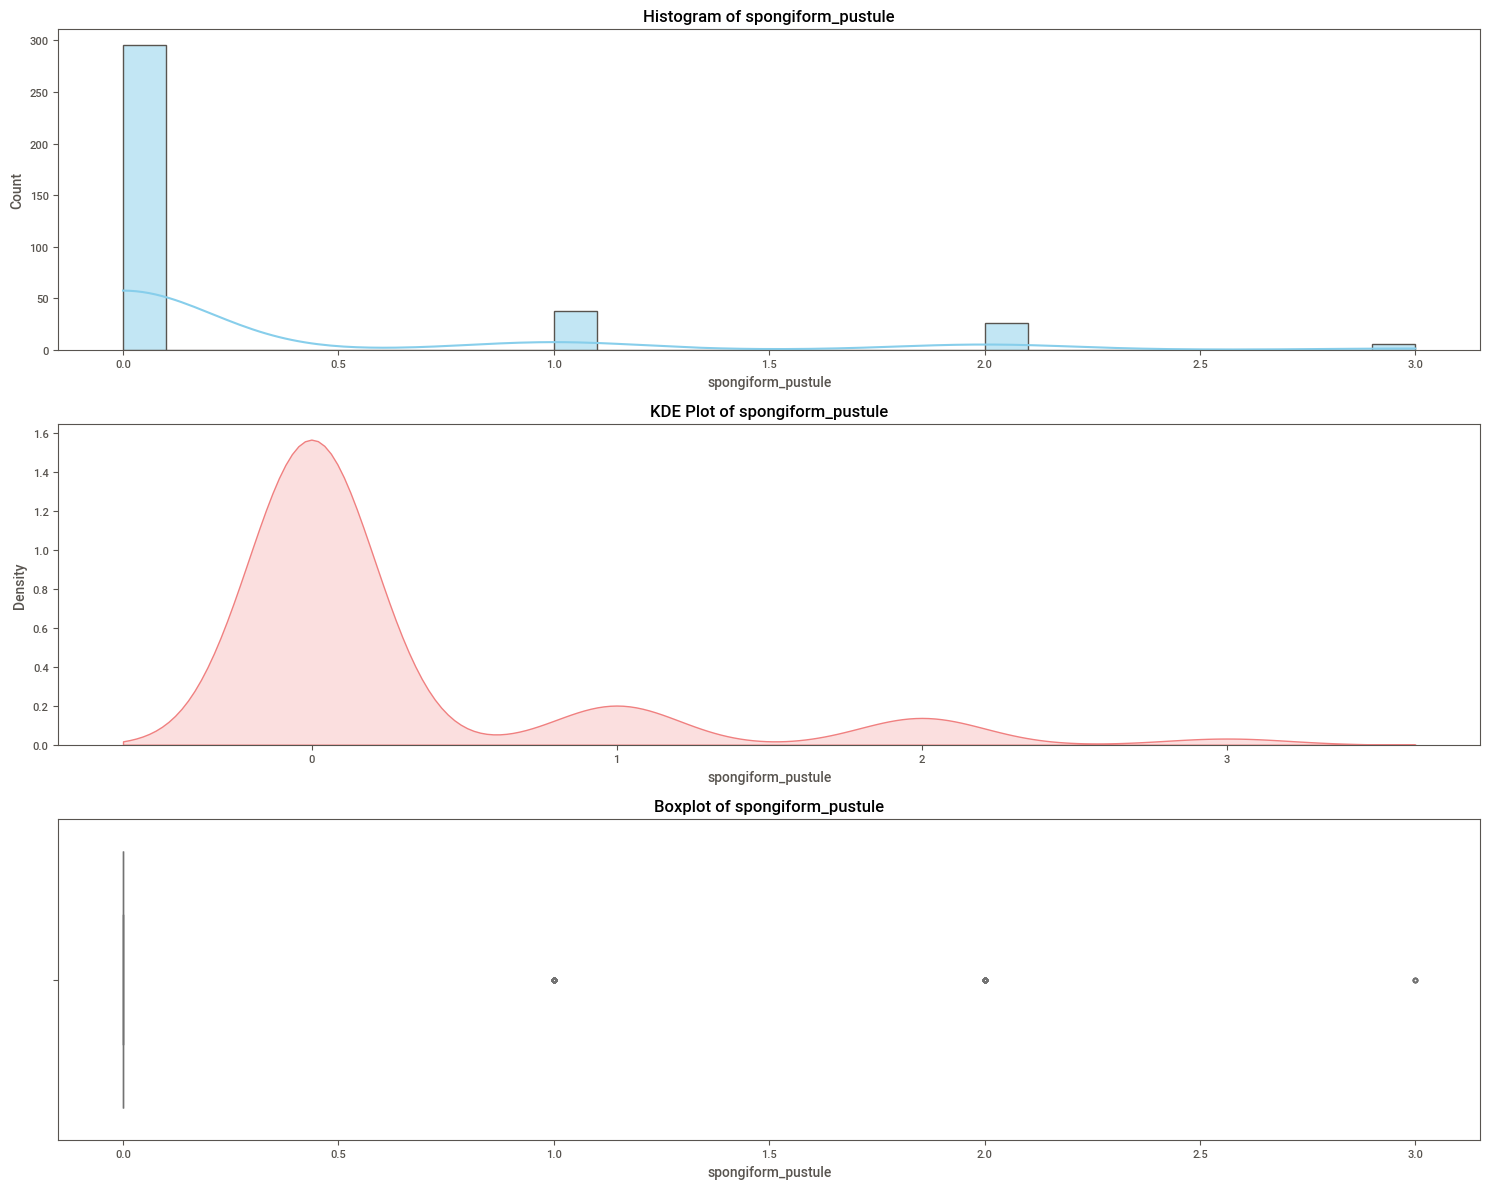

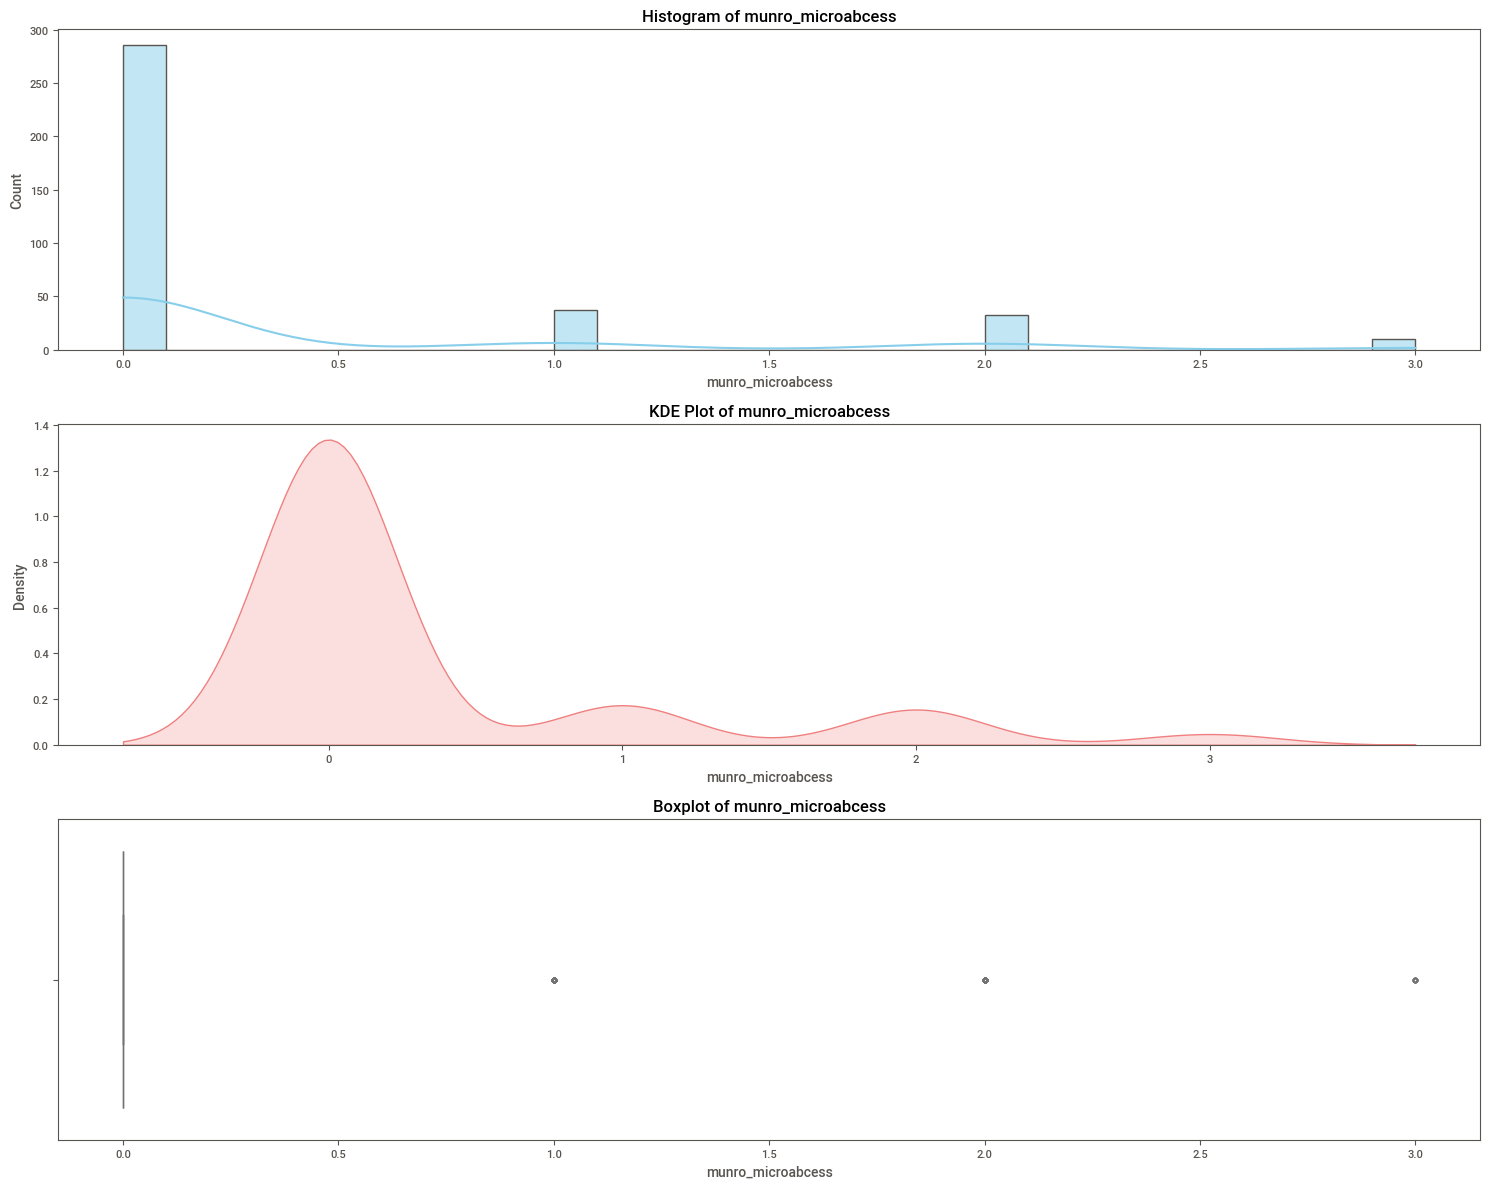

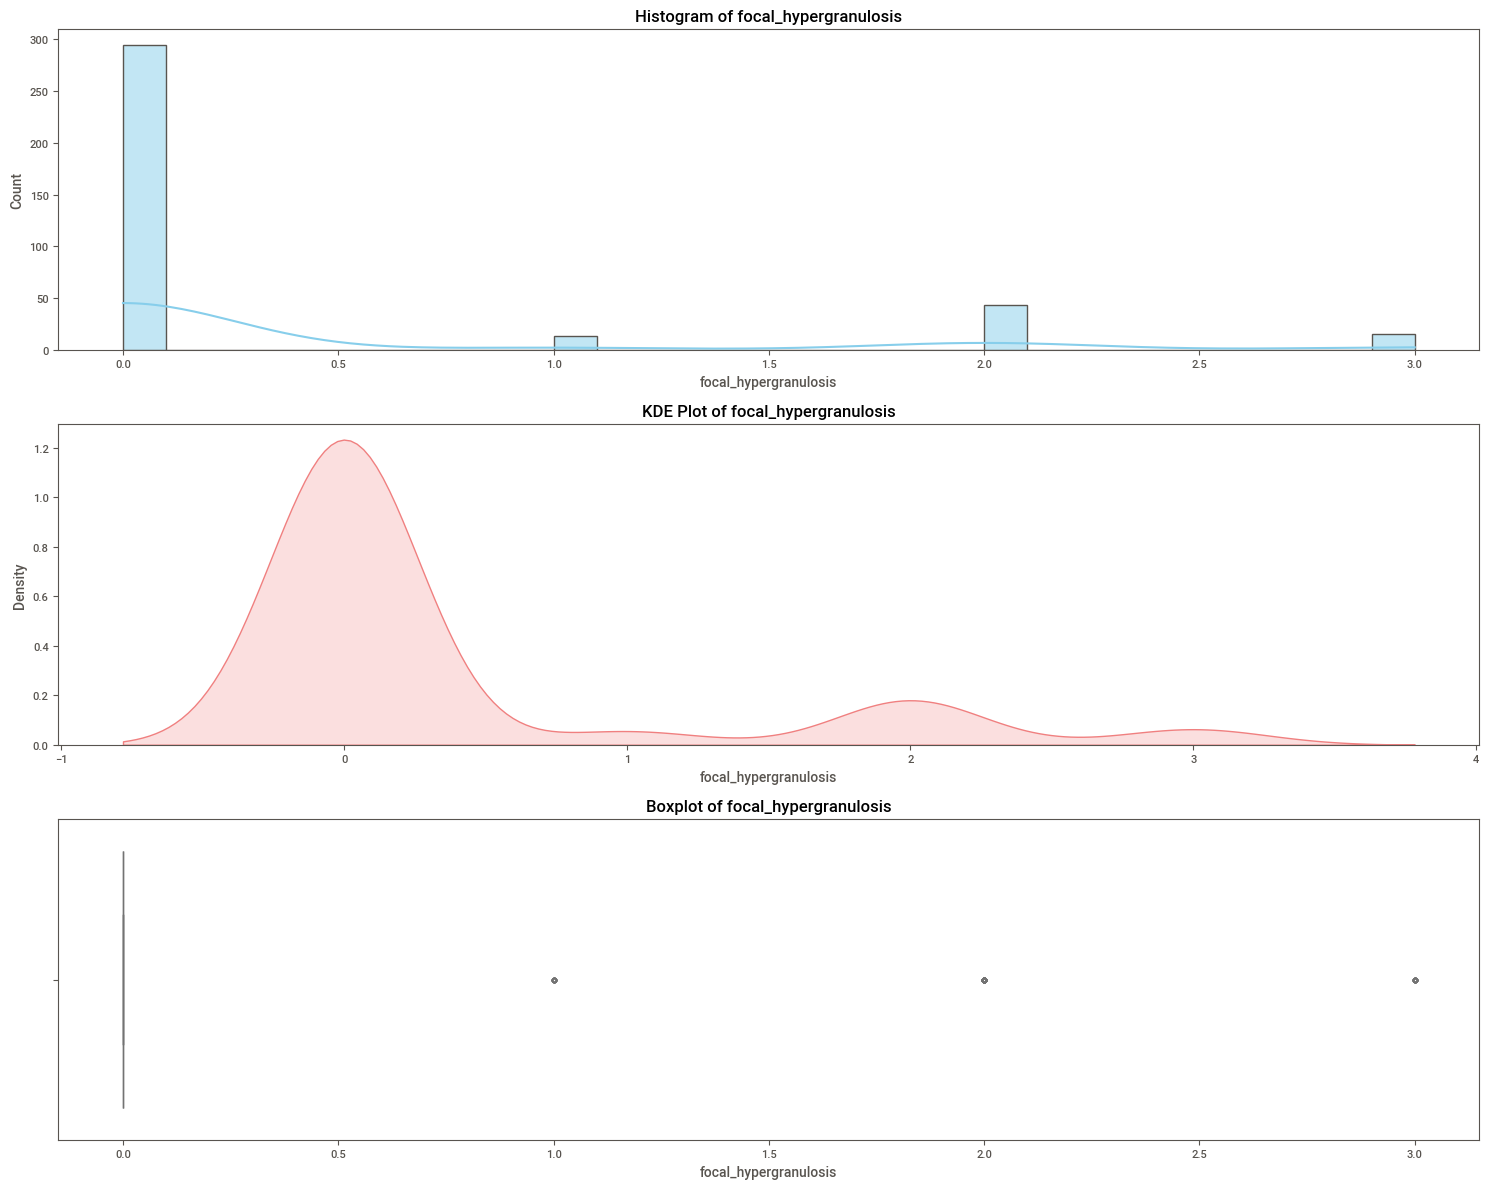

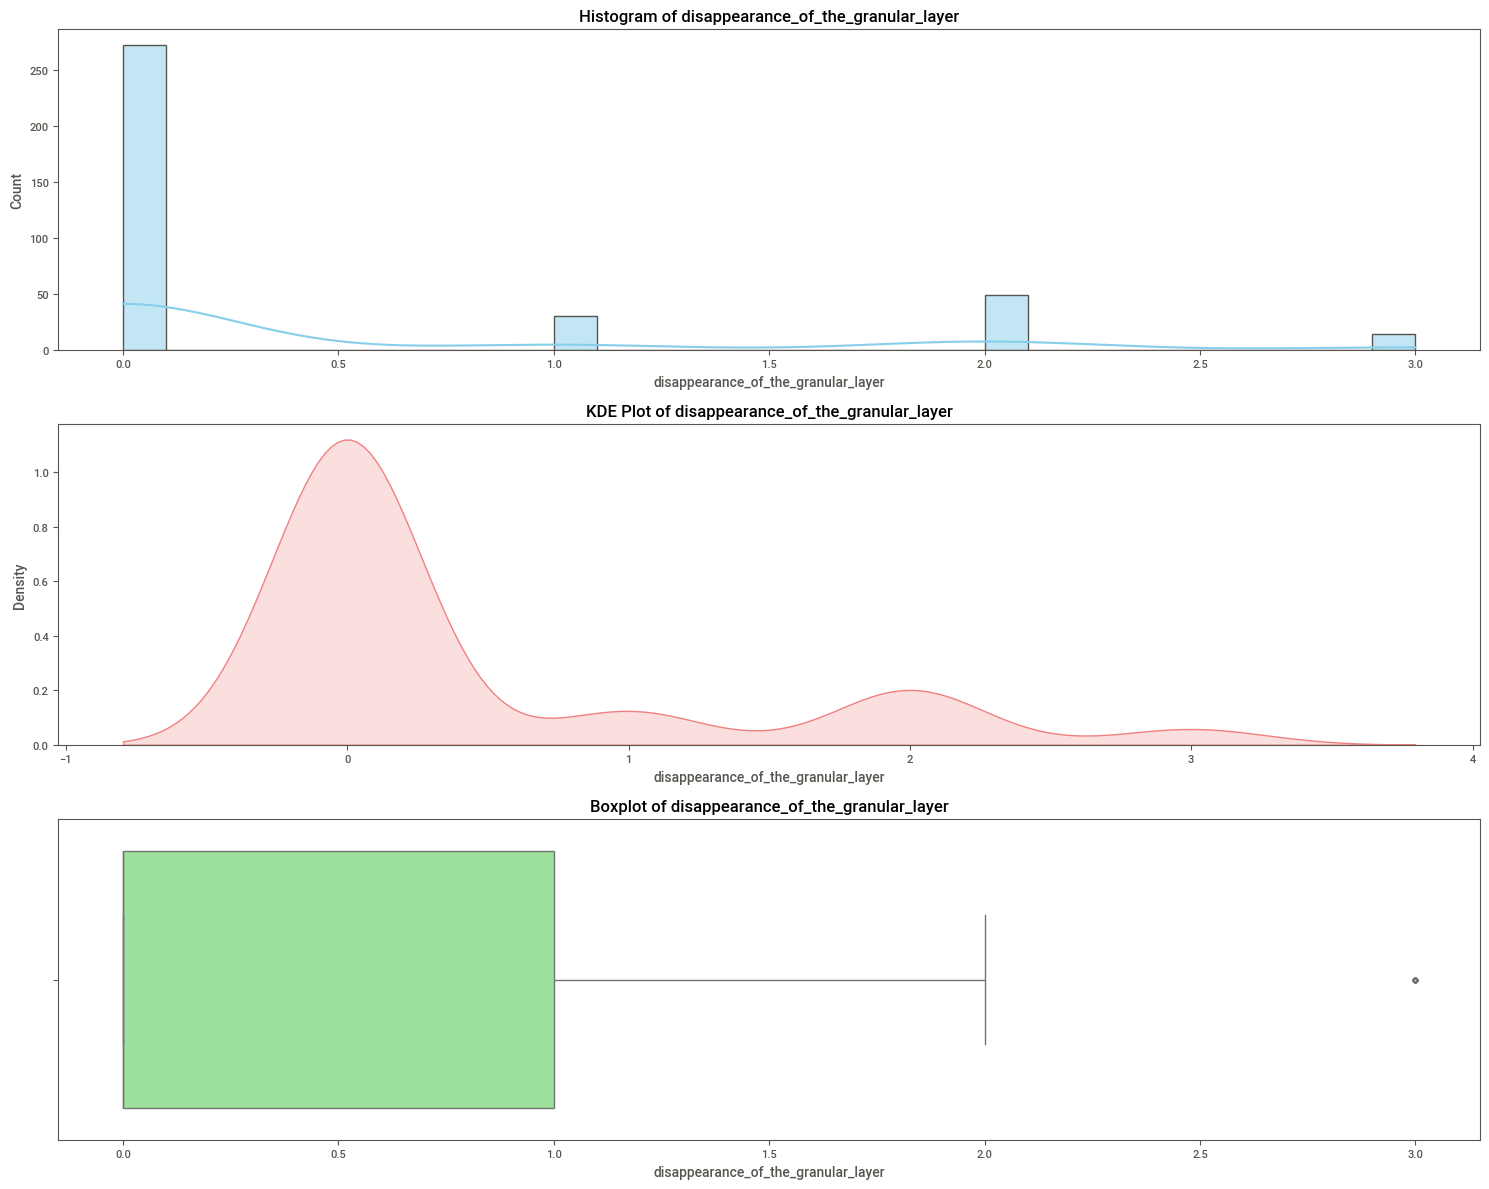

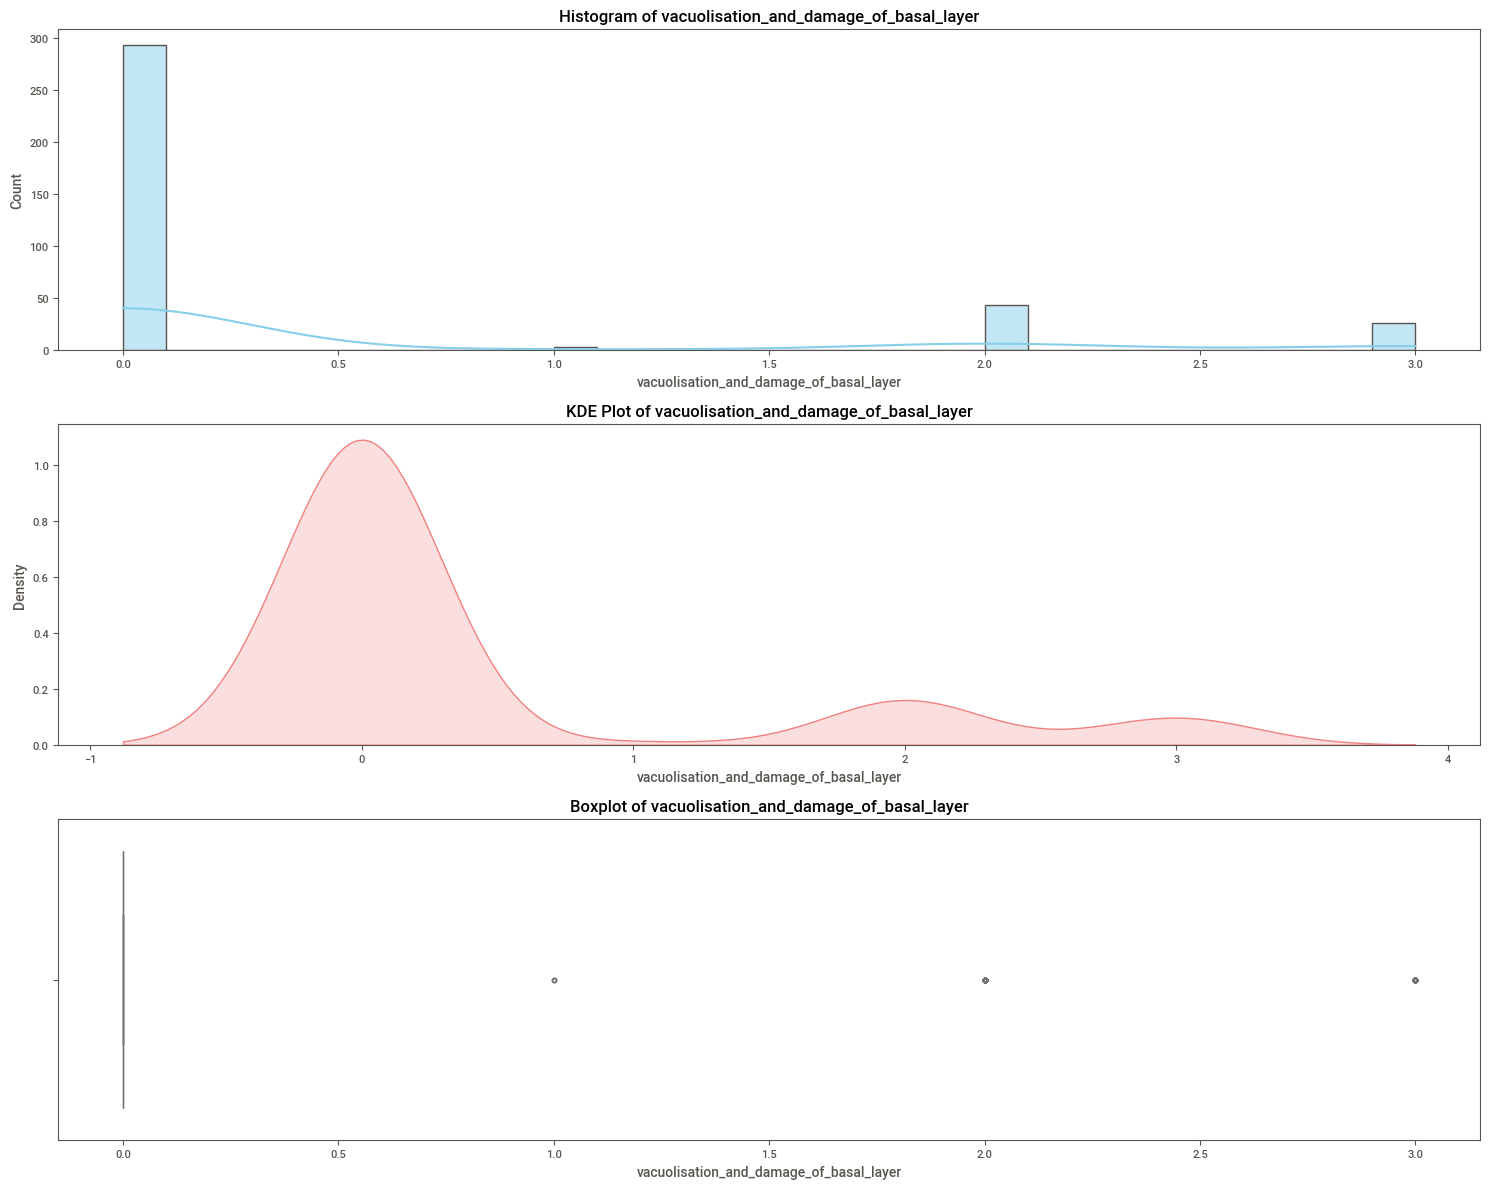

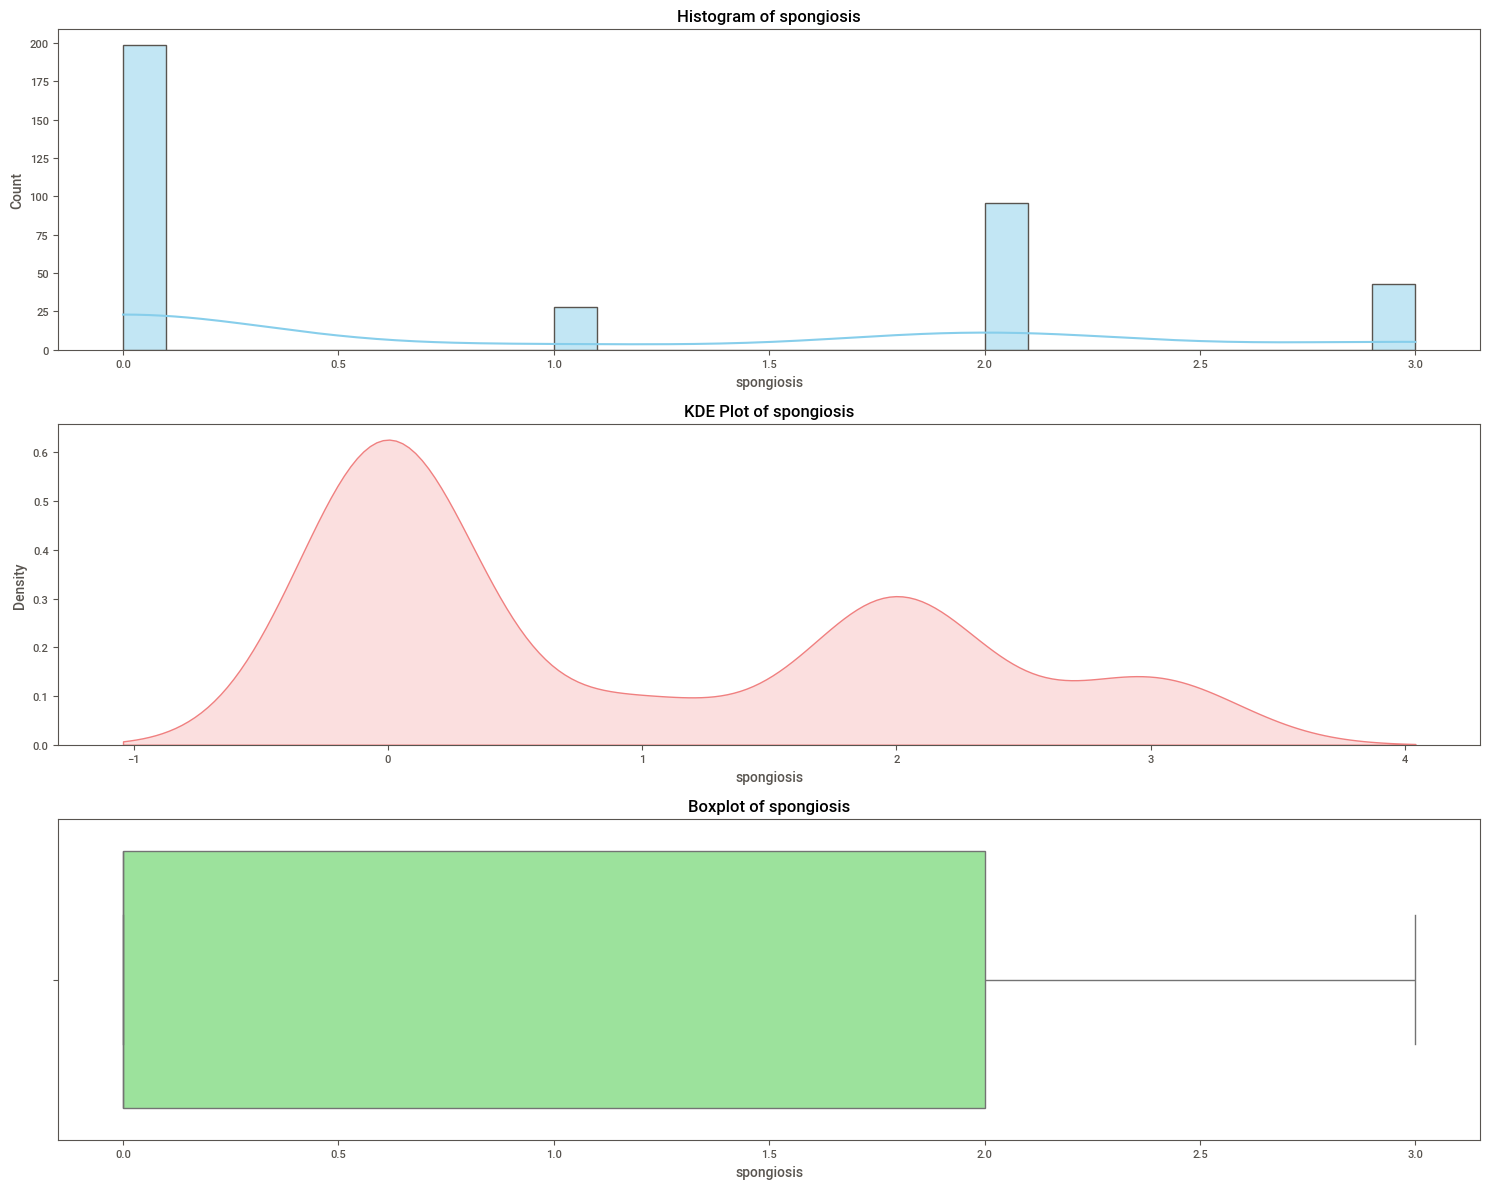

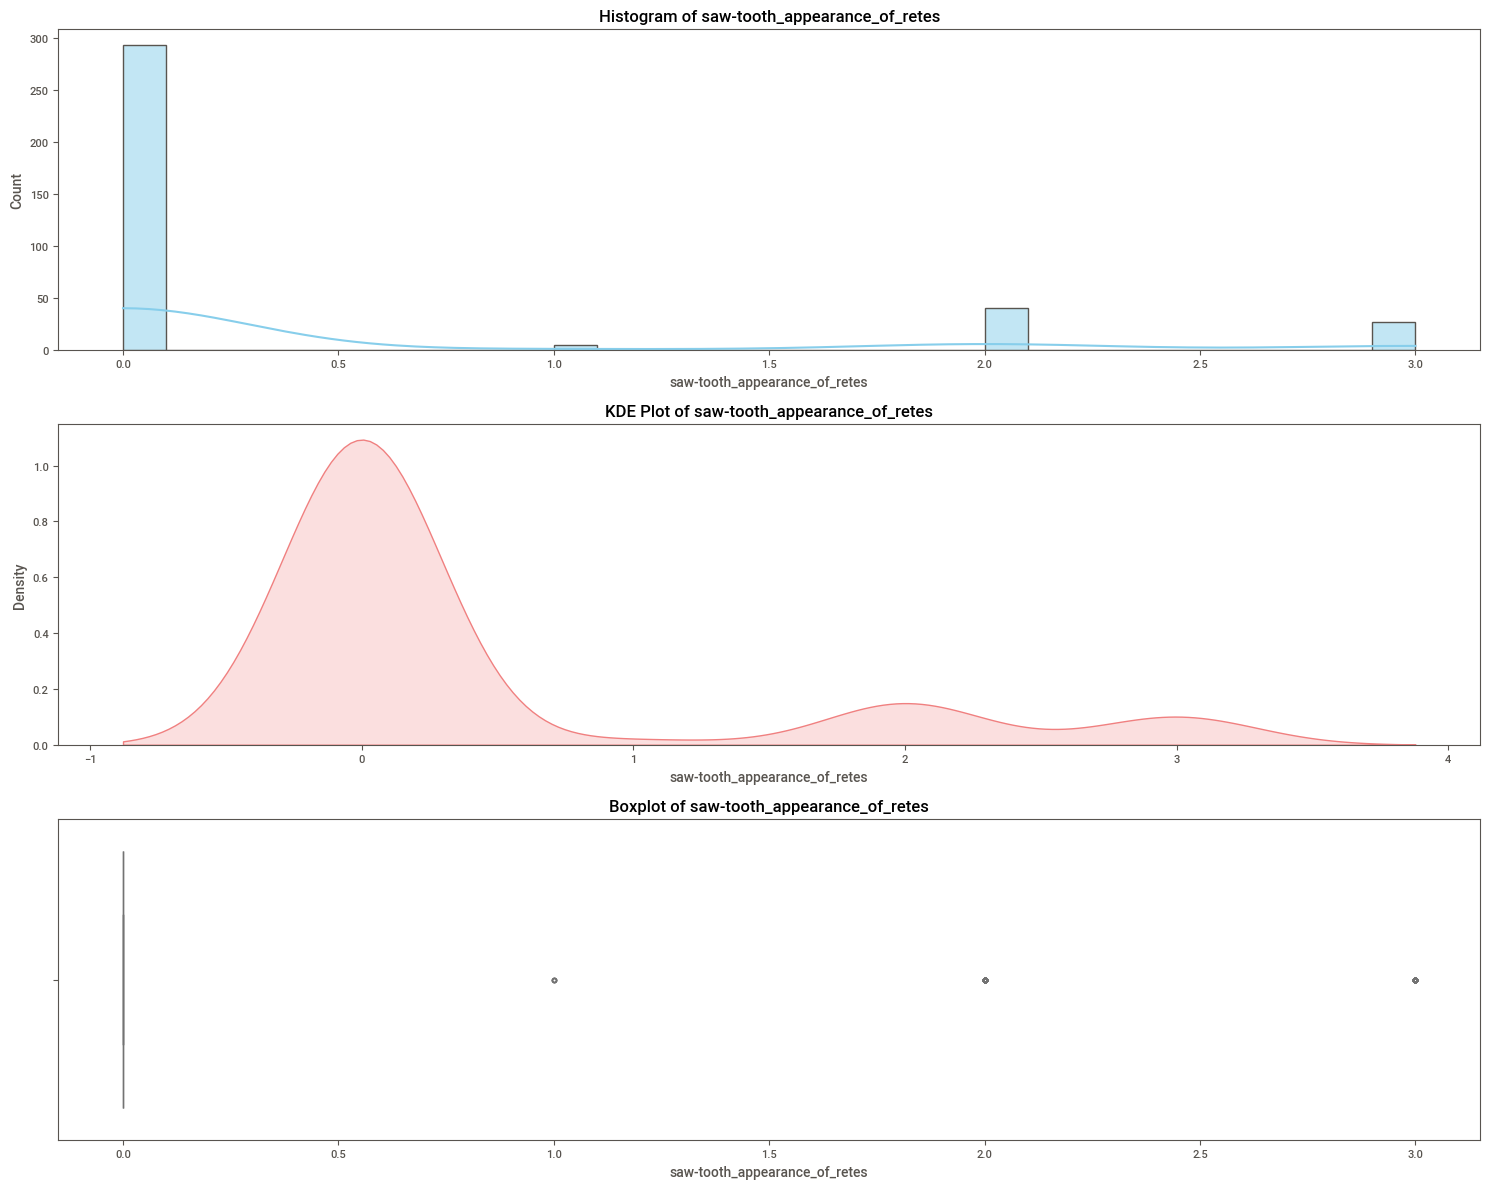

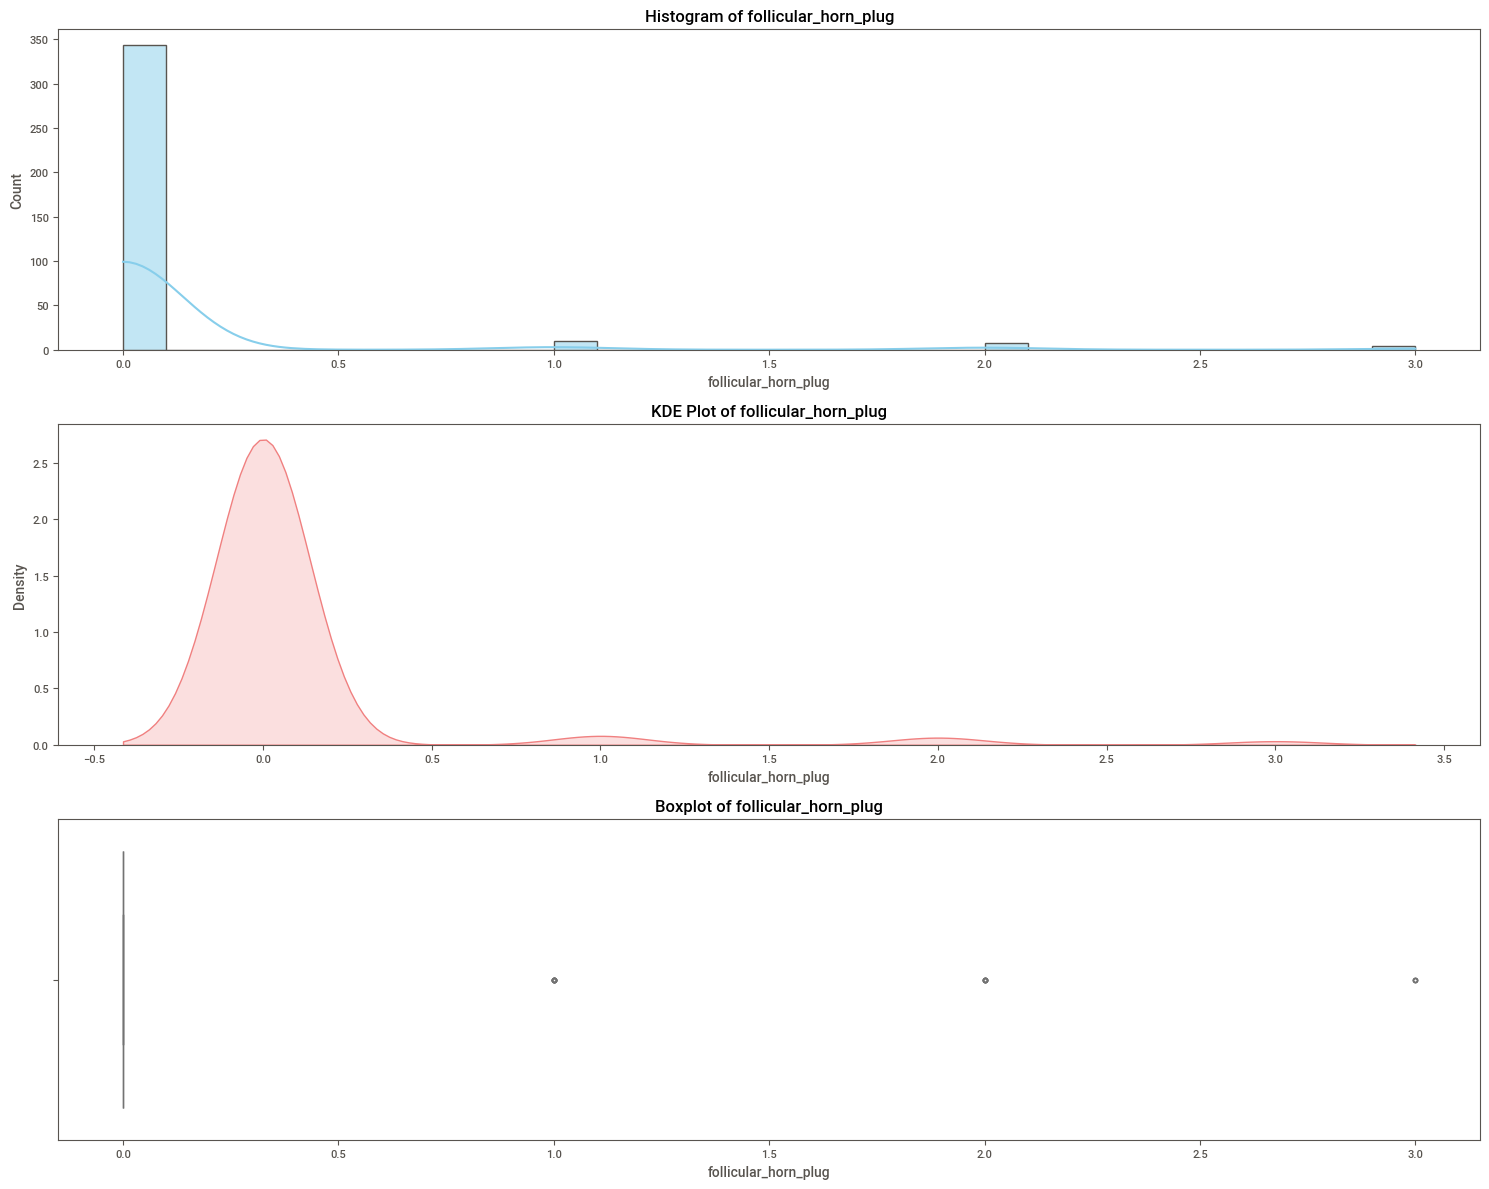

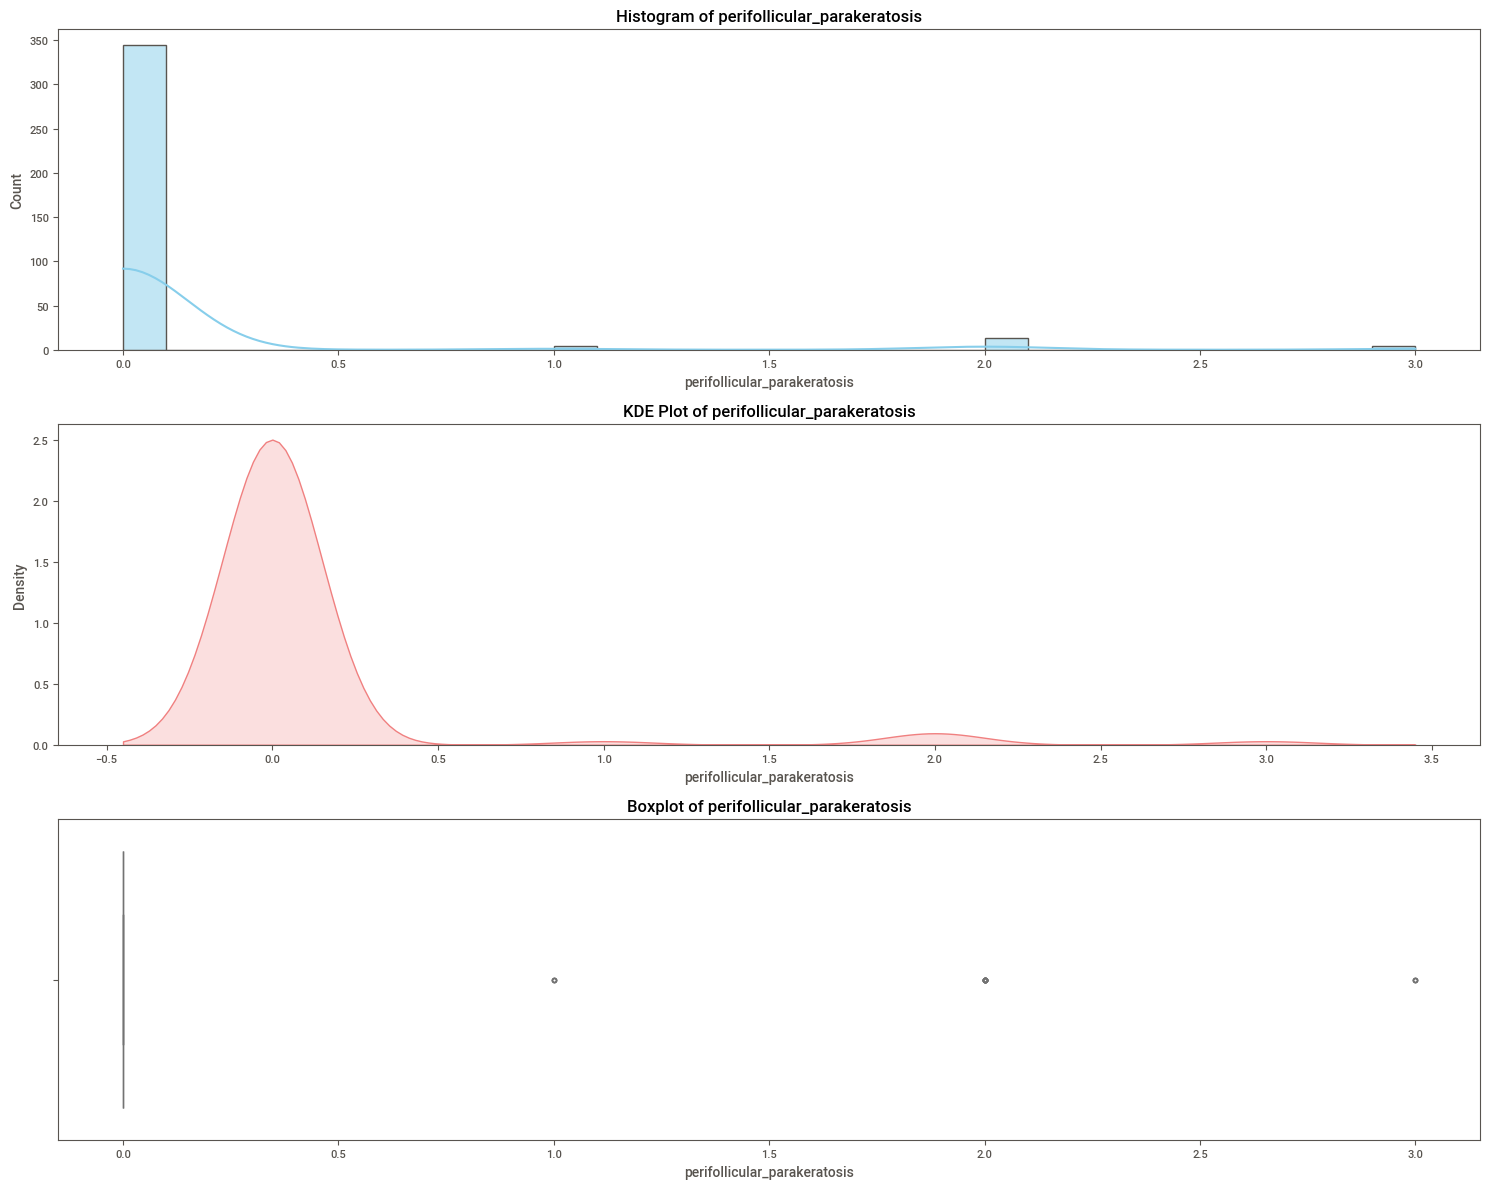

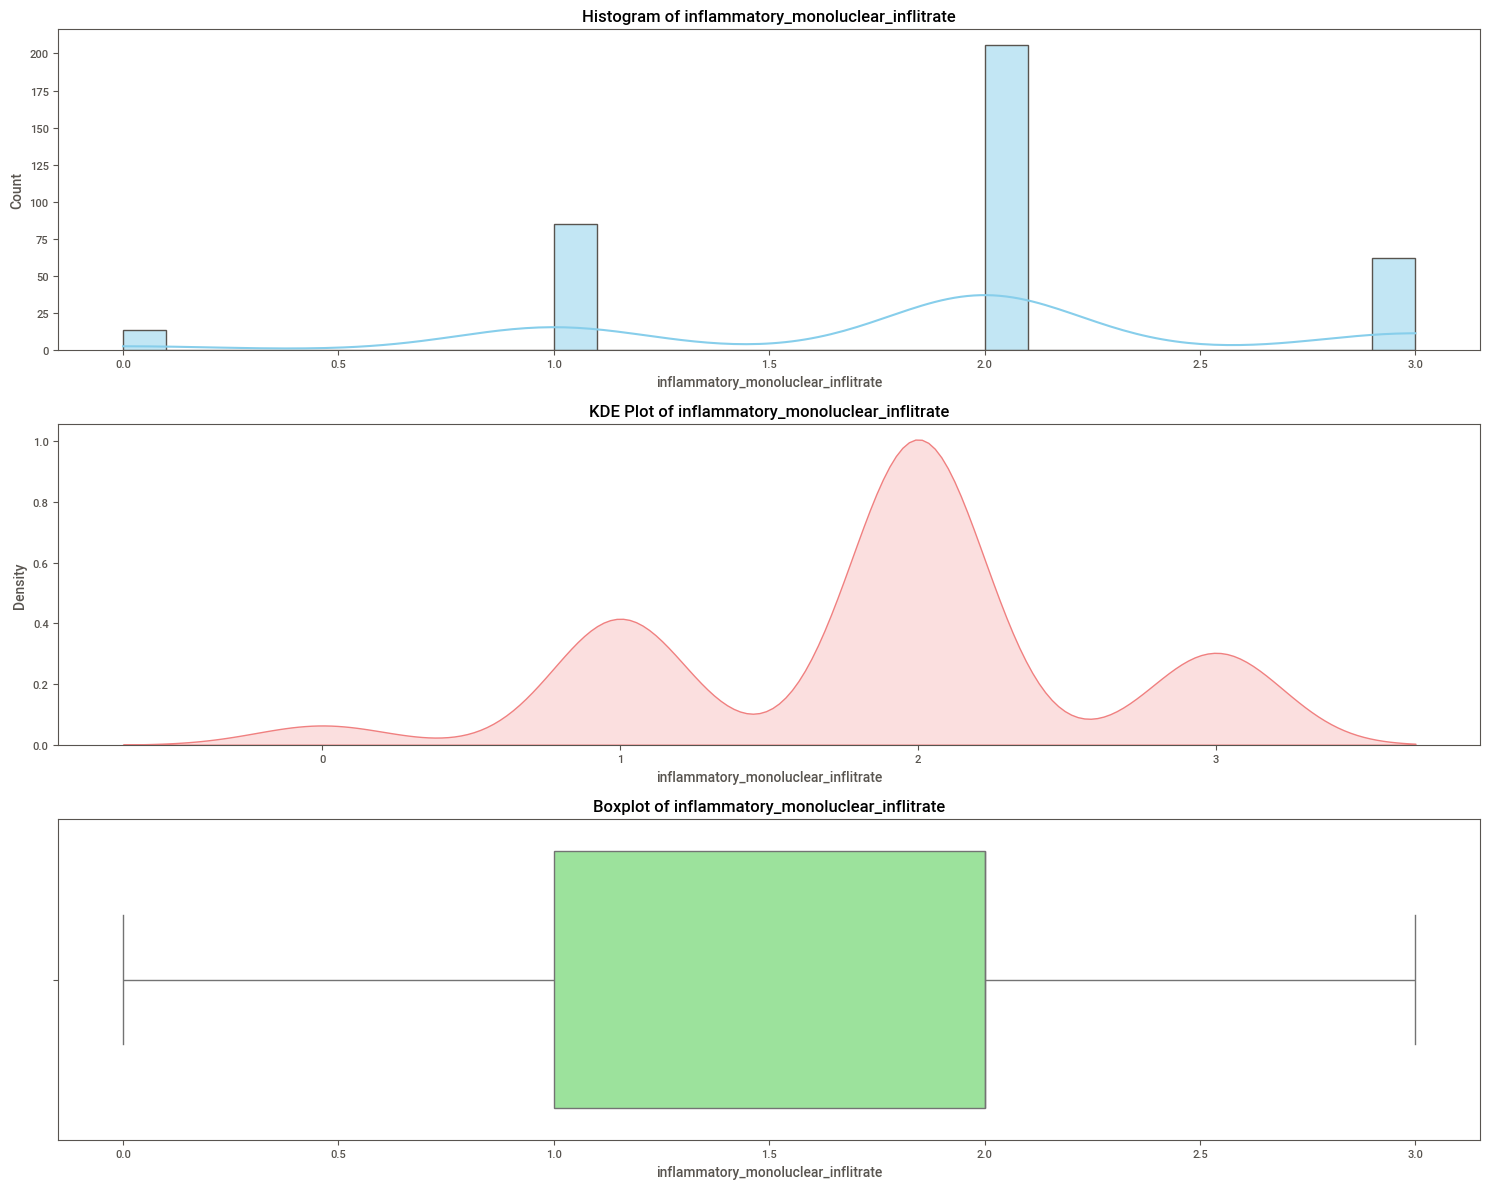

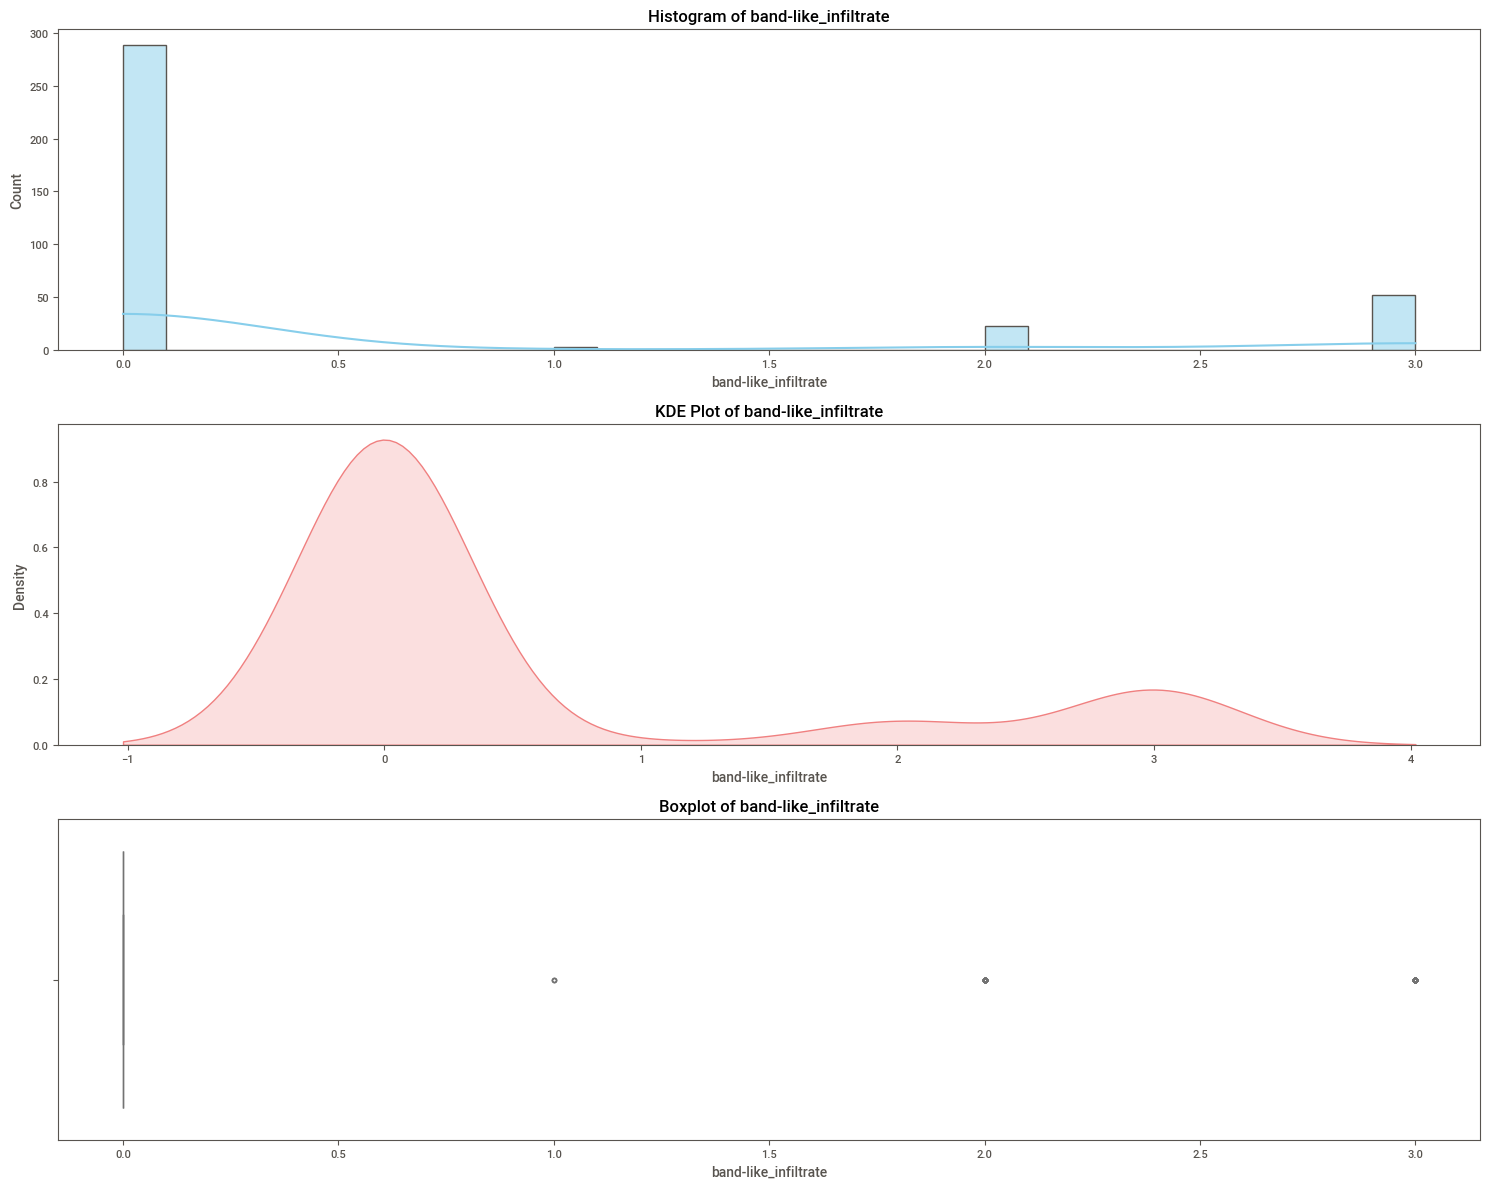

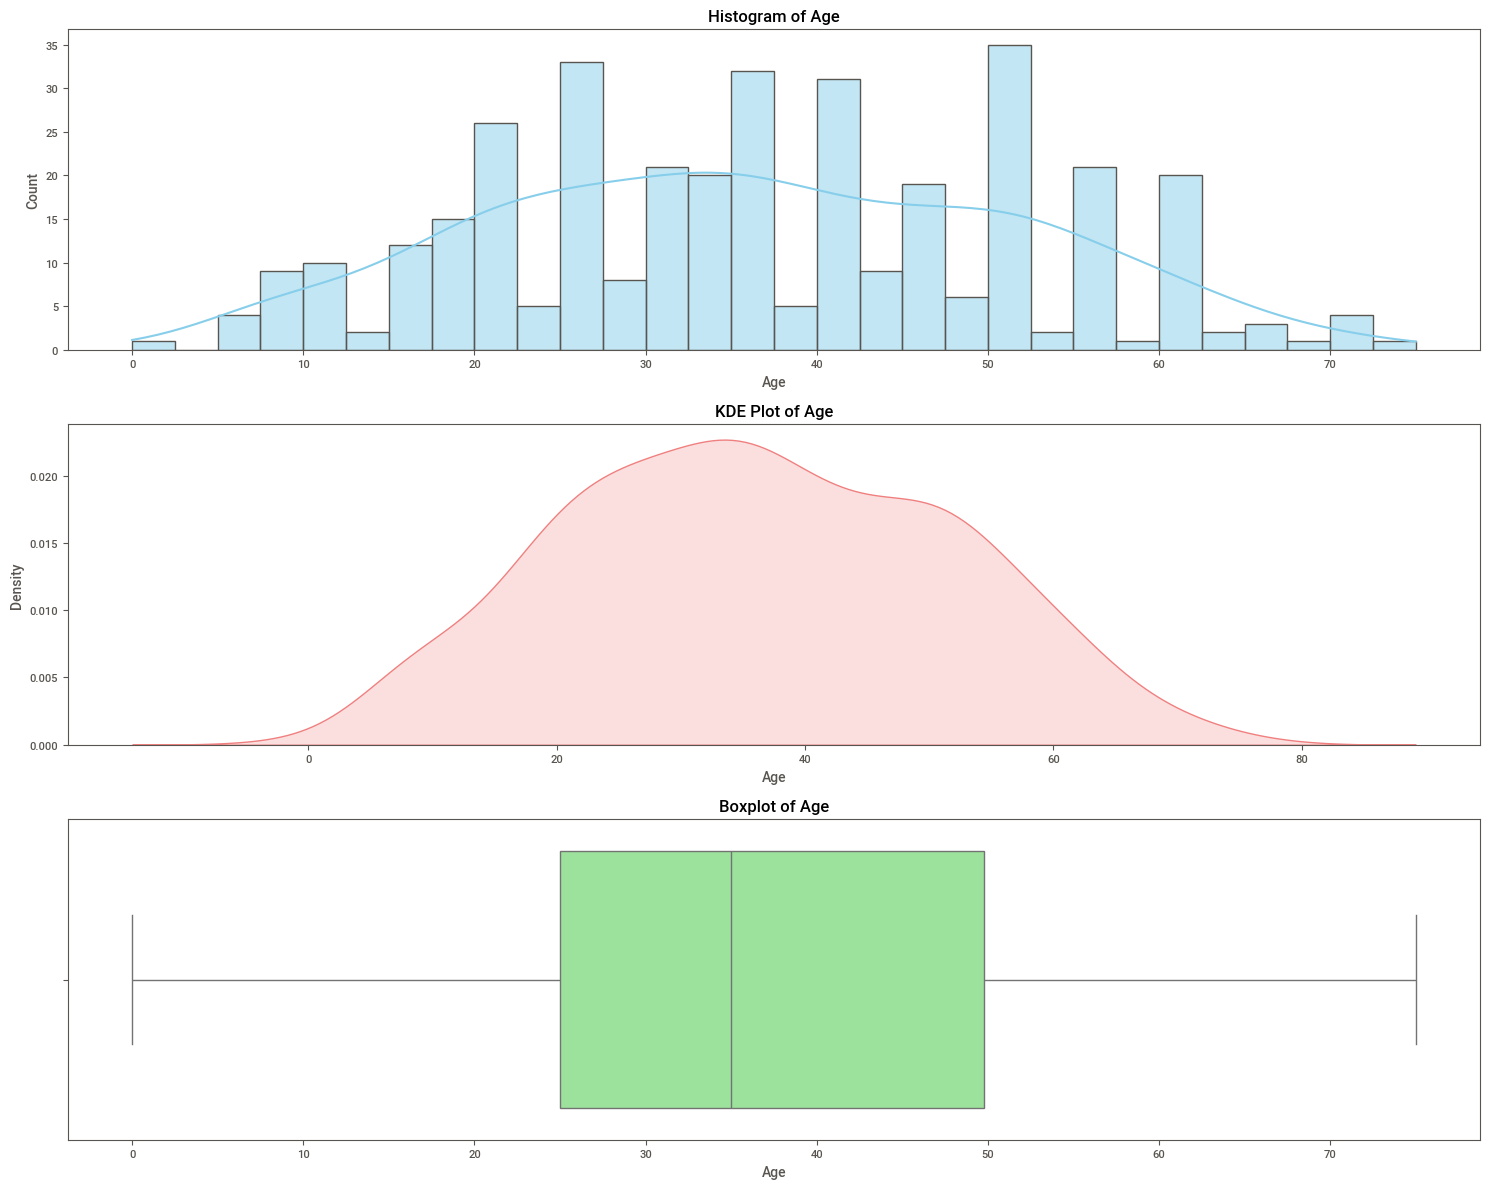

In [21]:
# Step 1: Univariate Analysis
print("\nUnivariate Analysis\n")
for column in df.columns[:-1]:
    plt.figure(figsize=(15, 12))

    # Histplot
    plt.subplot(3, 1, 1)
    sns.histplot(df[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

    # KDE Plot
    plt.subplot(3, 1, 2)
    sns.kdeplot(df[column], fill=True, color='lightcoral')
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)

    # Boxplot
    plt.subplot(3, 1, 3)
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

### Univariate Insights:
1. Histplot Insights (Distribution Check):

Age: Right-skewed distribution, indicating most patients are younger.

Family History: Bimodal distribution, suggesting distinct groups with and without genetic factors.

Inflammation Level: Slight right skew, with most patients having mild to moderate inflammation.

Itching Severity: Normally distributed, peaking around moderate intensity.

Scaling Degree: Right-skewed, indicating that severe scaling is less frequent.

Redness: Symmetric distribution, suggesting balanced observations.

Lesion Size: Right-skewed, with fewer patients having large lesions.

Disease Duration: Strong right skew, indicating chronic cases are less common.

Target (Disorder Class): Categorical distribution showing class imbalance.

2. KDE Plot Insights (Density Estimation):

Age: Peak density around 20-30 years, confirming younger age dominance.

Family History: Clear separation between positive and negative family history.

Inflammation Level: Smooth peak around lower values, indicating milder symptoms.

Itching Severity: Highest density near moderate severity.

Scaling Degree: Low density for extreme cases, with most around mild scaling.

Redness: Balanced distribution across mild to moderate levels.

Lesion Size: Peak density near small lesions, tapering off for larger ones.

Disease Duration: Highest density for short-term conditions.

Target (Disorder Class): Uneven density, showing imbalance across skin disorder classes.

3. Boxplot Insights (Outlier Detection):

Age: Outliers in older age groups suggest rare, elderly cases.

Family History: No significant outliers, indicating clean data.

Inflammation Level: Mild outliers for high inflammation levels.

Itching Severity: Outliers on the severe end.

Scaling Degree: Few extreme outliers for severe scaling.

Redness: Balanced without prominent outliers.

Lesion Size: Multiple outliers for unusually large lesions.

Disease Duration: Long-term cases show clear outliers.

Target (Disorder Class): No significant outliers as it's a categorical variable.

## - Bivariate Analysis

In [29]:
# AutoViz is a Python library that automatically visualizes datasets with minimal code. It generates various plots for univariate, bivariate, and 
# multivariate analysis to help you quickly understand data patterns.

In [23]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [25]:
filename = 'dataset_35_dermatology.csv'
sep=','
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar='',
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format='svg',
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

Shape of your Data Set loaded: (366, 35)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  33
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    35 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
30 numeric variables in data exceeds limit, taking top 30 variables
    List of variables sel

Number of All Scatter Plots = 465
All Plots done
Time to run AutoViz = 80 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

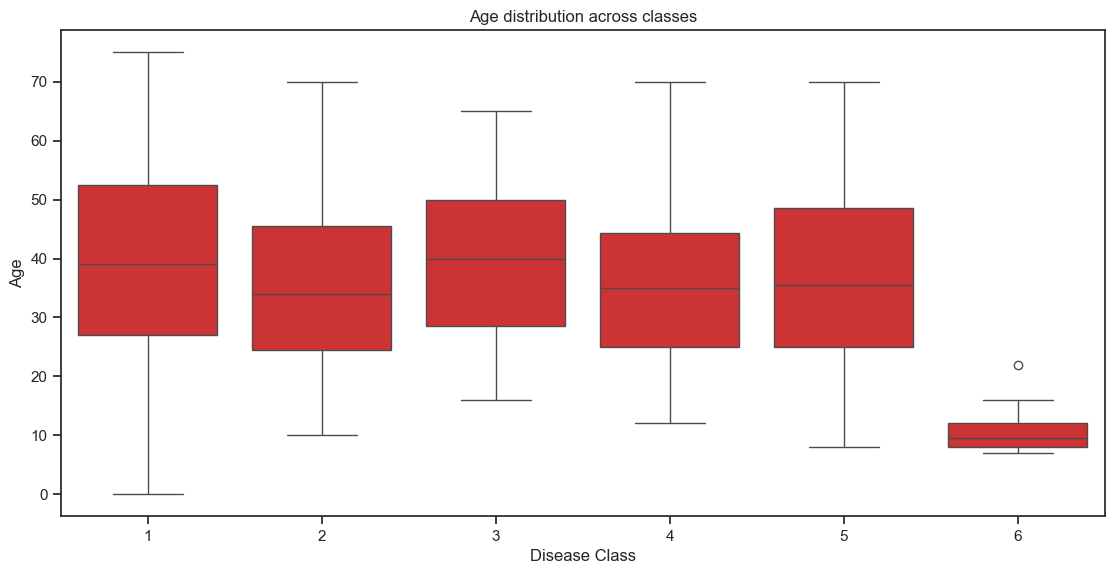

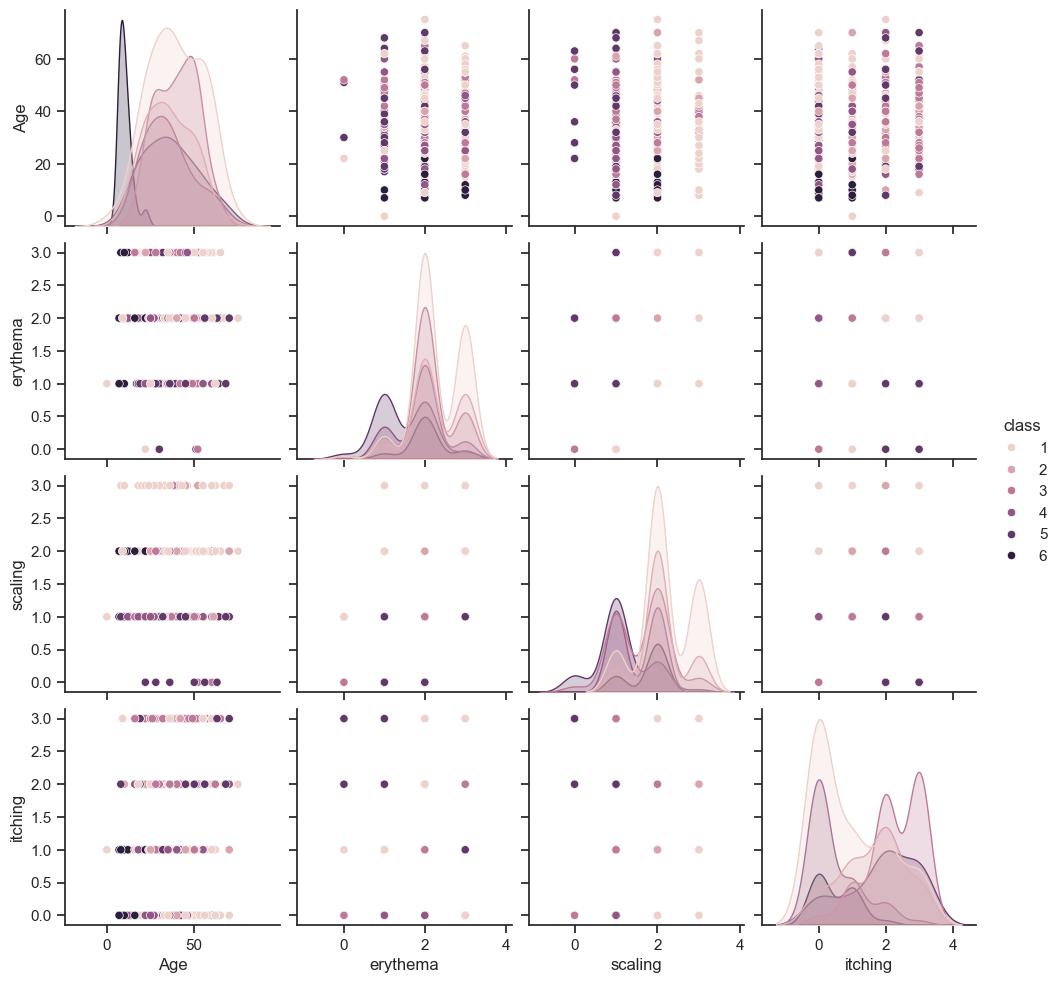

In [31]:
# Boxplots for numerical features against target variable
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["class"], y=df["Age"])
plt.title("Age distribution across classes")
plt.xlabel("Disease Class")
plt.ylabel("Age")
plt.show()

# Pairplot to observe relationships between some numerical attributes and the target
selected_features = ["Age", "erythema", "scaling", "itching", "class"]
sns.pairplot(df[selected_features], hue="class", diag_kind="kde")
plt.show()

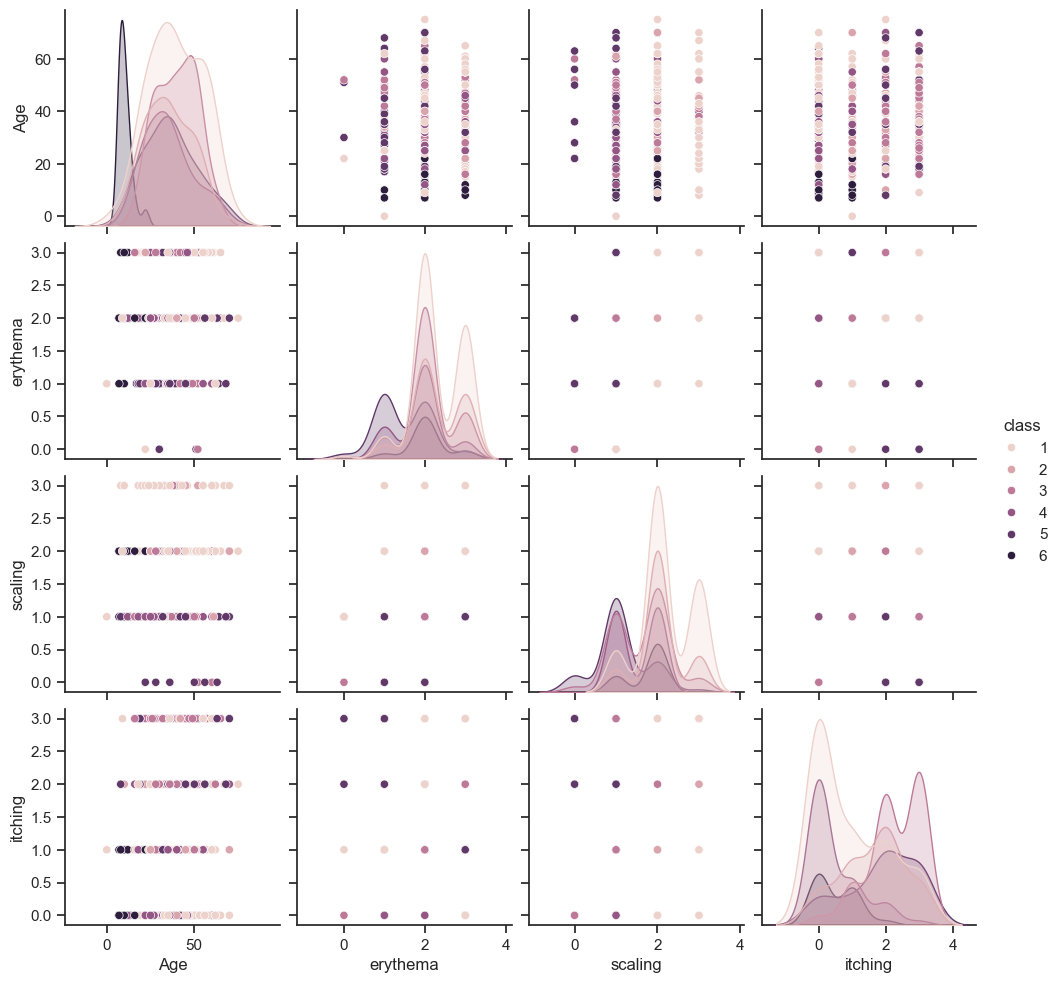

In [33]:
# Fill missing values in Age with median value
df["Age"].fillna(df["Age"].median(), inplace=True)

# Retry the pairplot
sns.pairplot(df[selected_features], hue="class", diag_kind="kde")
plt.show()

<Figure size 1200x800 with 0 Axes>

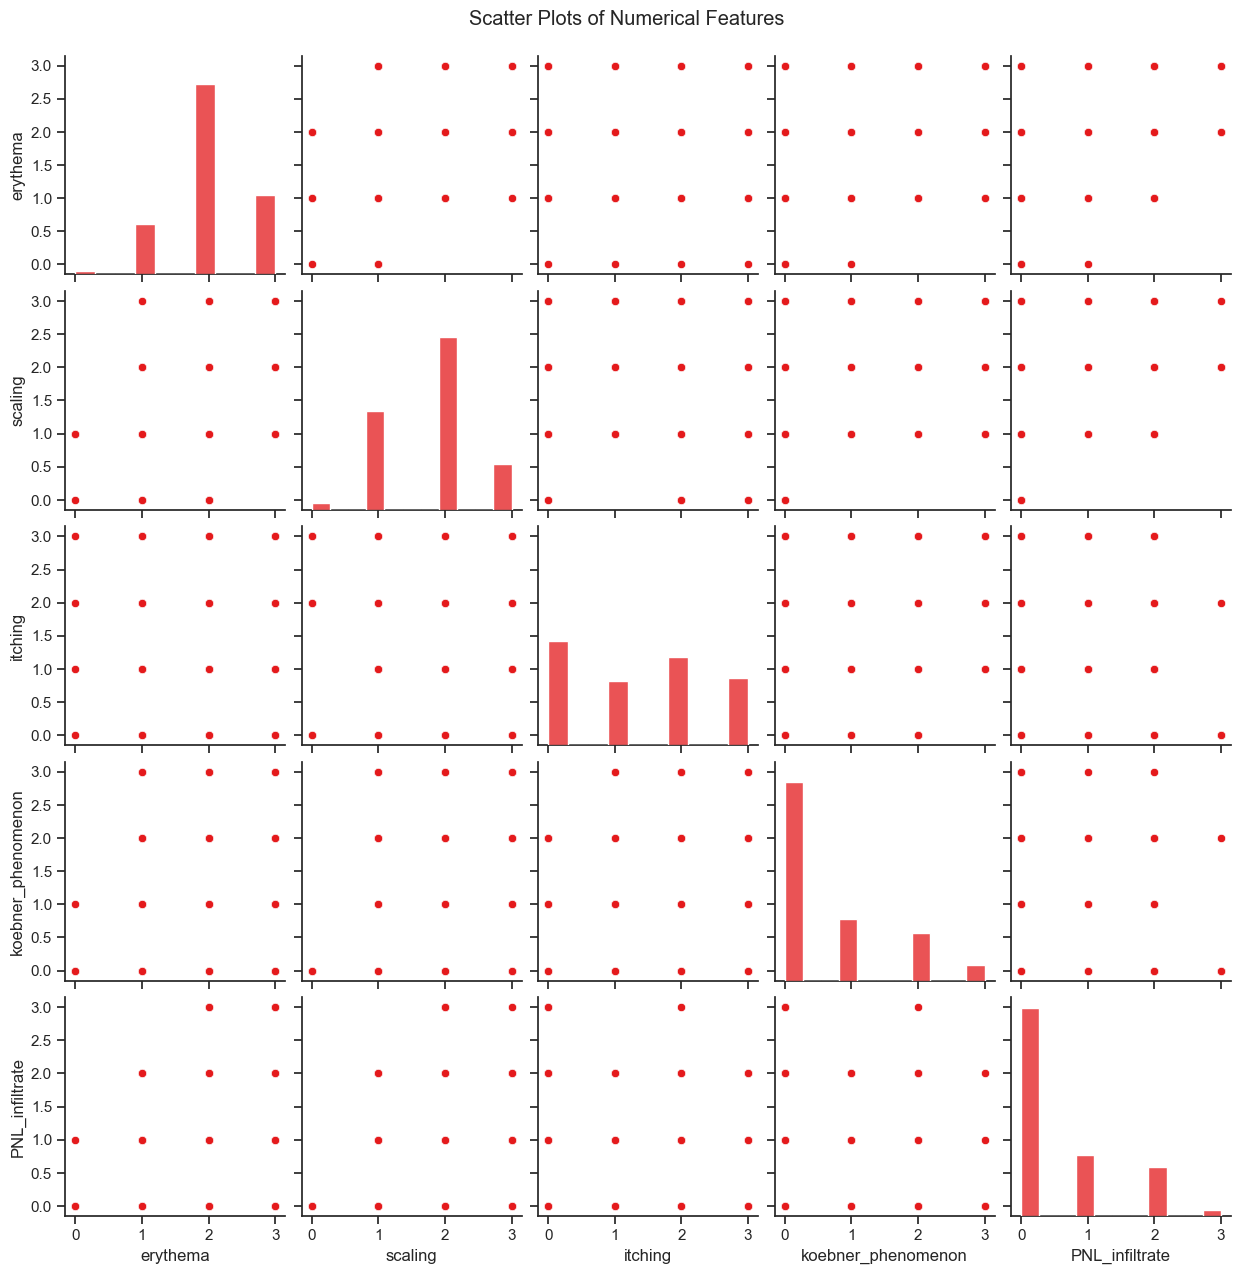

In [35]:
# Selecting numerical features for scatter plots
numerical_features = ["erythema", "scaling", "itching", "koebner_phenomenon", "PNL_infiltrate"]

# Creating scatter plots for all pairs of numerical features
plt.figure(figsize=(12, 8))
sns.pairplot(df[numerical_features])
plt.suptitle("Scatter Plots of Numerical Features", y=1.02)
plt.show()

### Bivaraite Insights:
Age Distribution: Most patients seem to be in the middle-aged range, with fewer younger or older patients.

Erythema & Scaling Distributions: These show multimodal distributions, meaning different disease classes have distinct severity levels.

Itching Distribution: It appears to be skewed, suggesting that some diseases have a stronger itching component than others.

Bivariate Relationships (Scatter Plots)
Age vs. Erythema, Scaling, Itching: No strong linear correlation is visible, suggesting that these symptoms are not strongly age-dependent. However, some disease classes seem to be more common in certain age ranges.

Erythema vs. Scaling: Possible clustering suggests that certain disease classes tend to have both high erythema and scaling together. If the clusters are well-separated, it means erythema and scaling together can help differentiate diseases.

Erythema vs. Itching: Some classes show a strong presence of both erythema and itching, suggesting they co-occur in certain diseases. Other classes may have high erythema but low itching, indicating different pathological mechanisms.

Scaling vs. Itching: The spread of points indicates that scaling does not always accompany itching. Some diseases might have intense scaling but no itching, while others have both.

### NOTE: 
**Removing outliers causes loss in target variable values it means outliers in this case are important and also without removing outliers accuracy is increasing.**

In [39]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [43]:
# High correlated columns are dropped.

In [45]:
df.drop('vacuolisation_and_damage_of_basal_layer',axis=1,inplace=True)
df.drop('saw-tooth_appearance_of_retes',axis=1,inplace=True)
df.drop('focal_hypergranulosis',axis=1,inplace=True)
df.drop('thinning_of_the_suprapapillary_epidermis',axis=1,inplace=True)
df.drop('oral_mucosal_involvement',axis=1,inplace=True)
df.drop('perifollicular_parakeratosis',axis=1,inplace=True)
df.drop('band-like_infiltrate',axis=1,inplace=True)
df.drop('melanin_incontinence',axis=1,inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   erythema                             366 non-null    int64  
 1   scaling                              366 non-null    int64  
 2   definite_borders                     366 non-null    int64  
 3   itching                              366 non-null    int64  
 4   koebner_phenomenon                   366 non-null    int64  
 5   polygonal_papules                    366 non-null    int64  
 6   follicular_papules                   366 non-null    int64  
 7   knee_and_elbow_involvement           366 non-null    int64  
 8   scalp_involvement                    366 non-null    int64  
 9   family_history                       366 non-null    int64  
 10  eosinophils_in_the_infiltrate        366 non-null    int64  
 11  PNL_infiltrate                  

In [49]:
# split data into x and y 

In [51]:
x = df.drop(columns="class",axis=1)
x

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0        2        2             0            3              0           
1        3        3             3            2              1           
2        2        1             2            3              1           
3        2        2             2            0              0           
4        2        3             2            2              2           
5        2        3             2            0              0           
6        2        1             0            2              0           
7        2        2             3            3              3           
8        2        2             1            0              2           
9        2        2             1            0              1           
10       3        3             2            1              1           
11       2        2             0            3              0           
12       3        3             1            2              0           
13       2        3             3            0              0           
14       2        2             3            3              0           
15       1        1             0            1              3           
16       2        2             1            3              0           
17       3        3             3            0              0           
18       2        1             3            3              3           
19       1        1             0            3              0           
20       2        1             1            2              0           
21       3        2             2            0              0           
22       2        2             0            2              0           
23       2        2             2            3              2           
24       2        0             0            3              0           
25       2        1             1            0              1           
26       1        1             0            1              0           
27       1        2             2            3              0           
28       3        2             2            2              0           
29       1        1             2            3              2           
30       3        2             1            2              0           
31       3        2             0            2              0           
32       2        3             3            3              3           
33       2        2             1            0              0           
34       2        1             0            0              2           
35       2        2             1            2              0           
36       2        1             2            3              2           
37       2        1             1            1              0           
38       2        1             2            3              2           
39       3        3             2            0              0           
40       1        1             1            0              0           
41       1        1             1            0              0           
42       3        2             1            1              0           
43       2        1             1            0              0           
44       0        1             0            3              0           
45       2        1             1            1              1           
46       2        1             1            3              3           
47       2        1             1            1              0           
48       1        2             1            1              0           
49       2        0             1            0              0           
50       3        1             1            2              2           
51       1        1             1            0              2           
52       2        2             1            0              0           
53       3        1             1            1              1  

In [53]:
y = df['class']
y

0      2
1      1
2      3
3      1
4      3
5      2
6      5
7      3
8      4
9      4
10     1
11     2
12     2
13     1
14     3
15     4
16     2
17     1
18     3
19     5
20     6
21     2
22     5
23     3
24     5
25     1
26     6
27     5
28     2
29     3
30     1
31     2
32     1
33     1
34     4
35     2
36     3
37     2
38     3
39     1
40     2
41     4
42     1
43     2
44     5
45     3
46     4
47     6
48     2
49     3
50     3
51     4
52     1
53     1
54     5
55     1
56     2
57     3
58     4
59     2
60     6
61     1
62     5
63     1
64     2
65     3
66     1
67     4
68     5
69     1
70     2
71     6
72     3
73     5
74     4
75     2
76     2
77     1
78     3
79     5
80     1
81     2
82     2
83     2
84     5
85     1
86     1
87     3
88     1
89     4
90     2
91     2
92     5
93     1
94     3
95     4
96     2
97     5
98     1
99     6
100    2
101    5
102    1
103    2
104    2
105    1
106    4
107    1
108    3
109    1
110    1
1

## Feature Engineering

### - Encoding

In [57]:
# Age column is alreday converted into float(In EDA part)

### - Scaling

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [62]:
X_scaled

array([[-0.1028946 ,  0.29250271, -1.70937509, ..., -0.23081653,
        -1.19445878,  1.23758255],
       [ 1.40348234,  1.71991595,  1.60084334, ..., -0.23081653,
        -1.19445878, -1.86756549],
       [-0.1028946 , -1.13491053,  0.49743719, ..., -0.23081653,
         0.18463243, -0.67835986],
       ...,
       [ 1.40348234,  0.29250271,  0.49743719, ..., -0.23081653,
         0.18463243, -0.5462259 ],
       [-0.1028946 , -1.13491053,  1.60084334, ..., -0.23081653,
         0.18463243,  0.90724765],
       [ 1.40348234,  0.29250271,  0.49743719, ..., -0.23081653,
         1.56372365, -0.08375705]])

## Feature Selection

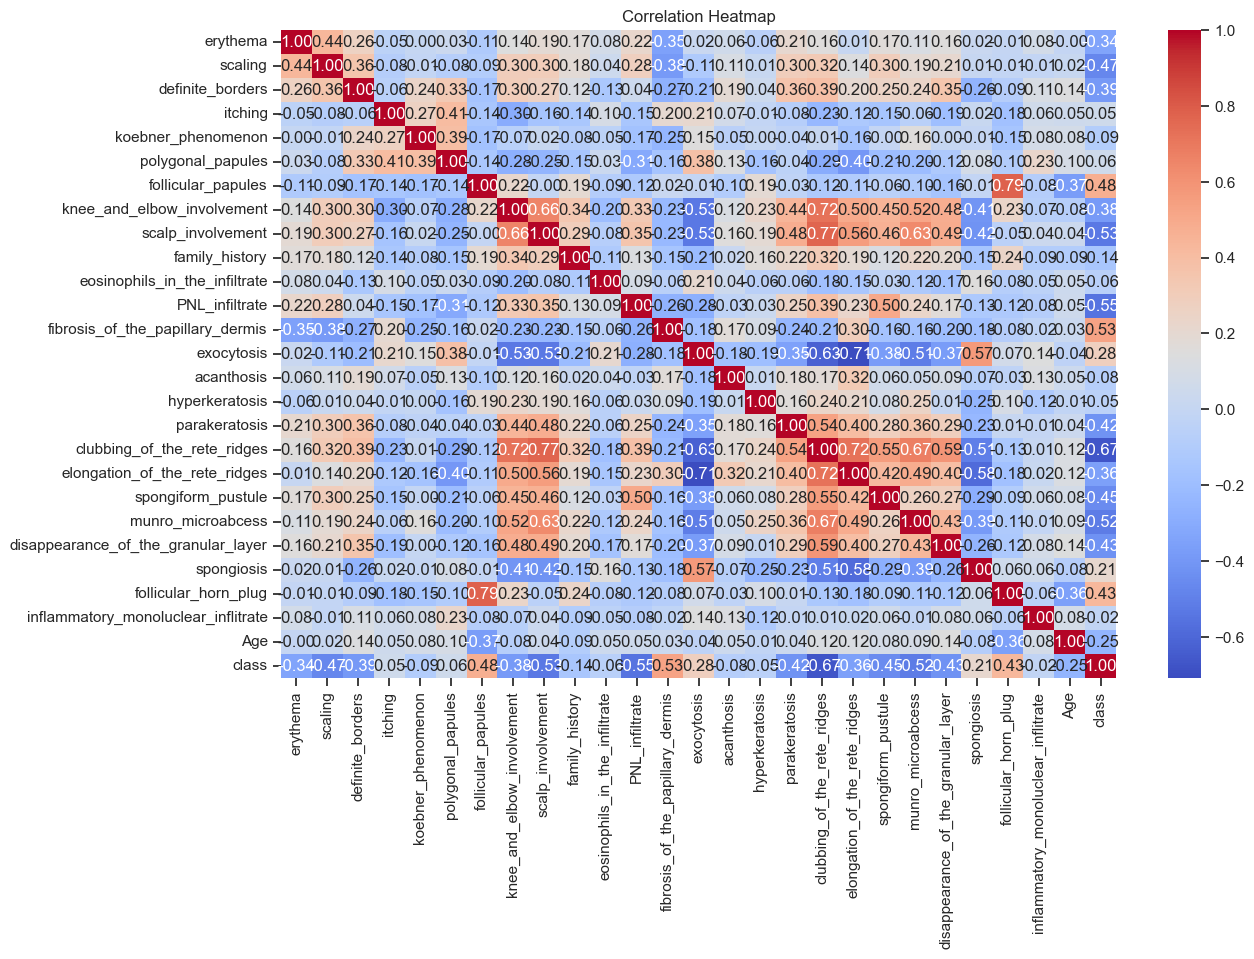

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [106]:
# high correlated column has alreay been dropped.

In [67]:
df.corr()

erythema   scaling  definite_borders  \
erythema                             1.000000  0.435467      0.260087       
scaling                              0.435467  1.000000      0.357987       
definite_borders                     0.260087  0.357987      1.000000       
itching                             -0.047623 -0.084197     -0.062564       
koebner_phenomenon                   0.000694 -0.010576      0.241342       
polygonal_papules                    0.033571 -0.075035      0.327754       
follicular_papules                  -0.109550 -0.092400     -0.166662       
knee_and_elbow_involvement           0.141008  0.298398      0.302309       
scalp_involvement                    0.186684  0.301577      0.268862       
family_history                       0.172059  0.181491      0.115844       
eosinophils_in_the_infiltrate        0.075228  0.042211     -0.132021       
PNL_infiltrate                       0.224095  0.282486      0.041330       
fibrosis_of_the_papillary_dermis    -0.354595 -0.383585     -0.274414       
exocytosis                           0.021565 -0.110809     -0.205391       
acanthosis                           0.064165  0.108095      0.189761       
hyperkeratosis                      -0.055432  0.013149      0.043894       
parakeratosis                        0.210030  0.296752      0.361213       
clubbing_of_the_rete_ridges          0.157558  0.320740      0.387205       
elongation_of_the_rete_ridges        0.007819  0.139073      0.201702       
spongiform_pustule                   0.169773  0.297783      0.246204       
munro_microabcess                    0.113464  0.186366      0.242232       
disappearance_of_the_granular_layer  0.159100  0.211484      0.354768       
spongiosis                           0.022468  0.012151     -0.255536       
follicular_horn_plug                -0.005450 -0.010518     -0.086250       
inflammatory_monoluclear_inflitrate  0.075758 -0.010977      0.111882       
Age                                 -0.003724  0.017285      0.137866       
class                               -0.335537 -0.468688     -0.391974       

                                      itching  koebner_phenomenon  \
erythema                            -0.047623       0.000694        
scaling                             -0.084197      -0.010576        
definite_borders                    -0.062564       0.241342        
itching                              1.000000       0.267878        
koebner_phenomenon                   0.267878       1.000000        
polygonal_papules                    0.409696       0.394108        
follicular_papules                  -0.144825      -0.172741        
knee_and_elbow_involvement          -0.299645      -0.066372        
scalp_involvement                   -0.155639       0.015202        
family_history                      -0.136615      -0.083247        
eosinophils_in_the_infiltrate        0.095434      -0.046366        
PNL_infiltrate                      -0.145288      -0.169377        
fibrosis_of_the_papillary_dermis     0.203032      -0.247451        
exocytosis                           0.214822       0.145960        
acanthosis                           0.067080      -0.054449        
hyperkeratosis                      -0.008460       0.002635        
parakeratosis                       -0.075568      -0.036801        
clubbing_of_the_rete_ridges         -0.232224       0.008471        
elongation_of_the_rete_ridges       -0.124058      -0.163819        
spongiform_pustule                  -0.152689      -0.002065        
munro_microabcess                   -0.056056       0.157646        
disappearance_of_the_granular_layer -0.192684       0.004327        
spongiosis                           0.017514      -0.005938        
follicular_horn_plug                -0.175866      -0.147955        
inflammatory_monoluclear_inflitrate  0.062781       0.083358        
Age                                  0.046546       0.080599        
class            

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42)

In [71]:
X_train.shape

(274, 26)

In [73]:
X_test.shape

(92, 26)

In [75]:
df['class'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

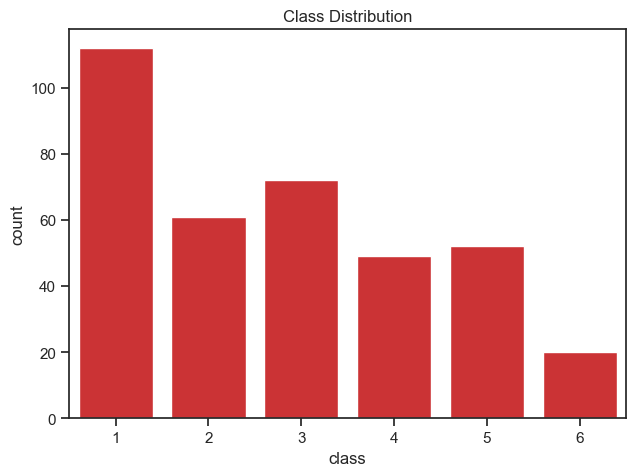

In [77]:
sns.countplot(x=df['class'])  
plt.title("Class Distribution")
plt.show()

In [79]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [81]:
y_pred = lr.predict(X_test)

In [83]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.9565217391304348


In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.86      1.00      0.92        12
           3       1.00      0.88      0.94        17
           4       0.82      0.82      0.82        11
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         4

    accuracy                           0.96        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.96      0.96      0.96        92



In [87]:
df['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [89]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=1, random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [91]:
from collections import Counter
print("Actual values:",Counter(y_train))
print("Balanced values:",Counter(y_train_smote))

Actual values: Counter({1: 78, 3: 55, 2: 49, 4: 38, 5: 38, 6: 16})
Balanced values: Counter({3: 78, 4: 78, 5: 78, 2: 78, 1: 78, 6: 78})


In [93]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [95]:
y_pred = lr.predict(X_test)

In [97]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.9565217391304348


In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.86      1.00      0.92        12
           3       1.00      0.88      0.94        17
           4       0.82      0.82      0.82        11
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         4

    accuracy                           0.96        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.96      0.96      0.96        92



In [101]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42),
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Evaluation Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_accuracy:.2f}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Training Logistic Regression...
Training Accuracy: 1.00
Logistic Regression Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.86      1.00      0.92        12
           3       1.00      0.88      0.94        17
           4       0.82      0.82      0.82        11
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         4

    accuracy                           0.96        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.96      0.96      0.96        92


Training Decision Tree...
Training Accuracy: 1.00
Decision Tree Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97        34
           2       0.92      1.00      0.96        12
           3       1.00      0.88      0.94        17
           4       0

In [103]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.99


## Conclusion
In this skin disorder classification project, we initially encountered challenges with missing target variable values and class imbalance. **we checked for outliers and found that removing them caused issues with the target variable, reducing the number of class labels. Keeping the outliers resulted in a more stable classification while also improving accuracy**. Additionally, we addressed highly correlated features by removing them, such as ‘melanin_incontinence,’ which led to a slight drop in accuracy (from 98% to 96%). We trained multiple models, including Logistic Regression (96%), SVM (96%), Decision Tree (96%), Random Forest (95%), and Gradient Boosting (97%), with Gradient Boosting performing the best. The training accuracy of Gradient Boosting was 100%, and test accuracy was 97%, indicating a well-generalized model. Given these results, the model is already performing well, but hyperparameter tuning could further optimize performance. Overall, the project effectively handled class imbalance, feature correlation, and outlier challenges while achieving high accuracy.